# Inter-Track Group Project: Predicting Student's Academic Performance
*An Inter-Track Project by Group 4*

#### Introduction

Academic performance is the extent to which a student, teacher or institution has achieved their short or long-term educational goals. Cumulative GPA and completion of educational benchmarks such as secondary school diplomas and bachelor's degrees represent academic achievement -[Wikipedia](https://en.m.wikipedia.org/wiki/Academic_achievement).


Academic performance is the process of learning in an academic surroundings. Academic performance is seen to be the end result of the skills and intellectual abilities of a student in an academic surroundings. There is more to learning, it is more than Performance. Learning is defined as the expansion of a student’s knowledge and skills that result from instruction and experience in an academic environment. Performance also consist of a student’s ability to show that knowledge and skill in different settings and situations within and outside the classroom.
The Academic performance of students play an important role in the education system as well as the learning process. It is considered to be a major yardstick to judge one’s total potentialities and capacities Nuthana & Yenagi (2009), which are frequently measured by the examination results. It is used to pass judgment on the quality of education offered by academic institutions. 
Predicting students’ performance is mostly useful to help the educators and learners improving their learning and teaching process.


#### Data Description

The provided dataset was collected through the [UCI Machine Learning Repository](https://archive-beta.ics.uci.edu/ml/datasets/predict+students+dropout+and+academic+success), the dataset created from a higher education institution (acquired from several disjoint databases) related to students enrolled in different undergraduate degrees, such as agronomy, design, education, nursing, journalism, management, social service, and technologies. The dataset includes information known at the time of student enrollment (academic path, demographics, and social-economic factors) and the students' academic performance at the end of the first and second semesters. The data is used to build classification models to predict students' dropout and academic success. 


#### Aims and Objectives

Student’s performance is an essential part in academic institutions. This is because one of the criteria for any academic institution is based on its excellent record of academic achievements.  The aim and objectives will be to create a platform *Prolego* to bridge some gaps

The solution *Prolego* provides is to contribute to the reduction of academic dropout and failure in educational institutes by predicting student's academic performance including drop off rate, academic success, to identify students at risk at an early stage of their academic path, so that strategies to support them can be put into place, in order to help academicals institutes not only to focus more on bright students but also to initially identify students with low academic achievement and find ways to support them.




In [1]:
# importing required libraries 
import pandas as pd
import numpy as np
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")
import missingno
import sklearn
from sklearn.decomposition import TruncatedSVD
import plotly.express as px
import warnings
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.io as pio
pio.templates.default = "plotly_dark"
warnings.filterwarnings('ignore')

In [2]:
# loading and reading the datasets
# Using Pandas read_csv function to load .csv files and perform operations on it.
df = pd.read_csv('data (1).csv', delimiter=';')
df.head(10)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
5,2,39,1,9991,0,19,133.1,1,37,37,...,0,5,17,5,11.500000,5,16.2,0.3,-0.92,Graduate
6,1,1,1,9500,1,1,142.0,1,19,38,...,0,8,8,8,14.345000,0,15.5,2.8,-4.06,Graduate
7,1,18,4,9254,1,1,119.0,1,37,37,...,0,5,5,0,0.000000,0,15.5,2.8,-4.06,Dropout
8,1,1,3,9238,1,1,137.0,62,1,1,...,0,6,7,6,14.142857,0,16.2,0.3,-0.92,Graduate
9,1,1,1,9238,1,1,138.0,1,1,19,...,0,6,14,2,13.500000,0,8.9,1.4,3.51,Dropout


In [3]:
# number of row in dataset
print("Student Perfomance Dataset Consists of {rows} rows".format(rows = len(df)))

Student Perfomance Dataset Consists of 4424 rows


In [4]:
# checking the number of rows and columns of dataset 
print("The Shape is: ", df.shape)

The Shape is:  (4424, 37)


#### What datatypes are in the datasets?

As a general rule of thumb, features with a datatype of object could be considered categorical features. And those which are floats or ints (numbers) could be considered numerical features.

In [5]:
# checking for the datatype of each feature of dataset
df.dtypes

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance\t                        int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender        

In [6]:
# checking the complete information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

#### *The Target Feature is the only variable having a text (object) data type in the dataset, others are float and integers. As such, before we can actually train a machine learning model on this data set, we will need to convert the text columns into numerical columns by applying the encoding method.*

#### *Therefore, we will separate our numerical and categorical columns using the select_dtypes method in Pandas to see which is which.*

In [7]:
# checking for all numerical columns i.e for integers and float
df_numerical = df.select_dtypes(exclude='object')

df_numerical.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0,0.000000,0,10.8,1.4,1.74
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,0,6,0,0,0.000000,0,10.8,1.4,1.74
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79


In [8]:
# checking for all categorical columns
df_categorical = df.select_dtypes(include='object')

df_categorical.head()

,Target
0,Dropout
1,Graduate
2,Dropout
3,Graduate
4,Graduate


In [9]:
# displaying the names of all features of the dataset
print(df.columns)

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

#### Renaming Column

From the datasets, we can see that the names of the features are lenghty, hence need to be renamed for proper understanding and easy analysis.

In [10]:
# renaming each column
df.columns = ['Marital_Status', 'Ap_Mode', 'Ap_Order', 'Course',
       'Attendance', 'Prev_Qua',
       'Prev_Qua_Grade', 'Region',
       'Mother_Qua', 'Father_Qua',
       'Mother_Occ', 'Father_Occ', 'Adm_Grade',
       'Displaced', 'Edu_Spec_Needs', 'Debtor',
       'Tui_Up_to_Date', 'Gender', 'S_Holder',
       'Age_at_Enroll', 'International',
       'Cur_U_1st_Sem_Credit',
       'Cur_U_1st_Sem_Enrol',
       'Cur_U_1st_Sem_Eva',
       'Cur_U_1st_Sem_Appr',
       'Cur_U_1st_Sem_Grade',
       'Cur_U_1st_Sem_no_Eva',
       'Cur_U_2nd_Sem_Credit',
       'Cur_U_2nd_Sem_Enrol',
       'Cur_U_2nd_Sem_Eva',
       'Cur_U_2nd_Sem_Approved',
       'Cur_U_2nd_Sem_Grade',
       'Cur_U_2nd_Sem_no_Eva', 'Unmp_R',
       'Inf_R', 'GDP', 'SAP']

In [11]:
# displaying the summary statistics of the dataset
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Marital_Status,4424.0,1.178571,0.605747,1.00,1.00,1.000000,1.000000,6.000000
Ap_Mode,4424.0,18.669078,17.484682,1.00,1.00,17.000000,39.000000,57.000000
Ap_Order,4424.0,1.727848,1.313793,0.00,1.00,1.000000,2.000000,9.000000
Course,4424.0,8856.642631,2063.566416,33.00,9085.00,9238.000000,9556.000000,9991.000000
Attendance,4424.0,0.890823,0.311897,0.00,1.00,1.000000,1.000000,1.000000
Prev_Qua,4424.0,4.577758,10.216592,1.00,1.00,1.000000,1.000000,43.000000
Prev_Qua_Grade,4424.0,132.613314,13.188332,95.00,125.00,133.100000,140.000000,190.000000
Region,4424.0,1.873192,6.914514,1.00,1.00,1.000000,1.000000,109.000000
Mother_Qua,4424.0,19.561935,15.603186,1.00,2.00,19.000000,37.000000,44.000000
Father_Qua,4424.0,22.275316,15.343108,1.00,3.00,19.000000,37.000000,44.000000


#### What missing values are there?

Visualise missing values early is so important as it shows where the major holes in the dataset are. Knowing this information helps with EDA and also figuring out what kind of data cleaning and preprocessing is needed.

In [12]:
# checking for missing values
df.isnull().sum()

Marital_Status            0
Ap_Mode                   0
Ap_Order                  0
Course                    0
Attendance                0
Prev_Qua                  0
Prev_Qua_Grade            0
Region                    0
Mother_Qua                0
Father_Qua                0
Mother_Occ                0
Father_Occ                0
Adm_Grade                 0
Displaced                 0
Edu_Spec_Needs            0
Debtor                    0
Tui_Up_to_Date            0
Gender                    0
S_Holder                  0
Age_at_Enroll             0
International             0
Cur_U_1st_Sem_Credit      0
Cur_U_1st_Sem_Enrol       0
Cur_U_1st_Sem_Eva         0
Cur_U_1st_Sem_Appr        0
Cur_U_1st_Sem_Grade       0
Cur_U_1st_Sem_no_Eva      0
Cur_U_2nd_Sem_Credit      0
Cur_U_2nd_Sem_Enrol       0
Cur_U_2nd_Sem_Eva         0
Cur_U_2nd_Sem_Approved    0
Cur_U_2nd_Sem_Grade       0
Cur_U_2nd_Sem_no_Eva      0
Unmp_R                    0
Inf_R                     0
GDP                 

<AxesSubplot:>

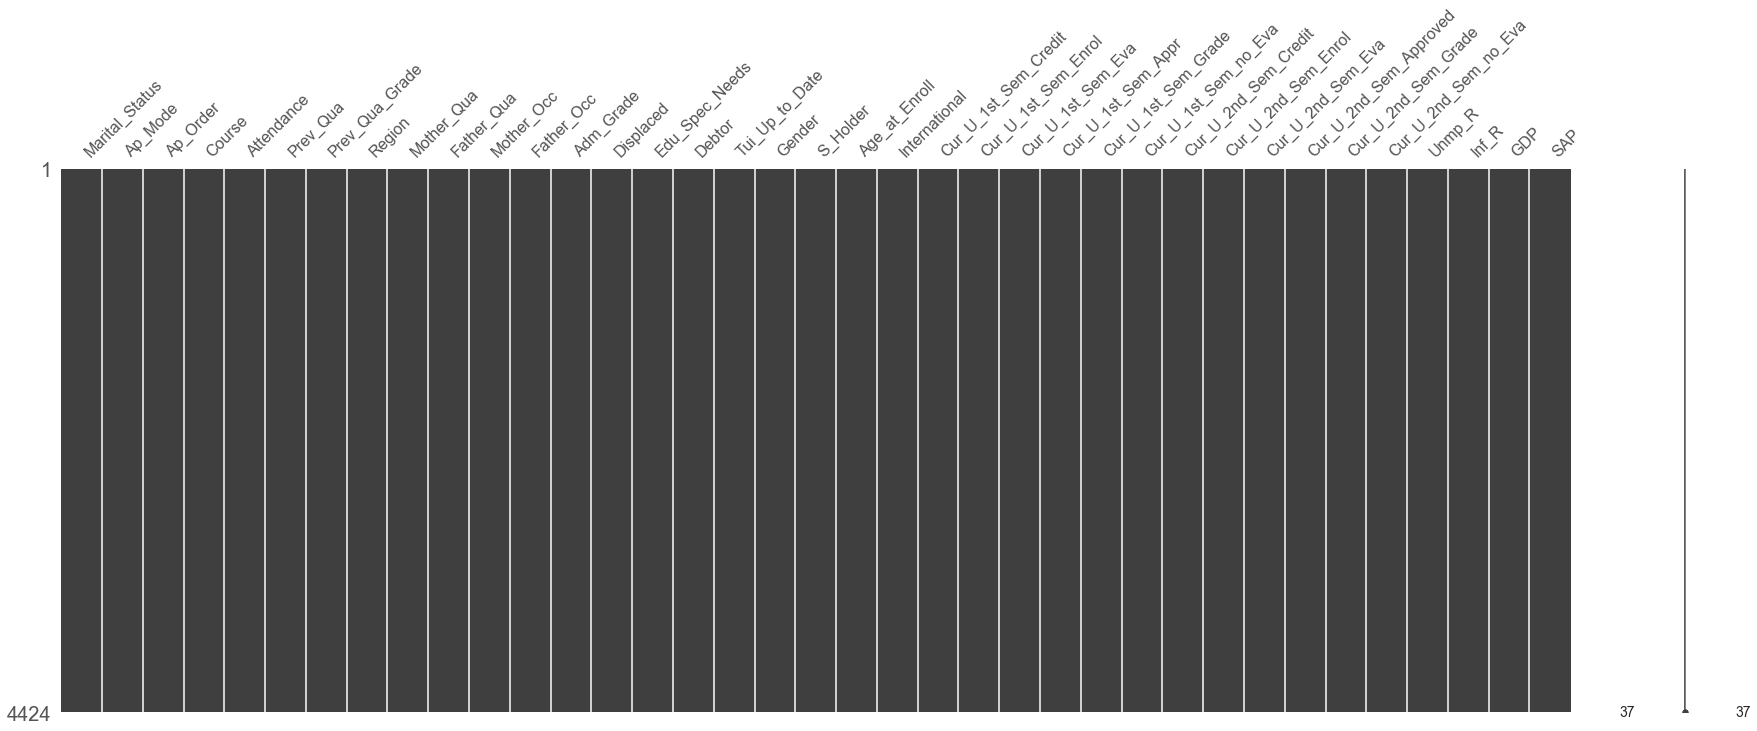

In [13]:
# Plot graphic of missing values
missingno.matrix(df, figsize = (30,10))

### Inference

There is no Missing data in the dataset.

In [14]:
# checking for duplicates in the dataset
df.duplicated().sum()

0

## *Univariate Analysis*

#### Target Feature: SAP = Student Academic Performance

Description: Whether the students Enrolled, Graduated or Dropout.

This is the variable we want our machine learning model to predict based off all the others.

In [15]:
# What kind of values are in Student Academic Performance?
df.SAP.value_counts() 

Graduate    2209
Dropout     1421
Enrolled     794
Name: SAP, dtype: int64

#### *Since we are only concerned about students who dropout and student who graduate, we do not need the Enrolled class hence it would be dropped.*

In [16]:
# we want to ommit the information from the SAP column that does not concern our analysis. 
df["SAP"] = df.SAP.apply(lambda x: 1 if x == "Dropout" else 0)

In [17]:
df.SAP.value_counts() 

0    3003
1    1421
Name: SAP, dtype: int64

where 0 represents students who are graduate, 1 represents students who dropout

In [18]:
df.replace(to_replace={'SAP': {0: 'graduate', 1: 'droupout'}}, inplace=True, value=None)

df

,Marital_Status,Ap_Mode,Ap_Order,Course,Attendance,Prev_Qua,Prev_Qua_Grade,Region,Mother_Qua,Father_Qua,...,Cur_U_2nd_Sem_Credit,Cur_U_2nd_Sem_Enrol,Cur_U_2nd_Sem_Eva,Cur_U_2nd_Sem_Approved,Cur_U_2nd_Sem_Grade,Cur_U_2nd_Sem_no_Eva,Unmp_R,Inf_R,GDP,SAP
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,droupout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,droupout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,droupout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,droupout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,graduate


Text(0.5, 1.0, 'Distribution of Student who are Graduates and Dropouts')

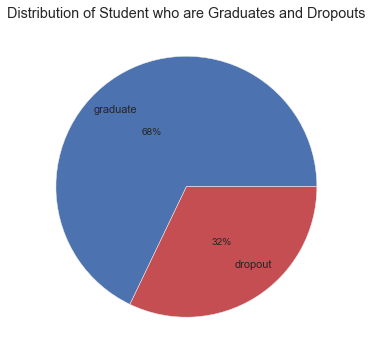

In [19]:
# How many Students Graduated or Dropout?
plt.figure(figsize=(6,6))
plt.pie(x=[3003, 1421], labels=['graduate','dropout'], autopct='%1.0f%%', pctdistance=0.5,labeldistance=0.7,colors=['b','r'])
plt.title('Distribution of Student who are Graduates and Dropouts')

### *Inference*

The distribution plot shows that students who are graduates are 68% and students who dropped out are 32%. Also the plot reveals tha the dataset is not unbalanced, so there would no need for any tecnique used to balance the dataset.

#### Feature: Marital_Status
Description: Marital Status of students.

In [20]:
# What kind of values are in Marital_Status?
df.Marital_Status.value_counts()

1    3919
2     379
4      91
5      25
6       6
3       4
Name: Marital_Status, dtype: int64

In [21]:
# what are the Marital Status categories?
df['Marital_Status'].unique()

array([1, 2, 4, 3, 5, 6], dtype=int64)

*The Marital Status column of the dataset has many categories and we need to reduce the categories for a better modelling. so it will be reduced to unmarried and married. where 1 reps students who are unmarried and 2 reps students who are married.*

In [22]:
df['Marital_Status']=np.where(df['Marital_Status'] ==4, 2, df['Marital_Status'])
df['Marital_Status']=np.where(df['Marital_Status'] ==5, 2, df['Marital_Status'])
df['Marital_Status']=np.where(df['Marital_Status'] ==6, 2, df['Marital_Status'])
df['Marital_Status']=np.where(df['Marital_Status'] ==3, 2, df['Marital_Status'])

In [23]:
df['Marital_Status'].unique()

array([1, 2], dtype=int64)

In [24]:
df.Marital_Status.value_counts()

1    3919
2     505
Name: Marital_Status, dtype: int64

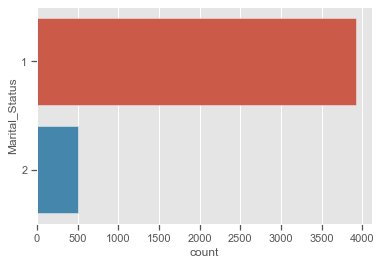

In [25]:
# What do the counts look like?
sns.countplot(y='Marital_Status', data=df);

### *Inference*

From the plot it is shown that Students with the unmarried class is more than Students who are married.

#### Feature: Ap_Mode = Application Mode
Description: the various means through which a candidate may be admitted into the degree programme. 

In [26]:
df.Ap_Mode.value_counts() 

1     1708
17     872
39     785
43     312
44     213
7      139
18     124
42      77
51      59
16      38
53      35
15      30
5       16
10      10
2        3
26       1
57       1
27       1
Name: Ap_Mode, dtype: int64

*The Ap_Mode column of the dataset has many categories and we need to reduce the categories for a better modelling. so it will be reduced to popular and not popular. where 1 reps students with popular Ap_Mode and 2 reps students with unpolpular Ap_Mode*.

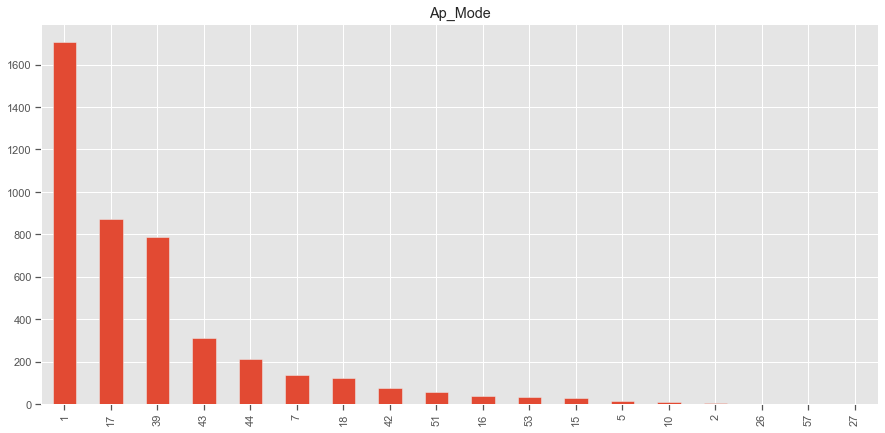

In [27]:
# ploting the bar chart for Ap_Mode
df['Ap_Mode'].value_counts().plot(kind = "bar", title = 'Ap_Mode', figsize=(15, 7))
plt.xticks(rotation = 90)

plt.show()

#### Feature: Ap_Order = Application Order
Description: the various order through which a candidate may be admitted into the degree programme.

In [28]:
df.Ap_Order.value_counts() 

1    3026
2     547
3     309
4     249
5     154
6     137
0       1
9       1
Name: Ap_Order, dtype: int64

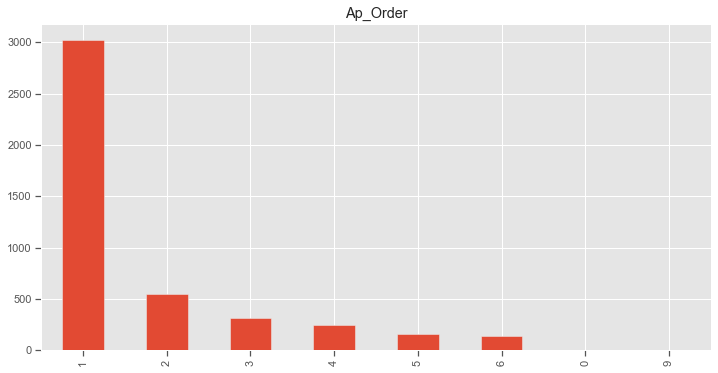

In [29]:
# ploting the bar chart for Ap_Order
df['Ap_Order'].value_counts().plot(kind = "bar", title = 'Ap_Order', figsize=(12, 6))
plt.xticks(rotation = 90)

plt.show()

#### Feature: Course
Description: The program in which students are admitted to. For analysis sake, we assume that the course stands for the programme related to students enrolled in different undergraduate degrees, such as agronomy, design, education, nursing, journalism, management, social service, and technologies, etc.

In [30]:
df.Course.value_counts() 

9500    766
9147    380
9238    355
9085    337
9773    331
9670    268
9991    268
9254    252
9070    226
8014    215
171     215
9003    210
9853    192
9119    170
9130    141
9556     86
33       12
Name: Course, dtype: int64

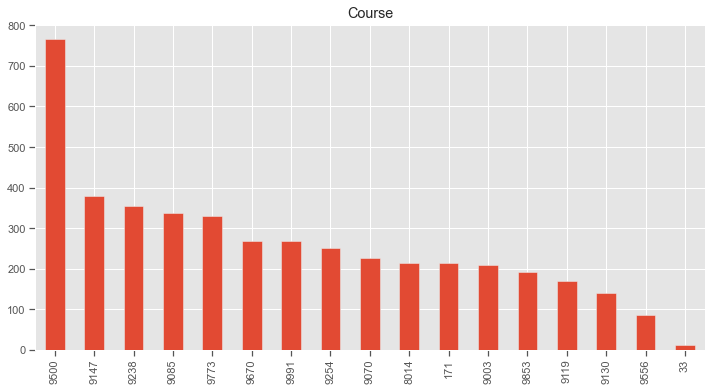

In [31]:
# ploting the bar chart for Course
df['Course'].value_counts().plot(kind = "bar", title = 'Course', figsize=(12, 6))
plt.xticks(rotation = 90)

plt.show()

### *Inference*

From the bar chart, it is shown that the highest degree programme is management with 766 students enrolled in it, followed by social service and information technology. However, the course with the lowest number of of student is machanical engineering, which have only 12 students enrolled in it.

#### Feature: Attendance = Day_evening_attendance
Description: Attendance taken. For analysis sake, we assume that 1 represents students who are present and 0 represents students who are absent.

In [32]:
df.Attendance.value_counts() 

1    3941
0     483
Name: Attendance, dtype: int64

Text(0.5, 1.0, 'Distribution of Student for Daytime and Evening Attendance')

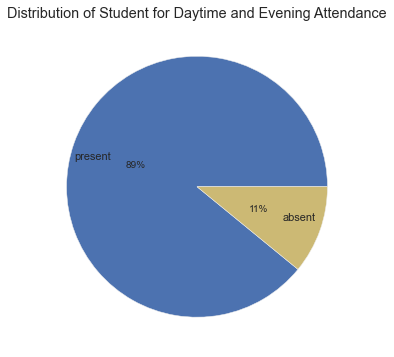

In [33]:
plt.figure(figsize=(6,6))
plt.pie(x=[3941, 483], labels=['present','absent'], autopct='%1.0f%%', pctdistance=0.5,labeldistance=0.7,colors=['b','y'])
plt.title('Distribution of Student for Daytime and Evening Attendance')

### *Inference*

From the above pie plot, it is shown that students with Day attendance are more than those who attend in the evening. Where 89% of students are seen to be day attendance and 11% are Evening.

####  Feature: Prev_Qua = Previous_Qualification
Description: Previous Qualification of students.

In [34]:
df.Prev_Qua.value_counts() 

1     3717
39     219
19     162
3      126
12      45
40      40
42      36
2       23
6       16
9       11
4        8
38       7
43       6
10       4
15       2
14       1
5        1
Name: Prev_Qua, dtype: int64

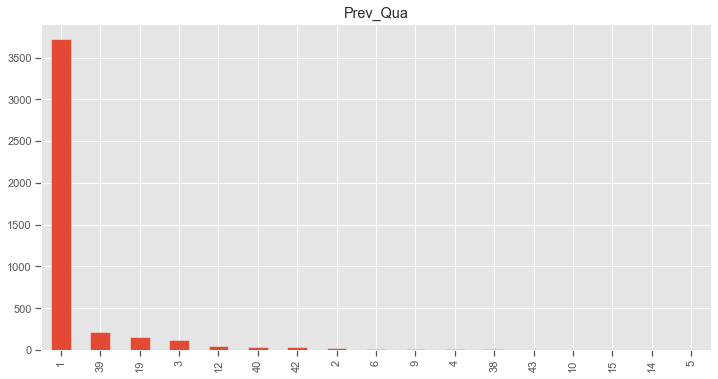

In [35]:
# ploting the bar chart for Prev_Qua
df['Prev_Qua'].value_counts().plot(kind = "bar", title = 'Prev_Qua', figsize=(12, 6))
plt.xticks(rotation = 90)

plt.show()

### *Inference*

We can see from graph that the previous qualification of students is more for some than the rest. 

##### Feature: Prev_Qua_Grade = Previous_Qualification_Grade
Description: Previous Qualification Grade of students.

In [36]:
df.Prev_Qua_Grade.value_counts()

133.1    491
130.0    375
140.0    336
120.0    278
150.0    162
        ... 
138.6      1
169.0      1
117.4      1
140.8      1
188.0      1
Name: Prev_Qua_Grade, Length: 101, dtype: int64

In [37]:
df['Prev_Qua_Grade'].max()

190.0

In [38]:
df['Prev_Qua_Grade'].min()

95.0

#### Feature: Region
Description: The Region of students.

In [39]:
df.Region.value_counts() 

1      4314
41       38
26       14
22       13
6        13
24        5
11        3
103       3
100       3
25        2
21        2
105       2
2         2
62        2
101       2
32        1
109       1
17        1
14        1
13        1
108       1
Name: Region, dtype: int64

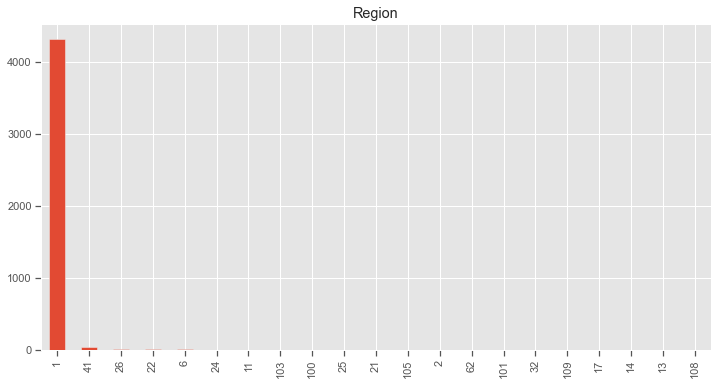

In [40]:
# ploting the bar chart for region
df['Region'].value_counts().plot(kind = "bar", title = 'Region', figsize=(12, 6))
plt.xticks(rotation = 90)

plt.show()

### *Inference*

We can see from the plot that students from certain region is more than the rest.


#### Feature: Mother_Qua = Mother_Qualification
Description:  Mother's Qualification of students.

In [41]:
df.Mother_Qua.value_counts() 

1     1069
37    1009
19     953
38     562
3      438
34     130
2       83
4       49
12      42
5       21
40       9
39       8
9        8
41       6
42       4
43       4
6        4
30       3
10       3
29       3
11       3
35       3
36       3
14       2
22       1
26       1
18       1
44       1
27       1
Name: Mother_Qua, dtype: int64

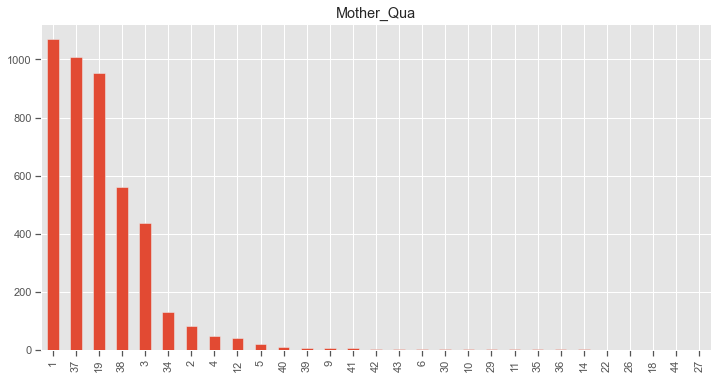

In [42]:
# ploting the bar chart for Mother_Qua
df['Mother_Qua'].value_counts().plot(kind = "bar", title = 'Mother_Qua', figsize=(12, 6))
plt.xticks(rotation = 90)

plt.show()

#### Feature: Father_Qua = Father_Qualification
Description:  Father's Qualification of students.

In [43]:
df.Father_Qua.value_counts()

37    1209
19     968
1      904
38     702
3      282
34     112
2       68
4       39
12      38
39      20
5       18
11      10
36       8
9        5
40       5
14       4
30       4
22       4
29       3
26       2
35       2
10       2
6        2
41       2
43       2
18       1
42       1
33       1
25       1
13       1
27       1
31       1
44       1
20       1
Name: Father_Qua, dtype: int64

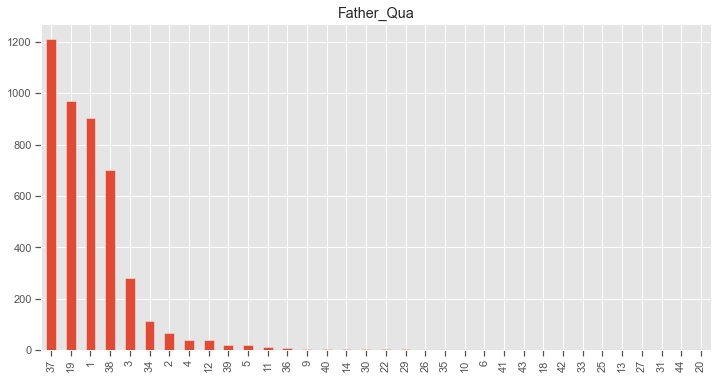

In [44]:
# ploting the bar chart for Father_Qua
df['Father_Qua'].value_counts().plot(kind = "bar", title = 'Father_Qua', figsize=(12, 6))
plt.xticks(rotation = 90)

plt.show()

#### Feature: Mother_Occ =  Mother_Occupation
Description: The Mother's Occupation of students.

In [45]:
df.Mother_Occ.value_counts()

9      1577
4       817
5       530
3       351
2       318
7       272
0       144
1       102
6        91
90       70
8        36
191      26
99       17
194      11
141       8
123       7
144       6
175       5
192       5
10        4
193       4
134       4
132       3
143       3
151       3
122       2
152       2
153       2
125       1
173       1
131       1
171       1
Name: Mother_Occ, dtype: int64

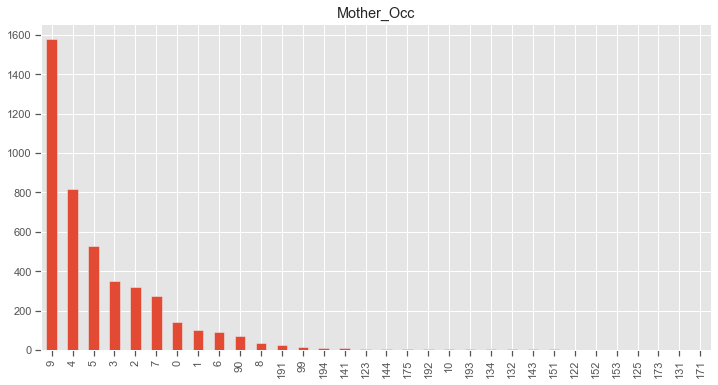

In [46]:
# ploting the bar chart for Mother_Occ
df['Mother_Occ'].value_counts().plot(kind = "bar", title = 'Mother_Occ', figsize=(12, 6))
plt.xticks(rotation = 90)

plt.show()

#### Feature: Father_Occ = Father_Occupation
Description: The Father's Occupation of students.

In [47]:
df.Father_Occ.value_counts()

9      1010
7       666
5       516
4       386
3       384
8       318
10      266
6       242
2       197
1       134
0       128
90       65
99       19
193      15
171       8
144       8
192       6
163       5
175       4
103       4
135       3
183       3
181       3
152       3
123       3
194       2
182       2
151       2
122       2
102       2
172       2
112       2
131       1
143       1
174       1
124       1
101       1
154       1
134       1
114       1
132       1
161       1
153       1
141       1
121       1
195       1
Name: Father_Occ, dtype: int64

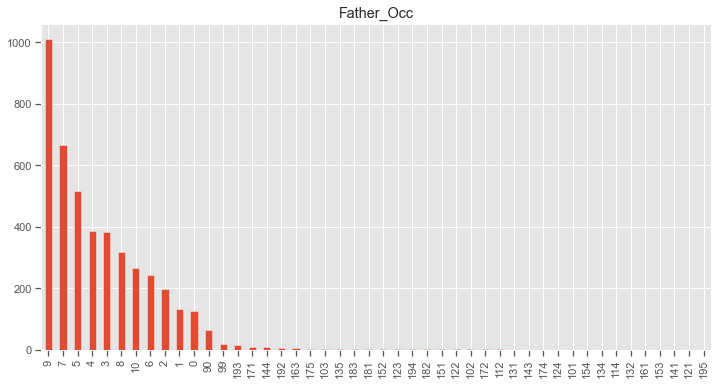

In [48]:
# ploting the bar chart for Father_Occ
df['Father_Occ'].value_counts().plot(kind = "bar", title = 'Father_Occ', figsize=(12, 6))
plt.xticks(rotation = 90)

plt.show()

#### Feature: Adm_Grade = Admission_Grade
Description: The Admission_Grade of students.

In [49]:
df.Adm_Grade.value_counts()

130.0    162
140.0    153
120.0    145
100.0    116
150.0     81
        ... 
98.5       1
164.3      1
173.3      1
155.8      1
103.8      1
Name: Adm_Grade, Length: 620, dtype: int64

In [50]:
df['Adm_Grade'].max()

190.0

In [51]:
df['Adm_Grade'].min()

95.0

#### Feature: Displaced
Description:  Students who are forced to flee their homes and consequently their schools for various reasons. For this analysis, we will assume 1 to represents students with the not-Displaced class and 0 to represents students with the Displaced class.

In [52]:
df.Displaced.value_counts()

1    2426
0    1998
Name: Displaced, dtype: int64

Text(0.5, 1.0, 'Distribution of Displaced Student')

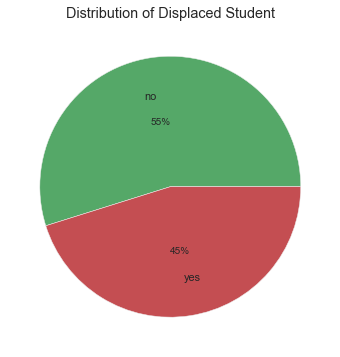

In [53]:
plt.figure(figsize=(6,6))
plt.pie(x=[2426, 1998], labels=['no','yes'], autopct='%1.0f%%', pctdistance=0.5,labeldistance=0.7,colors=['g','r'])
plt.title('Distribution of Displaced Student')

### *Inference*

We can see from the plot that students who are not displaced is 56% and those who are is 45%


#### Feature: Edu_Spec_Needs = Educational_Special_Needs 
Description:  Students who have learning problems or disabilities. For this analysis, we will assume 0 to represents students with the special needs class and 1 to represents students with the non-special needs class.

In [54]:
df.Edu_Spec_Needs.value_counts()

0    4373
1      51
Name: Edu_Spec_Needs, dtype: int64

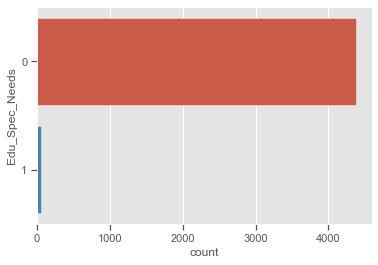

In [55]:
# What do the counts look like?
sns.countplot(y='Edu_Spec_Needs', data=df);

Text(0.5, 1.0, 'Distribution of Students with Special Needs')

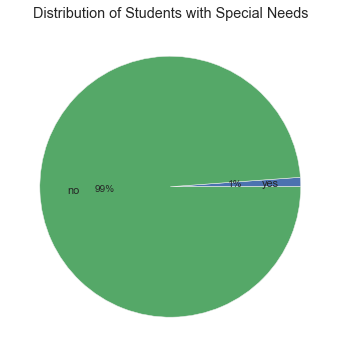

In [56]:
plt.figure(figsize=(6,6))
plt.pie(x=[51, 4373], labels=['yes','no'], autopct='%1.0f%%', pctdistance=0.5,labeldistance=0.7,colors=['b','g'])
plt.title('Distribution of Students with Special Needs')

### *Inference*

We can see from the plot that students who do not have special needs is 99% compared to those who have special needs


#### Feature: Debtor
Description:  Students who owes money. For easy analysis, we assume 0 to represents students who are not debtors and 1 to represents students who are debtors 

In [57]:
df.Debtor.value_counts()

0    3921
1     503
Name: Debtor, dtype: int64

Text(0.5, 1.0, 'Distribution of Students in Debts')

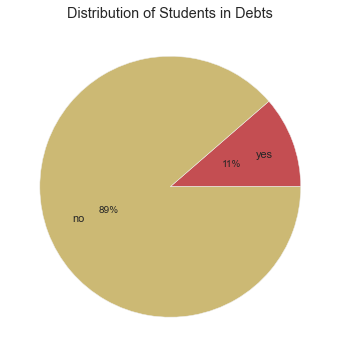

In [58]:
plt.figure(figsize=(6,6))
plt.pie(x=[503, 3921], labels=['yes','no'], autopct='%1.0f%%', pctdistance=0.5,labeldistance=0.7,colors=['r','y'])
plt.title('Distribution of Students in Debts')

 ### *Inference*

From the plot, it is shown that students who are not debtors is 89% which is more than those students who are debtors. 

#### Feature: Tui_Up_to_Date = Tuition_Fees_Up_to_Date 
Description:  Students who have their Tuition Fee up to date and those who do not have. For easy analysis, we assume that 0 represents students with Tuition fees not up to Date and 1 represents students with Tuition fees up to Date.

In [59]:
df.Tui_Up_to_Date.value_counts()

1    3896
0     528
Name: Tui_Up_to_Date, dtype: int64

Text(0.5, 1.0, 'Distribution of Students with Tuition Fees up to Date')

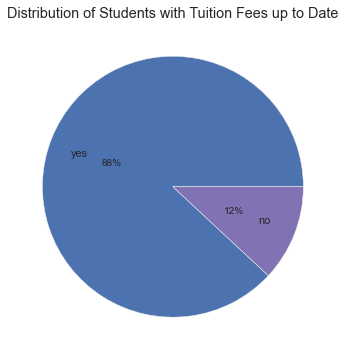

In [60]:
plt.figure(figsize=(6,6))
plt.pie(x=[3896, 528], labels=['yes','no'], autopct='%1.0f%%', pctdistance=0.5,labeldistance=0.7,colors=['b','m'])
plt.title('Distribution of Students with Tuition Fees up to Date')

### *Inference*

From the plot, it is shown that students with Tuition fees up to Date is more than students with Tuition fees not up to Date.



#### Feature: Gender 
Description:  The gender of Students, that is either Male or Female. For easy analysis we will assume that 0 represents female and 1 represents male.

In [61]:
df.Gender.value_counts()

0    2868
1    1556
Name: Gender, dtype: int64

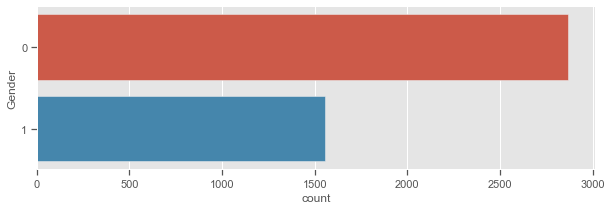

In [62]:
# Let's view the distribution of Gender
plt.figure(figsize=(10, 3))
sns.countplot(y="Gender", data=df);

### *Inference*

From the plot, it is shown that students who are female is more than students who are male.

####  Feature: S_Holder =  Scholarship_Holder 
Description: Student receiving financial aid to support their studies. For easy analysis, we will assume 0 represents non Scholarship Holder and 1 represents Scholarship Holder

In [63]:
df.S_Holder.value_counts()

0    3325
1    1099
Name: S_Holder, dtype: int64

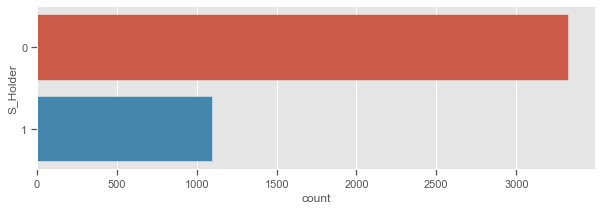

In [64]:
# Let's view the distribution of Scholarship_Holder?
plt.figure(figsize=(10, 3))
sns.countplot(y="S_Holder", data=df);

### *Inference*

From the plot, it is shown that students who are non Scholarship Holders are more than students who are Scholarship Holder.

#### Feature: Age_at_Enroll = Age_at_Enrollment 
Description:  The Age of Student at Enrollment.

In [65]:
df.Age_at_Enroll.value_counts()

18    1036
19     911
20     599
21     322
22     174
24     131
23     108
26      94
25      93
27      91
28      83
29      66
32      61
34      60
31      55
30      49
35      49
33      45
37      42
39      38
36      35
41      31
38      29
43      25
40      23
45      22
44      21
47      18
50      16
49      13
42      13
46      12
48      11
51       7
53       7
54       7
17       5
55       5
52       4
58       3
59       3
60       2
57       2
61       1
70       1
62       1
Name: Age_at_Enroll, dtype: int64

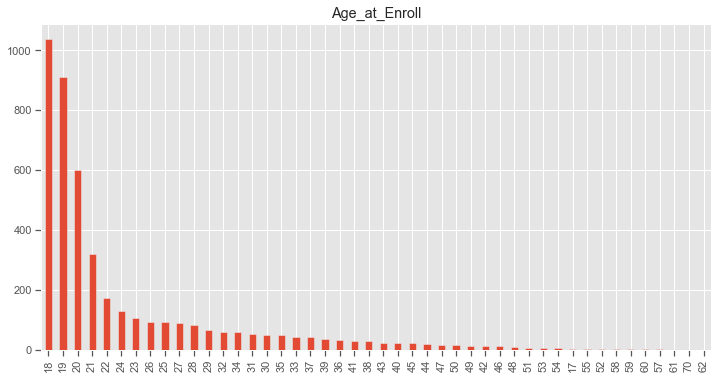

In [66]:
# ploting the bar chart for Age_at_Enroll
df['Age_at_Enroll'].value_counts().plot(kind = "bar", title = 'Age_at_Enroll', figsize=(12, 6))
plt.xticks(rotation = 90)

plt.show()

### *Inference*

From the plot, it is shown that students who are age 18 are more followed age 19, and 20 compared to the rest. 

#### Feature: International  
Description: Students who come from other part of the world to study. For easy analysis, we assume that 0 represents  international student and 1 represents non-international students.

In [67]:
df.International.value_counts()

0    4314
1     110
Name: International, dtype: int64

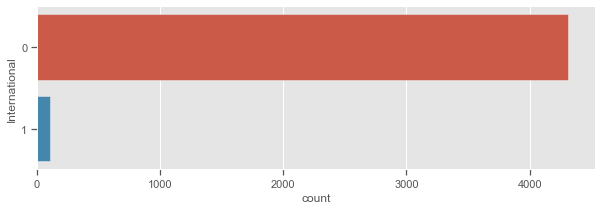

In [68]:
# Let's view the distribution of International Students?
plt.figure(figsize=(10, 3))
sns.countplot(y="International", data=df);

### *Inference*

From the plot, it is shown that international student is more the non-international students.

#### Feature: Cur_U_1st_Sem_Credit =  Curricular_Units_1st_Sem_Credited
Description: Curricular Credit units for Students in various course of study for the first semester

In [69]:
df.Cur_U_1st_Sem_Credit.value_counts()

0     3847
2       94
1       85
3       69
6       51
4       47
5       41
7       41
8       31
9       27
11      17
10      15
14      15
13      13
12      12
15       5
18       4
17       3
16       3
20       2
19       2
Name: Cur_U_1st_Sem_Credit, dtype: int64

#### Feature: Cur_U_1st_Sem_Enrol = Curricular_Units_1st_Sem_Enrolled
Description: Students enrolled in various units course of study for the first semester

In [70]:
df.Cur_U_1st_Sem_Enrol.value_counts()

6     1910
5     1010
7      656
8      296
0      180
12      66
10      52
11      45
9       36
15      25
14      22
4       21
13      20
18      19
17      16
16      13
3       10
2        9
1        7
21       6
19       2
23       2
26       1
Name: Cur_U_1st_Sem_Enrol, dtype: int64

#### Feature: Cur_U_1st_Sem_Eva = Curricular_Units_1st_Sem_Evaluations
Description: Students are evaluated to know how well they perform in their various unit course for the first semester. It is the process by which students are gauged to know the value and effectiveness of the various unit course taken in the first semester.

In [71]:
df.Cur_U_1st_Sem_Eva.value_counts()

8     791
7     703
6     598
9     402
0     349
10    340
11    239
12    223
5     220
13    140
14    105
15     70
16     47
17     33
18     30
19     23
4      19
21     17
20     12
22     10
23      9
2       8
1       6
24      6
3       6
26      4
25      3
27      2
29      2
45      2
33      1
36      1
32      1
28      1
31      1
Name: Cur_U_1st_Sem_Eva, dtype: int64

#### Feature: Cur_U_1st_Sem_Appr = Curricular_Units_1st_Sem_Approved
Description: The various unit courses approved for students taken in the first semester.

In [72]:
df.Cur_U_1st_Sem_Appr.value_counts()

6     1171
5      723
0      718
7      471
4      433
3      269
2      160
1      127
8      108
11      49
12      44
9       40
13      26
10      24
18      15
14      14
17      10
15       7
16       5
21       4
20       3
19       2
26       1
Name: Cur_U_1st_Sem_Appr, dtype: int64

#### Feature: Cur_U_1st_Sem_Grade = Curricular_Units_1st_Sem_Grade 
Description: The Grade in various unit courses for students taken in the first semester.

In [73]:
df.Cur_U_1st_Sem_Grade.value_counts()

0.000000     718
12.000000    205
13.000000    147
11.000000    138
11.500000     89
            ... 
13.828571      1
13.271667      1
16.153846      1
15.675714      1
15.888889      1
Name: Cur_U_1st_Sem_Grade, Length: 805, dtype: int64

In [74]:
df['Cur_U_1st_Sem_Grade'].max()

18.875

In [75]:
df['Cur_U_1st_Sem_Grade'].min()

0.0

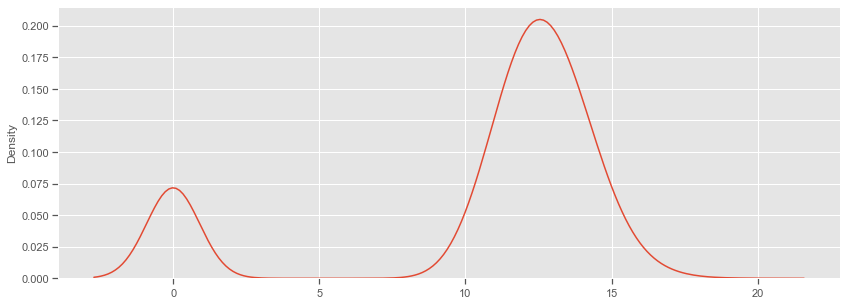

In [76]:
fig = plt.figure(figsize = (14,5))

sns.distplot(df[['Cur_U_1st_Sem_Grade']], hist = False)
plt.show()

#### Feature: Cur_U_1st_Sem_no_Eva = Curricular_Units_1st_Sem_Without_Evaluations
Description: Students are not evaluated to know how well they perform in their various unit course for the first semester. 

In [77]:
df.Cur_U_1st_Sem_no_Eva.value_counts()

0     4130
1      153
2       79
3       23
4       15
6        6
7        6
5        5
8        4
12       2
10       1
Name: Cur_U_1st_Sem_no_Eva, dtype: int64

#### Feature: Cur_U_2nd_Sem_Credit = Curricular_Units_2nd_Sem_Credited 
Description: Curricular Credit units for Students in various course of study for the second semester

In [78]:
df.groupby('Cur_U_1st_Sem_Credit')['Cur_U_1st_Sem_Grade'].agg('count')

Cur_U_1st_Sem_Credit
0     3847
1       85
2       94
3       69
4       47
5       41
6       51
7       41
8       31
9       27
10      15
11      17
12      12
13      13
14      15
15       5
16       3
17       3
18       4
19       2
20       2
Name: Cur_U_1st_Sem_Grade, dtype: int64

In [79]:
df.Cur_U_2nd_Sem_Credit.value_counts()

0     3894
1      107
2       92
4       78
5       68
3       49
6       26
11      20
7       16
9       15
12      14
10      13
8       12
13       9
14       4
16       2
18       2
15       2
19       1
Name: Cur_U_2nd_Sem_Credit, dtype: int64

#### Feature: Cur_U_2nd_Sem_Enrol = Curricular_Units_2nd_Sem_Enrolled
Description: Students enrolled in various units course of study for the second semester

In [80]:
df.Cur_U_2nd_Sem_Enrol.value_counts()

6     1913
5     1054
8      661
7      304
0      180
11      60
9       50
10      48
12      44
13      37
14      22
4       17
17      12
2        5
3        3
1        3
19       3
18       2
15       2
23       2
21       1
16       1
Name: Cur_U_2nd_Sem_Enrol, dtype: int64

#### Feature: Cur_U_2nd_Sem_Eva = Curricular_Units_2nd_Sem_Evaluations
Description: Students are evaluated to know how well they perform in their various unit course for the second semester. It is the process by which students are gauged to know the value and effectiveness of the various unit course taken in the second semester.

In [81]:
df.Cur_U_2nd_Sem_Eva.value_counts()

8     792
6     614
7     563
9     456
0     401
10    355
5     288
11    255
12    226
13    126
14     98
15     73
16     49
17     25
18     22
19     19
22     10
4      10
21     10
20      8
2       4
23      4
24      3
1       3
26      3
27      2
3       2
25      1
28      1
33      1
Name: Cur_U_2nd_Sem_Eva, dtype: int64

#### Feature: Cur_U_2nd_Sem_Approved = Curricular_Units_2nd_Sem_Approved
Description: The various unit courses approved for students taken in the second semester.

In [82]:
df.Cur_U_2nd_Sem_Approved.value_counts()

6     965
0     870
5     726
4     414
7     331
8     321
3     285
2     198
1     114
11     48
10     38
9      36
12     34
13     21
17      8
14      6
19      3
18      2
20      2
16      2
Name: Cur_U_2nd_Sem_Approved, dtype: int64

#### Feature: Cur_U_2nd_Sem_Grade =  Curricular_Units_2nd_Sem_Grade 
Description: The Grade in various unit courses for students taken in the second semester.

In [83]:
df.Cur_U_2nd_Sem_Grade.value_counts()

0.000000     870
12.000000    170
11.000000    165
13.000000    150
11.500000     86
            ... 
12.330000      1
16.075000      1
13.183333      1
13.657143      1
11.550000      1
Name: Cur_U_2nd_Sem_Grade, Length: 786, dtype: int64

In [84]:
df['Cur_U_2nd_Sem_Grade'].max()

18.571428571428573

In [85]:
df['Cur_U_2nd_Sem_Grade'].min()

0.0

#### Feature: Cur_U_2nd_Sem_no_Eva = Curricular_Units_2nd_Sem_Without_Evaluations
Description: Students are not evaluated to know how well they perform in their various unit course for the second semester. 

In [86]:
df.Cur_U_2nd_Sem_no_Eva.value_counts()

0     4142
1      140
2       48
3       35
4       21
5       17
6        8
8        6
7        5
12       2
Name: Cur_U_2nd_Sem_no_Eva, dtype: int64

#### Feature: Unmp_R = Unemployment_Rate
Description: It measures the share of workers in the labor force who do not currently have a job but are actively looking for work.

In [87]:
df.Unmp_R.value_counts()

7.6     571
9.4     533
10.8    525
12.4    445
12.7    419
11.1    414
15.5    397
13.9    390
8.9     368
16.2    362
Name: Unmp_R, dtype: int64

<AxesSubplot:xlabel='Unmp_R', ylabel='Density'>

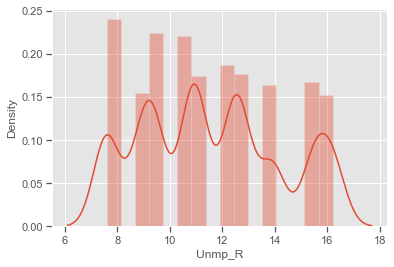

In [88]:
# ploting the distribution for Unmp_R
sns.distplot(df.Unmp_R)

#### Feature: Inf_R = Inflation_Rate
Description: The rate at which prices increase over time, resulting in a fall in the purchasing value of money.


In [89]:
df.Inf_R.value_counts()

 1.4    893
 2.6    571
-0.8    533
 0.5    445
 3.7    419
 0.6    414
 2.8    397
-0.3    390
 0.3    362
Name: Inf_R, dtype: int64

<AxesSubplot:xlabel='Inf_R', ylabel='Density'>

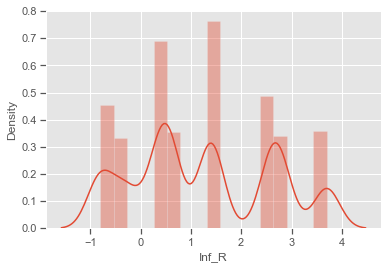

In [90]:
# ploting the distribution for Inf_R
sns.distplot(df.Inf_R)

#### Feature: GDP 
Description: The GDP measures the monetary value of goods and services produced within a country's borders in a given time period, usually a quarter or a year.

In [91]:
df.GDP.value_counts()

 0.32    571
-3.12    533
 1.74    525
 1.79    445
-1.70    419
 2.02    414
-4.06    397
 0.79    390
 3.51    368
-0.92    362
Name: GDP, dtype: int64

<AxesSubplot:xlabel='GDP', ylabel='Density'>

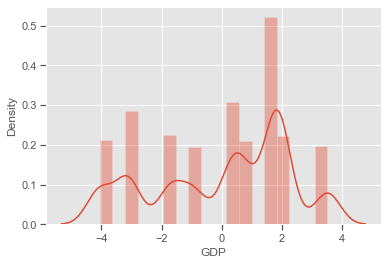

In [92]:
# ploting the distribution for GDP
sns.distplot(df.GDP)

### Bi-Variate Analysis

Text(0, 0.5, 'Frequency of Student Perfomance')

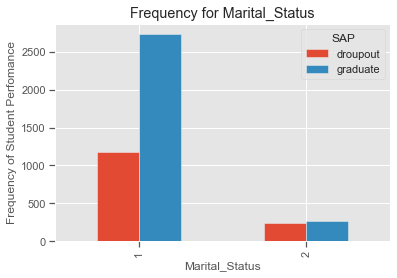

In [93]:
# Student performnce vs Marital Status
%matplotlib inline
pd.crosstab(df.Marital_Status,df.SAP).plot(kind='bar')
plt.title('Frequency for Marital_Status')
plt.xlabel('Marital_Status')
plt.ylabel('Frequency of Student Perfomance')

### *Inference*

From the plot, it is shown that students who are from the unmarried class will dropout and graduate more than those in the married class.

Text(0, 0.5, 'Proportion of Student Perfomance')

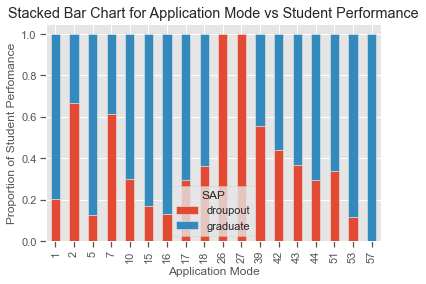

In [94]:
# Student performnce vs Ap_Mode
table=pd.crosstab(df.Ap_Mode,df.SAP)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart for Application Mode vs Student Performance')
plt.xlabel('Application Mode')
plt.ylabel('Proportion of Student Perfomance')

### *Inference*

From the plot, it is shown that students who are from the 26-class and 27-class application mode will dropout than the rest. Also, those with the 57-class application mode are likely to graduate more than the rest. 

Text(0, 0.5, 'Proportion of Student Perfomance')

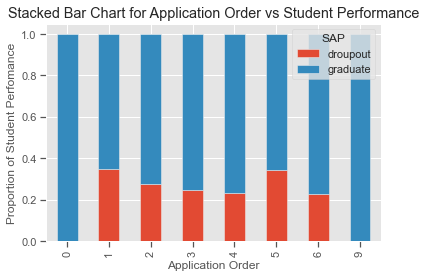

In [95]:
# Student performnce vs Ap_Order
table=pd.crosstab(df.Ap_Order,df.SAP)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart for Application Order vs Student Performance')
plt.xlabel('Application Order')
plt.ylabel('Proportion of Student Perfomance')

### *Inference*

From the plot, it is shown that students who have the 0 and 9 Application Order would dropout. 

Text(0, 0.5, 'Proportion of Student Perfomance')

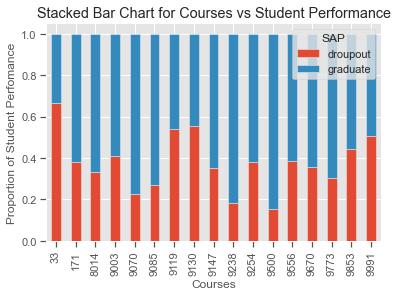

In [96]:
# Student performnce vs Course
table=pd.crosstab(df.Course,df.SAP)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart for Courses vs Student Performance')
plt.xlabel('Courses')
plt.ylabel('Proportion of Student Perfomance')

### *Inference*

From the plot, it is shown that students who are enrolled into machanical engineering, biology, finance and design, are likely to graduate more than the rest. However, students who are enrolled into Courses like managment, information tecnology and nursing are likely to dropout than the rest.

Text(0, 0.5, 'Frequency of Student Perfomance')

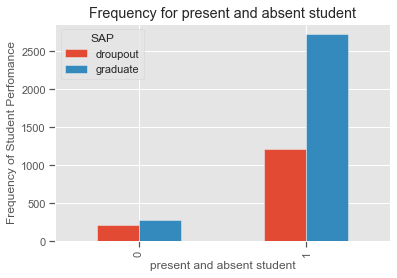

In [97]:
# Student performnce vs Attendance
%matplotlib inline
pd.crosstab(df.Attendance,df.SAP).plot(kind='bar')
plt.title('Frequency for present and absent student')
plt.xlabel('present and absent student')
plt.ylabel('Frequency of Student Perfomance')

### *Inference*

From the plot, it is shown that students who are present are more than the absent.

Text(0, 0.5, 'Proportion of Student Perfomance')

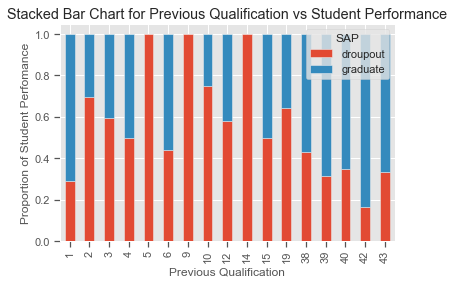

In [98]:
# Student performnce vs Prev_Qua
table=pd.crosstab(df.Prev_Qua,df.SAP)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart for Previous Qualification vs Student Performance')
plt.xlabel('Previous Qualification')
plt.ylabel('Proportion of Student Perfomance')

### *Inference*

From the plot, it is shown that students who have HND as their Previous Qualification are more likely to dropout than the rest. However, students who have Diploma and OND as Previous Qualification are more likely to graduate.

Text(0, 0.5, 'Proportion of Student Perfomance')

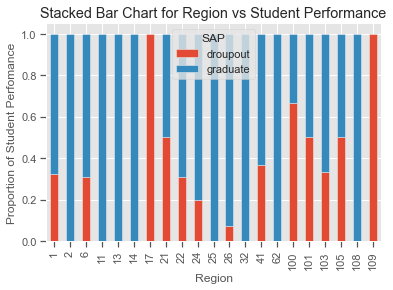

In [99]:
# Student performnce vs Nationality
table=pd.crosstab(df.Region,df.SAP)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart for Region vs Student Performance')
plt.xlabel('Region')
plt.ylabel('Proportion of Student Perfomance')

Text(0, 0.5, 'Proportion of Student Perfomance')

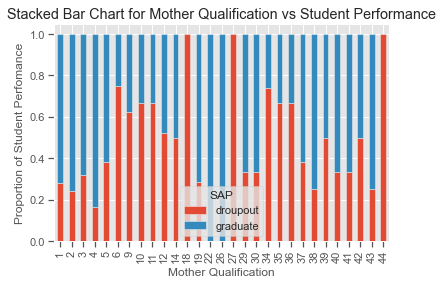

In [100]:
# Student performnce vs Mother_Qua
table=pd.crosstab(df.Mother_Qua,df.SAP)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart for Mother Qualification vs Student Performance')
plt.xlabel('Mother Qualification')
plt.ylabel('Proportion of Student Perfomance')

Text(0, 0.5, 'Proportion of Student Perfomance')

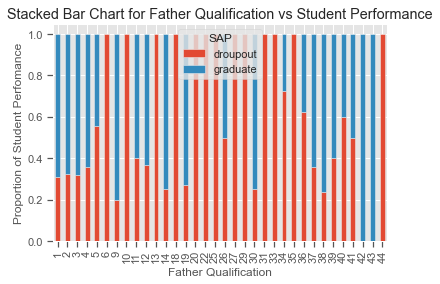

In [101]:
# Student performnce vs Father_Qua
table=pd.crosstab(df.Father_Qua,df.SAP)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart for Father Qualification vs Student Performance')
plt.xlabel('Father Qualification')
plt.ylabel('Proportion of Student Perfomance')

Text(0, 0.5, 'Proportion of Student Perfomance')

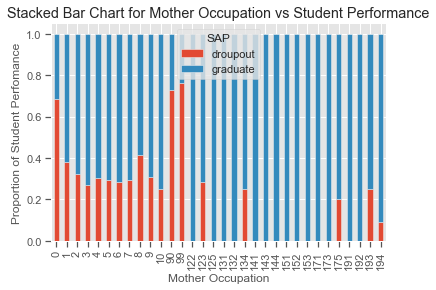

In [102]:
# Student performnce vs Mother_Occ
table=pd.crosstab(df.Mother_Occ,df.SAP)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart for Mother Occupation vs Student Performance')
plt.xlabel('Mother Occupation')
plt.ylabel('Proportion of Student Perfomance')

Text(0, 0.5, 'Proportion of Student Perfomance')

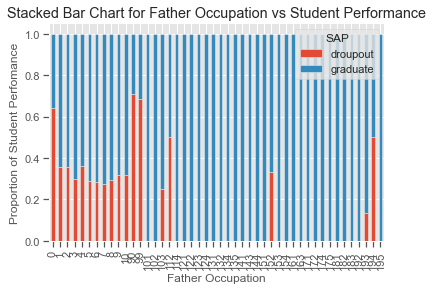

In [103]:
# Student performnce vs Father_Occ
table=pd.crosstab(df.Father_Occ,df.SAP)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart for Father Occupation vs Student Performance')
plt.xlabel('Father Occupation')
plt.ylabel('Proportion of Student Perfomance')

Text(0, 0.5, 'Proportion of Student Perfomance')

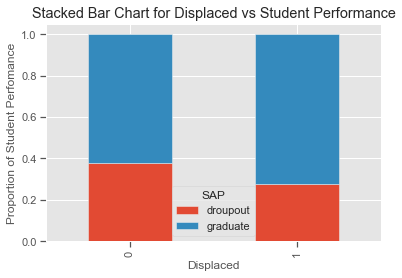

In [104]:
# Student performnce vs Displaced
table=pd.crosstab(df.Displaced,df.SAP)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart for Displaced vs Student Performance')
plt.xlabel('Displaced')
plt.ylabel('Proportion of Student Perfomance')

### *Inference*

From the plot, it is shown that students are Displaced are more likely to dropout than graduate than those who are not Displaced.

Text(0, 0.5, 'Proportion of Student Perfomance')

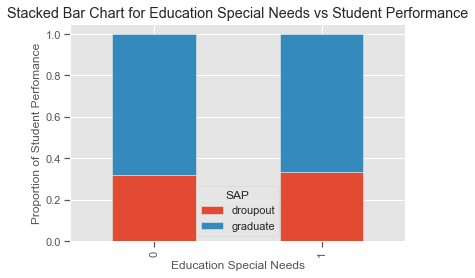

In [105]:
# Student performnce vs Edu_Spec_Needs
table=pd.crosstab(df.Edu_Spec_Needs,df.SAP)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart for Education Special Needs vs Student Performance')
plt.xlabel('Education Special Needs')
plt.ylabel('Proportion of Student Perfomance')

Text(0, 0.5, 'Proportion of Student Perfomance')

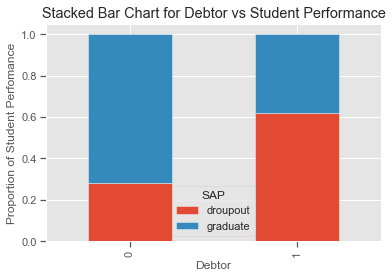

In [106]:
# Student performnce vs Debtor
table=pd.crosstab(df.Debtor,df.SAP)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart for Debtor vs Student Performance')
plt.xlabel('Debtor')
plt.ylabel('Proportion of Student Perfomance')

### *Inference*

From the plot, it is shown that students who are debtors are more likely to dropout than graduate than those who are not.


Text(0, 0.5, 'Proportion of Student Perfomance')

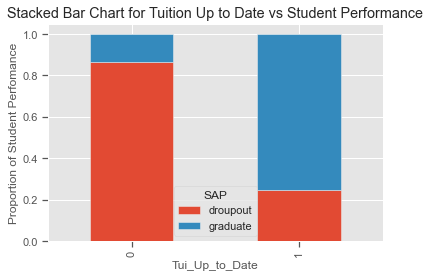

In [107]:
# Student performnce vs Tui_Up_to_Date
table=pd.crosstab(df.Tui_Up_to_Date,df.SAP)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart for Tuition Up to Date vs Student Performance')
plt.xlabel('Tui_Up_to_Date')
plt.ylabel('Proportion of Student Perfomance')

### *Inference*

From the plot, it is shown that students whose Tuition is not Up to Date are more likely to dropout than graduate than those  whose Tuition is Up to Date.


Text(0, 0.5, 'Proportion of Student Perfomance')

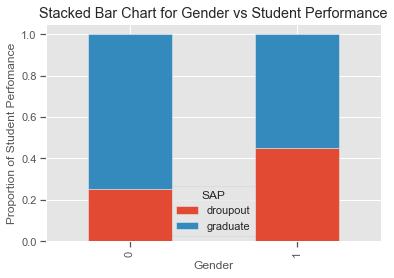

In [108]:
# Student performnce vs Gender
table=pd.crosstab(df.Gender,df.SAP)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart for Gender vs Student Performance')
plt.xlabel('Gender')
plt.ylabel('Proportion of Student Perfomance')

### *Inference*

From the plot, it is shown that students are male are more likely to dropout than graduate than those who are female.

Text(0, 0.5, 'Proportion of Student Perfomance')

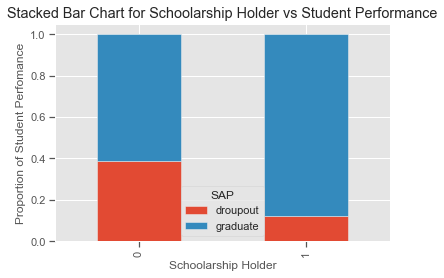

In [109]:
# Student performnce vs S_Holder
table=pd.crosstab(df.S_Holder,df.SAP)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart for Schoolarship Holder vs Student Performance')
plt.xlabel('Schoolarship Holder')
plt.ylabel('Proportion of Student Perfomance')

### *Inference*

From the plot, it is shown that students who are non Scholarship Holders are more likely to dropout than graduate than those who are Scholarship Holders.

Text(0, 0.5, 'Proportion of Student Perfomance')

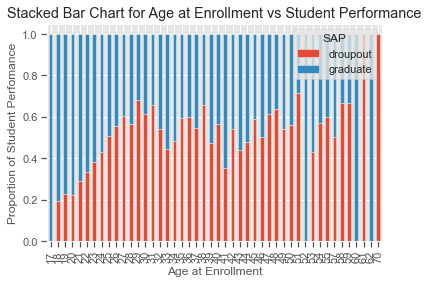

In [110]:
# Student performnce vs Age at Enrollment
table=pd.crosstab(df.Age_at_Enroll,df.SAP)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart for Age at Enrollment vs Student Performance')
plt.xlabel('Age at Enrollment')
plt.ylabel('Proportion of Student Perfomance')

Text(0, 0.5, 'Proportion of Student Perfomance')

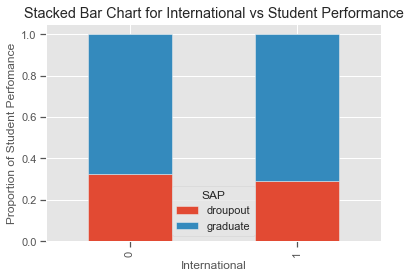

In [111]:
# Student performnce vs International
table=pd.crosstab(df.International,df.SAP)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart for International vs Student Performance')
plt.xlabel('International')
plt.ylabel('Proportion of Student Perfomance')

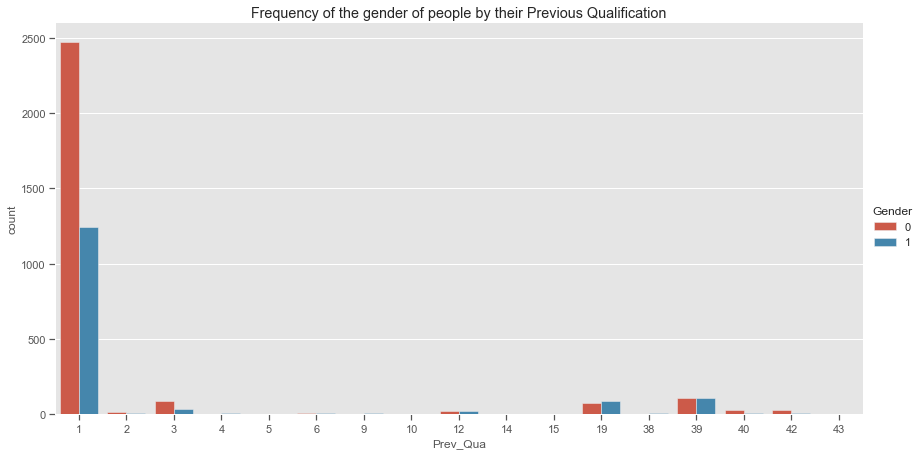

In [112]:
#Countplot showing the freqency of the gender of people by their Previous Qualification level
debtor_count = sns.catplot(x="Prev_Qua", hue = "Gender", kind="count", height=6, aspect=2, data = df)
plt.title("Frequency of the gender of people by their Previous Qualification")
plt.show()
debtor_count.savefig("debtor_count.png")

In [113]:
#The Gender level of those who are Dropout
df.groupby("SAP").get_group('graduate')["Gender"].value_counts()

0    2148
1     855
Name: Gender, dtype: int64

In [114]:
df.groupby('Cur_U_1st_Sem_Grade').count()

,Marital_Status,Ap_Mode,Ap_Order,Course,Attendance,Prev_Qua,Prev_Qua_Grade,Region,Mother_Qua,Father_Qua,...,Cur_U_2nd_Sem_Credit,Cur_U_2nd_Sem_Enrol,Cur_U_2nd_Sem_Eva,Cur_U_2nd_Sem_Approved,Cur_U_2nd_Sem_Grade,Cur_U_2nd_Sem_no_Eva,Unmp_R,Inf_R,GDP,SAP
Cur_U_1st_Sem_Grade,,,,,,,,,,,,,,,,,,,,,
0.000000,718,718,718,718,718,718,718,718,718,718,...,718,718,718,718,718,718,718,718,718,718
9.800000,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
10.000000,82,82,82,82,82,82,82,82,82,82,...,82,82,82,82,82,82,82,82,82,82
10.166667,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
10.200000,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17.111111,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
17.125000,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
17.333333,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


In [115]:
df.groupby('Cur_U_1st_Sem_Grade').mean()

,Marital_Status,Ap_Mode,Ap_Order,Course,Attendance,Prev_Qua,Prev_Qua_Grade,Region,Mother_Qua,Father_Qua,...,Cur_U_1st_Sem_no_Eva,Cur_U_2nd_Sem_Credit,Cur_U_2nd_Sem_Enrol,Cur_U_2nd_Sem_Eva,Cur_U_2nd_Sem_Approved,Cur_U_2nd_Sem_Grade,Cur_U_2nd_Sem_no_Eva,Unmp_R,Inf_R,GDP
Cur_U_1st_Sem_Grade,,,,,,,,,,,,,,,,,,,,,
0.000000,1.153203,22.224234,1.582173,6976.500000,0.869081,4.743733,132.738162,1.871866,20.153203,21.923398,...,0.254875,0.006964,4.252089,3.261838,0.108635,0.689674,0.254875,11.564763,1.302368,-0.212159
9.800000,1.000000,7.000000,1.000000,9556.000000,1.000000,2.000000,130.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,7.000000,0.000000,0.000000,0.000000,12.700000,3.700000,-1.700000
10.000000,1.170732,22.878049,1.500000,9209.304878,0.817073,2.146341,128.231707,1.536585,23.414634,25.853659,...,0.097561,0.012195,5.365854,9.024390,1.341463,7.560017,0.146341,10.904878,1.530488,-0.573659
10.166667,1.000000,18.000000,1.000000,9238.000000,1.000000,1.000000,122.000000,1.000000,1.000000,3.000000,...,0.000000,0.000000,6.000000,10.000000,6.000000,10.500000,0.000000,12.700000,3.700000,-1.700000
10.200000,1.250000,15.000000,1.750000,9271.750000,0.875000,3.250000,128.637500,1.000000,26.250000,21.375000,...,0.000000,0.000000,5.250000,8.000000,4.000000,11.456250,0.000000,12.250000,1.137500,0.002500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17.111111,1.000000,7.000000,1.000000,9003.000000,1.000000,3.000000,130.000000,1.000000,3.000000,3.000000,...,0.000000,2.000000,6.000000,9.000000,6.000000,15.571429,0.000000,13.900000,-0.300000,0.790000
17.125000,1.000000,18.000000,1.000000,9500.000000,1.000000,1.000000,178.000000,1.000000,19.000000,1.000000,...,0.000000,0.000000,8.000000,8.000000,8.000000,17.587500,0.000000,13.900000,-0.300000,0.790000
17.333333,1.000000,22.000000,1.000000,9119.000000,1.000000,1.000000,154.000000,1.000000,28.000000,28.500000,...,0.000000,0.000000,5.000000,9.500000,3.000000,17.785714,0.000000,13.150000,0.100000,1.290000


In [116]:
df.groupby('Cur_U_1st_Sem_Grade', as_index=False).agg({"Cur_U_2nd_Sem_Grade": "sum"})

,Cur_U_1st_Sem_Grade,Cur_U_2nd_Sem_Grade
0,0.000000,495.185714
1,9.800000,0.000000
2,10.000000,619.921429
3,10.166667,10.500000
4,10.200000,91.650000
...,...,...
800,17.111111,15.571429
801,17.125000,17.587500
802,17.333333,35.571429
803,18.000000,26.333333


In [117]:
df.groupby('Ap_Mode')['Course'].sum()

Ap_Mode
1     14760392
2        28147
5       140536
7      1256548
10       94083
15      261775
16      298149
17     7850433
18     1134858
26        9147
27        9070
39     7131778
42      709228
43     2785999
44     1871488
51      518423
53      311742
57        9991
Name: Course, dtype: int64

#### Feature selection
Feature selection is choosing the best set of features for predictions


In [118]:
from sklearn.preprocessing import LabelEncoder


le_SAP = LabelEncoder()


df['SAP'] = le_SAP.fit_transform(df['SAP'])

df

,Marital_Status,Ap_Mode,Ap_Order,Course,Attendance,Prev_Qua,Prev_Qua_Grade,Region,Mother_Qua,Father_Qua,...,Cur_U_2nd_Sem_Credit,Cur_U_2nd_Sem_Enrol,Cur_U_2nd_Sem_Eva,Cur_U_2nd_Sem_Approved,Cur_U_2nd_Sem_Grade,Cur_U_2nd_Sem_no_Eva,Unmp_R,Inf_R,GDP,SAP
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,1
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,0
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,0
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,1


<AxesSubplot:>

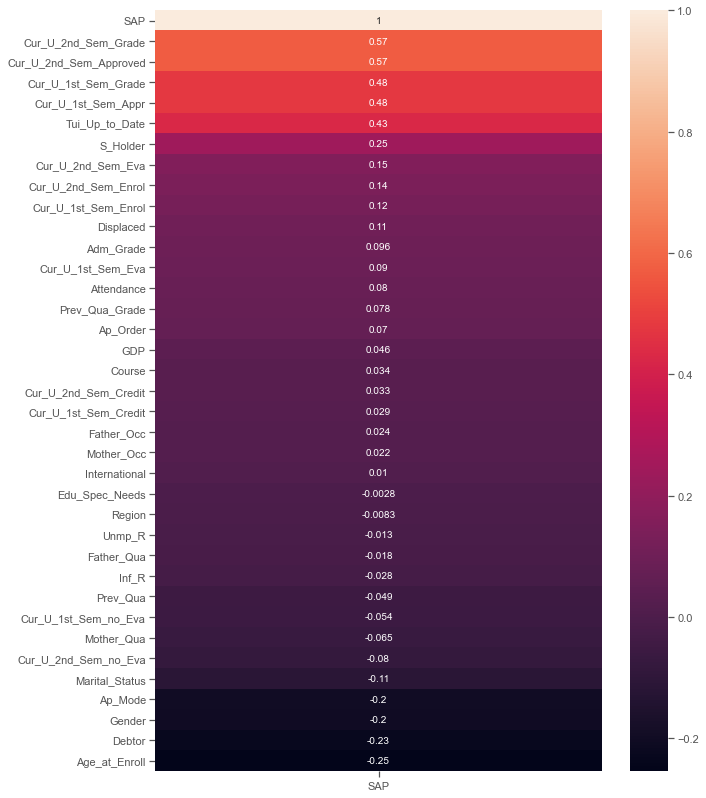

In [119]:
# getting the correlation values using Pearson's method and then visualize the correlations using Heatmap
fig, ax = plt.subplots(figsize=(10,14))
df_corr = df.corr()[['SAP']].sort_values(
    by='SAP', ascending=False)
sns.heatmap(df_corr, annot=True, ax=ax)

[0.01161747 0.05830134 0.03686227 0.07336057 0.01089649 0.02439063
 0.07978625 0.00785742 0.06040064 0.05799607 0.06759374 0.07240043
 0.08671393 0.02164063 0.00453248 0.03108632 0.13561973 0.02876937
 0.0405744  0.08959983]


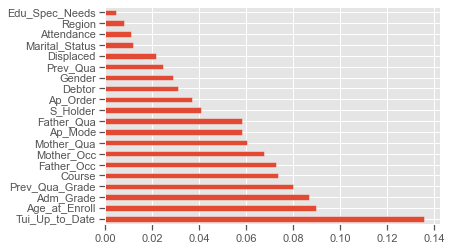

In [120]:
# Performing Feature Importance on each variable
# Feature importance gives a score for each feature in dataset, the higher the score the relevant is the feature.

data = df
X = data.iloc[:,0:20]  #independent columns
y = data.iloc[:,-1]    #target column i.e Student Performance

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [121]:
# creating  correlation matrix for the columns in the dataset and an empty set that will contain all the correlated features
correlated_features = set()
correlation_matrix = df.corr()

In [122]:
# looping through all the columns in the correlation matrix.
for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.7: # adding the columns with a correlation value of 0.7 to the
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [123]:
# checking the total length of correlated columns in our dataset
len(correlated_features)

9

In [124]:
# printing the names of the correlated features
print(correlated_features)

{'Cur_U_2nd_Sem_Eva', 'International', 'Cur_U_2nd_Sem_Credit', 'Cur_U_2nd_Sem_Grade', 'Cur_U_2nd_Sem_Approved', 'Cur_U_1st_Sem_Appr', 'Cur_U_2nd_Sem_Enrol', 'Father_Occ', 'Cur_U_1st_Sem_Enrol'}


### *Model*

The modelling phase consists of applying different machine learning techniques to the dataset. The goal of the prediction is to create a model based on the students’ current activities and accomplishments that attempts to predict learner failure and future performance. It is a typical classification problem, which a multi classification model can solve in order to predict whether a student can complete the programe or not, that is, whether a student will graduate or not.

We will choose a model that is relevant to the task at hand. Since it is a classification problem, the model selected will be one suited for the categorical data.

In [125]:
# Selecting the features to be used for modelling and dropping the unimportant ones.
new_feature=['Marital_Status', 'Course', 'Attendance','Prev_Qua', 'Prev_Qua_Grade', 'Region', 
        'Mother_Qua','Father_Qua','Adm_Grade', 'Tui_Up_to_Date', 'Gender', 'S_Holder', 
        'Age_at_Enroll','Cur_U_1st_Sem_Credit', 'Cur_U_1st_Sem_Grade',
        'Cur_U_2nd_Sem_Credit', 'Cur_U_2nd_Sem_Grade','SAP'] 

df = df[new_feature]
df

,Marital_Status,Course,Attendance,Prev_Qua,Prev_Qua_Grade,Region,Mother_Qua,Father_Qua,Adm_Grade,Tui_Up_to_Date,Gender,S_Holder,Age_at_Enroll,Cur_U_1st_Sem_Credit,Cur_U_1st_Sem_Grade,Cur_U_2nd_Sem_Credit,Cur_U_2nd_Sem_Grade,SAP
0,1,171,1,1,122.0,1,19,12,127.3,1,1,0,20,0,0.000000,0,0.000000,0
1,1,9254,1,1,160.0,1,1,3,142.5,0,1,0,19,0,14.000000,0,13.666667,1
2,1,9070,1,1,122.0,1,37,37,124.8,0,1,0,19,0,0.000000,0,0.000000,0
3,1,9773,1,1,122.0,1,38,37,119.6,1,0,0,20,0,13.428571,0,12.400000,1
4,2,8014,0,1,100.0,1,37,38,141.5,1,0,0,45,0,12.333333,0,13.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,9773,1,1,125.0,1,1,1,122.2,1,1,0,19,0,13.600000,0,12.666667,1
4420,1,9773,1,1,120.0,105,1,1,119.0,0,0,0,18,0,12.000000,0,11.000000,0
4421,1,9500,1,1,154.0,1,37,37,149.5,1,0,1,30,0,14.912500,0,13.500000,0
4422,1,9147,1,1,180.0,1,37,37,153.8,1,0,1,20,0,13.800000,0,12.000000,1


In [128]:
df.SAP.value_counts()

1    3003
0    1421
Name: SAP, dtype: int64

In [129]:
# saving the data used for modling in a csv file

df.to_csv('../data.csv', index=False)

In [130]:
# Importing Machine learning Library

from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv
from time import sleep
import random
import time
import datetime
import warnings
warnings.filterwarnings('ignore')

In [131]:
# Split into input and output features
y = df["SAP"]
X = df[['Marital_Status', 'Course', 'Attendance','Prev_Qua', 'Prev_Qua_Grade', 'Region', 
        'Mother_Qua','Father_Qua','Adm_Grade', 'Tui_Up_to_Date', 'Gender', 'S_Holder', 
        'Age_at_Enroll','Cur_U_1st_Sem_Credit', 'Cur_U_1st_Sem_Grade',
        'Cur_U_2nd_Sem_Credit', 'Cur_U_2nd_Sem_Grade']]
X.head()

,Marital_Status,Course,Attendance,Prev_Qua,Prev_Qua_Grade,Region,Mother_Qua,Father_Qua,Adm_Grade,Tui_Up_to_Date,Gender,S_Holder,Age_at_Enroll,Cur_U_1st_Sem_Credit,Cur_U_1st_Sem_Grade,Cur_U_2nd_Sem_Credit,Cur_U_2nd_Sem_Grade
0,1,171,1,1,122.0,1,19,12,127.3,1,1,0,20,0,0.000000,0,0.000000
1,1,9254,1,1,160.0,1,1,3,142.5,0,1,0,19,0,14.000000,0,13.666667
2,1,9070,1,1,122.0,1,37,37,124.8,0,1,0,19,0,0.000000,0,0.000000
3,1,9773,1,1,122.0,1,38,37,119.6,1,0,0,20,0,13.428571,0,12.400000
4,2,8014,0,1,100.0,1,37,38,141.5,1,0,0,45,0,12.333333,0,13.000000


In [132]:
# Splitting the data into train and test. 80% for training and 20% for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
X_train.shape, X_test.shape

((3539, 17), (885, 17))

In [133]:
X_train

,Marital_Status,Course,Attendance,Prev_Qua,Prev_Qua_Grade,Region,Mother_Qua,Father_Qua,Adm_Grade,Tui_Up_to_Date,Gender,S_Holder,Age_at_Enroll,Cur_U_1st_Sem_Credit,Cur_U_1st_Sem_Grade,Cur_U_2nd_Sem_Credit,Cur_U_2nd_Sem_Grade
3383,2,9147,1,3,130.0,1,19,1,130.0,1,0,0,35,0,0.000000,0,0.000000
2840,1,9085,1,1,130.0,1,37,37,110.0,1,0,1,25,0,11.666667,0,11.333333
564,1,9070,1,6,119.0,1,1,1,123.2,1,1,0,22,0,14.166667,0,13.625000
1786,2,9238,1,19,133.1,1,37,37,103.5,1,1,0,42,0,0.000000,0,0.000000
3900,1,9500,1,1,142.0,1,37,38,137.3,1,0,1,22,0,13.900000,0,13.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3444,1,9070,1,1,134.0,1,1,19,127.7,0,0,0,18,1,11.714286,0,11.333333
466,1,9853,1,1,133.0,1,1,38,131.3,1,0,0,20,0,14.333333,4,12.625000
3092,1,8014,0,1,100.0,1,38,19,112.8,1,0,1,23,0,14.166667,0,12.500000
3772,1,9238,1,1,127.0,1,1,38,120.4,1,0,1,19,0,13.500000,0,13.428571


In [134]:
X_test

,Marital_Status,Course,Attendance,Prev_Qua,Prev_Qua_Grade,Region,Mother_Qua,Father_Qua,Adm_Grade,Tui_Up_to_Date,Gender,S_Holder,Age_at_Enroll,Cur_U_1st_Sem_Credit,Cur_U_1st_Sem_Grade,Cur_U_2nd_Sem_Credit,Cur_U_2nd_Sem_Grade
1255,2,9130,1,1,133.1,1,3,1,110.0,1,0,1,30,0,0.000000,0,10.000000
3458,1,9238,1,1,125.0,1,4,3,119.8,1,0,0,18,0,11.571429,0,12.142857
3390,1,9853,1,1,133.0,1,38,38,127.4,1,0,1,18,0,12.714286,0,12.285714
1497,1,9670,1,1,110.0,1,1,1,115.3,1,1,0,19,0,13.857143,0,13.000000
1536,1,9500,1,1,130.0,1,37,19,106.2,1,0,0,27,0,0.000000,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3162,1,9500,1,1,136.0,1,19,38,123.0,1,0,0,19,0,14.328571,0,14.328571
3281,2,8014,0,3,130.0,1,35,35,140.0,0,0,0,59,10,13.333333,8,12.875000
436,1,9254,1,1,122.0,1,19,19,118.2,1,0,1,20,0,11.250000,0,10.500000
1434,1,9500,1,1,130.0,1,1,38,125.1,1,0,1,18,0,12.816667,0,12.875000


In [135]:
y_train

3383    0
2840    1
564     1
1786    0
3900    1
       ..
3444    0
466     1
3092    1
3772    1
860     0
Name: SAP, Length: 3539, dtype: int32

In [136]:
y_test

1255    0
3458    1
3390    1
1497    1
1536    0
       ..
3162    1
3281    0
436     1
1434    1
1361    1
Name: SAP, Length: 885, dtype: int32

## Implementing The Classification Models

We will build Six models and compare their accuracy scores. We will train the model with cross_validation which will train the data on different training set and it will calculate accuracy for all the test train split. We are printing the accuracy for all the splits in cross validation. We have passed model, data, target and cv an parameters. cv signifies the number of splits we want while performing cross validation.

In [137]:
# defining a function to fit our machine learning algorithms. 
# This will prevent writing of codes, we will functionise fitting the model and returning the accuracy scores.

# the Function that runs through the selected algorithm and returns the accuracy score
def fit_ml_algo(algo, X_train, y_train, cv):
    
    # One Pass
    model = algo.fit(X_train, y_train)
    acc = round(model.score(X_train, y_train) * 100, 2)
    
    # performing Cross Validation 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    # Cross-validation accuracy score
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    
    return train_pred, acc, acc_cv

###  1. Gaussian Naive Bayes

In [138]:
# Gaussian Naive Bayes
start_time = time.time()
train_pred_gaussian, acc_gaussian, acc_cv_gaussian = fit_ml_algo(GaussianNB(), 
                                                                      X_train, 
                                                                      y_train, 
                                                                           10)
gaussian_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)
print("Running Time: %s" % datetime.timedelta(seconds=gaussian_time))

Accuracy: 81.72
Accuracy CV 10-Fold: 81.72
Running Time: 0:04:22.596408


### *Inference*

The Accuracy Score gives 81.72 which means that the model has performed 82%

### 2. Linear SVC

In [139]:
# Linear SVC
start_time = time.time()
train_pred_svc, acc_linear_svc, acc_cv_linear_svc = fit_ml_algo(LinearSVC(),
                                                                X_train, 
                                                                y_train, 
                                                                10)
linear_svc_time = (time.time() - start_time)
print("Accuracy: %s" % acc_linear_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_linear_svc)
print("Running Time: %s" % datetime.timedelta(seconds=linear_svc_time))

Accuracy: 78.69
Accuracy CV 10-Fold: 71.69
Running Time: 0:00:04.742866


### *Inference*

The Accuracy Score gives 78.69 which means that the model has performed 79%

### 3. Decision Tree Classifier

In [140]:
# Decision Tree Classifier
start_time = time.time()
train_pred_dt, acc_dt, acc_cv_dt = fit_ml_algo(DecisionTreeClassifier(), 
                                                                X_train, 
                                                                y_train,
                                                                10)
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

Accuracy: 100.0
Accuracy CV 10-Fold: 78.92
Running Time: 0:00:01.750809


### *Inference*


The Accuracy Score gives 99 which means that the model has performed really well. That is, it performed 100%

### 4. Logistic Regression

In [141]:
# Logistic Regression
start_time = time.time()
train_pred_log, acc_log, acc_cv_log = fit_ml_algo(LogisticRegression(), 
                                                               X_train, 
                                                               y_train, 
                                                                    10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 82.71
Accuracy CV 10-Fold: 82.37
Running Time: 0:00:02.516780


### *Inference*


The Accuracy Score gives 82.71 which means that the model has performed 83%

### 5. k-Nearest Neighbours

In [142]:
# k-Nearest Neighbours
start_time = time.time()
train_pred_knn, acc_knn, acc_cv_knn = fit_ml_algo(KNeighborsClassifier(), 
                                                  X_train, 
                                                  y_train, 
                                                  10)
knn_time = (time.time() - start_time)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))

Accuracy: 82.99
Accuracy CV 10-Fold: 76.18
Running Time: 0:00:03.064289


### *Inference*

The Accuracy Score gives 82.99 which means that the model has performed 83%

In [143]:
# View the data for the CatBoost model
X_train.head()

,Marital_Status,Course,Attendance,Prev_Qua,Prev_Qua_Grade,Region,Mother_Qua,Father_Qua,Adm_Grade,Tui_Up_to_Date,Gender,S_Holder,Age_at_Enroll,Cur_U_1st_Sem_Credit,Cur_U_1st_Sem_Grade,Cur_U_2nd_Sem_Credit,Cur_U_2nd_Sem_Grade
3383,2,9147,1,3,130.0,1,19,1,130.0,1,0,0,35,0,0.000000,0,0.000000
2840,1,9085,1,1,130.0,1,37,37,110.0,1,0,1,25,0,11.666667,0,11.333333
564,1,9070,1,6,119.0,1,1,1,123.2,1,1,0,22,0,14.166667,0,13.625000
1786,2,9238,1,19,133.1,1,37,37,103.5,1,1,0,42,0,0.000000,0,0.000000
3900,1,9500,1,1,142.0,1,37,38,137.3,1,0,1,22,0,13.900000,0,13.900000


In [144]:
# View the labels for the CatBoost model
y_train.head()

3383    0
2840    1
564     1
1786    0
3900    1
Name: SAP, dtype: int32

In [145]:
# Using the CatBoost Pool() function to pool together the training data and feature labels
train_pool = Pool(X_train, 
                  y_train)

In [146]:
# CatBoost model definition
catboost_model = CatBoostClassifier(iterations=1000,
                                    custom_loss=['Accuracy'],
                                    loss_function='Logloss')

# Fit CatBoost model
catboost_model.fit(train_pool,
                   plot=True)

# CatBoost accuracy
acc_catboost = round(catboost_model.score(X_train, y_train) * 100, 2)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.017673
0:	learn: 0.6804835	total: 409ms	remaining: 6m 48s
1:	learn: 0.6679777	total: 420ms	remaining: 3m 29s
2:	learn: 0.6550904	total: 433ms	remaining: 2m 23s
3:	learn: 0.6431150	total: 446ms	remaining: 1m 50s
4:	learn: 0.6325907	total: 456ms	remaining: 1m 30s
5:	learn: 0.6236535	total: 463ms	remaining: 1m 16s
6:	learn: 0.6125399	total: 474ms	remaining: 1m 7s
7:	learn: 0.6027832	total: 485ms	remaining: 1m
8:	learn: 0.5934286	total: 497ms	remaining: 54.7s
9:	learn: 0.5846298	total: 508ms	remaining: 50.3s
10:	learn: 0.5764007	total: 519ms	remaining: 46.7s
11:	learn: 0.5677615	total: 531ms	remaining: 43.7s
12:	learn: 0.5602134	total: 542ms	remaining: 41.1s
13:	learn: 0.5532074	total: 552ms	remaining: 38.9s
14:	learn: 0.5454481	total: 563ms	remaining: 37s
15:	learn: 0.5383985	total: 574ms	remaining: 35.3s
16:	learn: 0.5313877	total: 591ms	remaining: 34.2s
17:	learn: 0.5256152	total: 603ms	remaining: 32.9s
18:	learn: 0.5189020	total: 615ms	remaining: 31.8s
19:	learn:

169:	learn: 0.3236005	total: 2.33s	remaining: 11.4s
170:	learn: 0.3234011	total: 2.34s	remaining: 11.4s
171:	learn: 0.3231483	total: 2.35s	remaining: 11.3s
172:	learn: 0.3230850	total: 2.36s	remaining: 11.3s
173:	learn: 0.3228529	total: 2.38s	remaining: 11.3s
174:	learn: 0.3227831	total: 2.39s	remaining: 11.3s
175:	learn: 0.3225346	total: 2.4s	remaining: 11.2s
176:	learn: 0.3222427	total: 2.41s	remaining: 11.2s
177:	learn: 0.3220475	total: 2.42s	remaining: 11.2s
178:	learn: 0.3218208	total: 2.42s	remaining: 11.1s
179:	learn: 0.3215978	total: 2.44s	remaining: 11.1s
180:	learn: 0.3212619	total: 2.44s	remaining: 11.1s
181:	learn: 0.3210709	total: 2.45s	remaining: 11s
182:	learn: 0.3207882	total: 2.46s	remaining: 11s
183:	learn: 0.3206488	total: 2.47s	remaining: 11s
184:	learn: 0.3203669	total: 2.48s	remaining: 10.9s
185:	learn: 0.3201589	total: 2.49s	remaining: 10.9s
186:	learn: 0.3198363	total: 2.51s	remaining: 10.9s
187:	learn: 0.3195923	total: 2.52s	remaining: 10.9s
188:	learn: 0.31929

330:	learn: 0.2949708	total: 4.25s	remaining: 8.59s
331:	learn: 0.2947554	total: 4.26s	remaining: 8.57s
332:	learn: 0.2946645	total: 4.27s	remaining: 8.55s
333:	learn: 0.2944974	total: 4.28s	remaining: 8.54s
334:	learn: 0.2943662	total: 4.29s	remaining: 8.52s
335:	learn: 0.2943194	total: 4.3s	remaining: 8.5s
336:	learn: 0.2942880	total: 4.31s	remaining: 8.49s
337:	learn: 0.2941443	total: 4.33s	remaining: 8.47s
338:	learn: 0.2940118	total: 4.34s	remaining: 8.46s
339:	learn: 0.2937727	total: 4.35s	remaining: 8.44s
340:	learn: 0.2936241	total: 4.36s	remaining: 8.43s
341:	learn: 0.2936118	total: 4.38s	remaining: 8.42s
342:	learn: 0.2933654	total: 4.39s	remaining: 8.4s
343:	learn: 0.2932078	total: 4.4s	remaining: 8.39s
344:	learn: 0.2931293	total: 4.41s	remaining: 8.37s
345:	learn: 0.2930102	total: 4.42s	remaining: 8.36s
346:	learn: 0.2928350	total: 4.43s	remaining: 8.34s
347:	learn: 0.2927580	total: 4.45s	remaining: 8.33s
348:	learn: 0.2926952	total: 4.46s	remaining: 8.31s
349:	learn: 0.29

495:	learn: 0.2730634	total: 6.12s	remaining: 6.22s
496:	learn: 0.2730185	total: 6.13s	remaining: 6.2s
497:	learn: 0.2728113	total: 6.14s	remaining: 6.19s
498:	learn: 0.2726408	total: 6.15s	remaining: 6.18s
499:	learn: 0.2724806	total: 6.16s	remaining: 6.16s
500:	learn: 0.2721398	total: 6.17s	remaining: 6.15s
501:	learn: 0.2720204	total: 6.18s	remaining: 6.13s
502:	learn: 0.2719779	total: 6.2s	remaining: 6.12s
503:	learn: 0.2718192	total: 6.21s	remaining: 6.11s
504:	learn: 0.2718102	total: 6.22s	remaining: 6.09s
505:	learn: 0.2716132	total: 6.22s	remaining: 6.08s
506:	learn: 0.2714647	total: 6.24s	remaining: 6.06s
507:	learn: 0.2712577	total: 6.32s	remaining: 6.12s
508:	learn: 0.2710570	total: 6.33s	remaining: 6.1s
509:	learn: 0.2707792	total: 6.34s	remaining: 6.09s
510:	learn: 0.2706771	total: 6.35s	remaining: 6.08s
511:	learn: 0.2705342	total: 6.36s	remaining: 6.06s
512:	learn: 0.2704034	total: 6.37s	remaining: 6.05s
513:	learn: 0.2703500	total: 6.4s	remaining: 6.05s
514:	learn: 0.27

668:	learn: 0.2501532	total: 8.28s	remaining: 4.1s
669:	learn: 0.2500143	total: 8.29s	remaining: 4.08s
670:	learn: 0.2498936	total: 8.3s	remaining: 4.07s
671:	learn: 0.2498337	total: 8.31s	remaining: 4.06s
672:	learn: 0.2498224	total: 8.33s	remaining: 4.05s
673:	learn: 0.2496957	total: 8.34s	remaining: 4.03s
674:	learn: 0.2496054	total: 8.35s	remaining: 4.02s
675:	learn: 0.2494577	total: 8.36s	remaining: 4.01s
676:	learn: 0.2494460	total: 8.37s	remaining: 3.99s
677:	learn: 0.2493327	total: 8.39s	remaining: 3.98s
678:	learn: 0.2492571	total: 8.4s	remaining: 3.97s
679:	learn: 0.2491068	total: 8.41s	remaining: 3.96s
680:	learn: 0.2490196	total: 8.43s	remaining: 3.95s
681:	learn: 0.2488833	total: 8.44s	remaining: 3.94s
682:	learn: 0.2487762	total: 8.46s	remaining: 3.92s
683:	learn: 0.2485941	total: 8.47s	remaining: 3.91s
684:	learn: 0.2484260	total: 8.48s	remaining: 3.9s
685:	learn: 0.2482843	total: 8.49s	remaining: 3.89s
686:	learn: 0.2481642	total: 8.51s	remaining: 3.88s
687:	learn: 0.24

837:	learn: 0.2313554	total: 10.4s	remaining: 2.02s
838:	learn: 0.2313520	total: 10.4s	remaining: 2s
839:	learn: 0.2312801	total: 10.5s	remaining: 1.99s
840:	learn: 0.2310904	total: 10.5s	remaining: 1.98s
841:	learn: 0.2309918	total: 10.5s	remaining: 1.97s
842:	learn: 0.2308458	total: 10.5s	remaining: 1.95s
843:	learn: 0.2306834	total: 10.5s	remaining: 1.94s
844:	learn: 0.2304657	total: 10.5s	remaining: 1.93s
845:	learn: 0.2304420	total: 10.5s	remaining: 1.92s
846:	learn: 0.2303456	total: 10.5s	remaining: 1.9s
847:	learn: 0.2302693	total: 10.5s	remaining: 1.89s
848:	learn: 0.2301693	total: 10.6s	remaining: 1.88s
849:	learn: 0.2300757	total: 10.6s	remaining: 1.86s
850:	learn: 0.2299871	total: 10.6s	remaining: 1.85s
851:	learn: 0.2299046	total: 10.6s	remaining: 1.84s
852:	learn: 0.2297758	total: 10.6s	remaining: 1.83s
853:	learn: 0.2296786	total: 10.6s	remaining: 1.81s
854:	learn: 0.2296556	total: 10.6s	remaining: 1.8s
855:	learn: 0.2294852	total: 10.6s	remaining: 1.79s
856:	learn: 0.229

In [147]:
y_train.head()

3383    0
2840    1
564     1
1786    0
3900    1
Name: SAP, dtype: int32

In [148]:
 # Time taken?
start_time = time.time()

# params for cross-validation set same as the initial model
cv_params = catboost_model.get_params()

# Run the cross-validation for 10-folds (same as the other models)
cv_data = cv(train_pool,
             cv_params,
             fold_count=10,
             plot=True)

# Time taken?
catboost_time = (time.time() - start_time)

# CatBoost CV results save into a dataframe (cv_data), let's withdraw the maximum accuracy score
acc_cv_catboost = round(np.max(cv_data['test-Accuracy-mean']) * 100, 2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/10]
0:	learn: 0.6711636	test: 0.6710504	best: 0.6710504 (0)	total: 7.91ms	remaining: 7.9s
1:	learn: 0.6511384	test: 0.6503048	best: 0.6503048 (1)	total: 14.2ms	remaining: 7.08s
2:	learn: 0.6320691	test: 0.6306009	best: 0.6306009 (2)	total: 21.2ms	remaining: 7.04s
3:	learn: 0.6140463	test: 0.6115248	best: 0.6115248 (3)	total: 27.3ms	remaining: 6.81s
4:	learn: 0.5981352	test: 0.5947669	best: 0.5947669 (4)	total: 33.9ms	remaining: 6.74s
5:	learn: 0.5826379	test: 0.5786941	best: 0.5786941 (5)	total: 58.7ms	remaining: 9.73s
6:	learn: 0.5678911	test: 0.5643771	best: 0.5643771 (6)	total: 65.2ms	remaining: 9.24s
7:	learn: 0.5533670	test: 0.5495235	best: 0.5495235 (7)	total: 71.4ms	remaining: 8.85s
8:	learn: 0.5403093	test: 0.5360643	best: 0.5360643 (8)	total: 78.2ms	remaining: 8.61s
9:	learn: 0.5293424	test: 0.5248742	best: 0.5248742 (9)	total: 84.5ms	remaining: 8.37s
10:	learn: 0.5186128	test: 0.5139725	best: 0.5139725 (10)	total: 90.8ms	remaining: 8.17s
11:	learn: 0.50833

96:	learn: 0.3273240	test: 0.3290572	best: 0.3290572 (96)	total: 726ms	remaining: 6.76s
97:	learn: 0.3267520	test: 0.3288554	best: 0.3288554 (97)	total: 734ms	remaining: 6.75s
98:	learn: 0.3264068	test: 0.3287742	best: 0.3287742 (98)	total: 741ms	remaining: 6.74s
99:	learn: 0.3259952	test: 0.3283962	best: 0.3283962 (99)	total: 747ms	remaining: 6.73s
100:	learn: 0.3256322	test: 0.3283241	best: 0.3283241 (100)	total: 755ms	remaining: 6.72s
101:	learn: 0.3250456	test: 0.3279645	best: 0.3279645 (101)	total: 786ms	remaining: 6.92s
102:	learn: 0.3243674	test: 0.3277838	best: 0.3277838 (102)	total: 793ms	remaining: 6.9s
103:	learn: 0.3236779	test: 0.3275794	best: 0.3275794 (103)	total: 800ms	remaining: 6.89s
104:	learn: 0.3232170	test: 0.3272990	best: 0.3272990 (104)	total: 807ms	remaining: 6.88s
105:	learn: 0.3227144	test: 0.3271567	best: 0.3271567 (105)	total: 814ms	remaining: 6.86s
106:	learn: 0.3223161	test: 0.3271715	best: 0.3271567 (105)	total: 820ms	remaining: 6.84s
107:	learn: 0.32198

204:	learn: 0.2898685	test: 0.3176116	best: 0.3176116 (204)	total: 1.64s	remaining: 6.37s
205:	learn: 0.2896599	test: 0.3175302	best: 0.3175302 (205)	total: 1.65s	remaining: 6.36s
206:	learn: 0.2892297	test: 0.3175185	best: 0.3175185 (206)	total: 1.66s	remaining: 6.35s
207:	learn: 0.2890468	test: 0.3171878	best: 0.3171878 (207)	total: 1.67s	remaining: 6.34s
208:	learn: 0.2887210	test: 0.3170592	best: 0.3170592 (208)	total: 1.8s	remaining: 6.82s
209:	learn: 0.2885271	test: 0.3168293	best: 0.3168293 (209)	total: 1.81s	remaining: 6.82s
210:	learn: 0.2883491	test: 0.3169716	best: 0.3168293 (209)	total: 1.82s	remaining: 6.82s
211:	learn: 0.2880226	test: 0.3171196	best: 0.3168293 (209)	total: 1.83s	remaining: 6.8s
212:	learn: 0.2877911	test: 0.3174380	best: 0.3168293 (209)	total: 1.84s	remaining: 6.79s
213:	learn: 0.2875977	test: 0.3175900	best: 0.3168293 (209)	total: 1.84s	remaining: 6.77s
214:	learn: 0.2874290	test: 0.3176833	best: 0.3168293 (209)	total: 1.89s	remaining: 6.9s
215:	learn: 0

312:	learn: 0.2626664	test: 0.3158939	best: 0.3148766 (285)	total: 2.98s	remaining: 6.54s
313:	learn: 0.2623912	test: 0.3160333	best: 0.3148766 (285)	total: 2.99s	remaining: 6.53s
314:	learn: 0.2620462	test: 0.3157773	best: 0.3148766 (285)	total: 2.99s	remaining: 6.51s
315:	learn: 0.2618118	test: 0.3159699	best: 0.3148766 (285)	total: 3s	remaining: 6.51s
316:	learn: 0.2615740	test: 0.3157959	best: 0.3148766 (285)	total: 3.02s	remaining: 6.5s
317:	learn: 0.2614240	test: 0.3158388	best: 0.3148766 (285)	total: 3.03s	remaining: 6.49s
318:	learn: 0.2611623	test: 0.3159071	best: 0.3148766 (285)	total: 3.03s	remaining: 6.48s
319:	learn: 0.2608951	test: 0.3160014	best: 0.3148766 (285)	total: 3.04s	remaining: 6.46s
320:	learn: 0.2605500	test: 0.3159898	best: 0.3148766 (285)	total: 3.05s	remaining: 6.45s
321:	learn: 0.2605388	test: 0.3159900	best: 0.3148766 (285)	total: 3.05s	remaining: 6.43s
322:	learn: 0.2601509	test: 0.3159793	best: 0.3148766 (285)	total: 3.06s	remaining: 6.42s
323:	learn: 0.

422:	learn: 0.2357279	test: 0.3161001	best: 0.3148766 (285)	total: 3.95s	remaining: 5.38s
423:	learn: 0.2355280	test: 0.3160975	best: 0.3148766 (285)	total: 3.96s	remaining: 5.37s
424:	learn: 0.2352624	test: 0.3160324	best: 0.3148766 (285)	total: 3.96s	remaining: 5.36s
425:	learn: 0.2350508	test: 0.3159046	best: 0.3148766 (285)	total: 3.97s	remaining: 5.35s
426:	learn: 0.2347642	test: 0.3162251	best: 0.3148766 (285)	total: 3.98s	remaining: 5.33s
427:	learn: 0.2343488	test: 0.3162269	best: 0.3148766 (285)	total: 3.98s	remaining: 5.32s
428:	learn: 0.2340591	test: 0.3162253	best: 0.3148766 (285)	total: 3.99s	remaining: 5.31s
429:	learn: 0.2338666	test: 0.3162654	best: 0.3148766 (285)	total: 4s	remaining: 5.3s
430:	learn: 0.2336300	test: 0.3163455	best: 0.3148766 (285)	total: 4s	remaining: 5.29s
431:	learn: 0.2333848	test: 0.3163040	best: 0.3148766 (285)	total: 4.01s	remaining: 5.27s
432:	learn: 0.2332850	test: 0.3163115	best: 0.3148766 (285)	total: 4.02s	remaining: 5.26s
433:	learn: 0.233

536:	learn: 0.2114759	test: 0.3189398	best: 0.3148766 (285)	total: 4.82s	remaining: 4.16s
537:	learn: 0.2112155	test: 0.3188640	best: 0.3148766 (285)	total: 4.83s	remaining: 4.15s
538:	learn: 0.2109708	test: 0.3188891	best: 0.3148766 (285)	total: 4.84s	remaining: 4.14s
539:	learn: 0.2108539	test: 0.3190137	best: 0.3148766 (285)	total: 4.84s	remaining: 4.13s
540:	learn: 0.2106773	test: 0.3193001	best: 0.3148766 (285)	total: 4.85s	remaining: 4.11s
541:	learn: 0.2105291	test: 0.3194883	best: 0.3148766 (285)	total: 4.86s	remaining: 4.1s
542:	learn: 0.2103083	test: 0.3195055	best: 0.3148766 (285)	total: 4.86s	remaining: 4.09s
543:	learn: 0.2101035	test: 0.3198135	best: 0.3148766 (285)	total: 4.87s	remaining: 4.08s
544:	learn: 0.2098111	test: 0.3196113	best: 0.3148766 (285)	total: 4.88s	remaining: 4.08s
545:	learn: 0.2097875	test: 0.3196597	best: 0.3148766 (285)	total: 4.89s	remaining: 4.07s
546:	learn: 0.2097796	test: 0.3196727	best: 0.3148766 (285)	total: 4.9s	remaining: 4.06s
547:	learn: 

632:	learn: 0.1951667	test: 0.3222221	best: 0.3148766 (285)	total: 5.63s	remaining: 3.27s
633:	learn: 0.1949704	test: 0.3222549	best: 0.3148766 (285)	total: 5.64s	remaining: 3.26s
634:	learn: 0.1947215	test: 0.3220560	best: 0.3148766 (285)	total: 5.65s	remaining: 3.25s
635:	learn: 0.1945625	test: 0.3220322	best: 0.3148766 (285)	total: 5.66s	remaining: 3.24s
636:	learn: 0.1943708	test: 0.3218999	best: 0.3148766 (285)	total: 5.67s	remaining: 3.23s
637:	learn: 0.1941491	test: 0.3219313	best: 0.3148766 (285)	total: 5.68s	remaining: 3.22s
638:	learn: 0.1940003	test: 0.3218330	best: 0.3148766 (285)	total: 5.68s	remaining: 3.21s
639:	learn: 0.1938244	test: 0.3218411	best: 0.3148766 (285)	total: 5.69s	remaining: 3.2s
640:	learn: 0.1937003	test: 0.3219767	best: 0.3148766 (285)	total: 5.7s	remaining: 3.19s
641:	learn: 0.1936432	test: 0.3219930	best: 0.3148766 (285)	total: 5.7s	remaining: 3.18s
642:	learn: 0.1936344	test: 0.3220082	best: 0.3148766 (285)	total: 5.71s	remaining: 3.17s
643:	learn: 0

747:	learn: 0.1774199	test: 0.3244054	best: 0.3148766 (285)	total: 6.53s	remaining: 2.2s
748:	learn: 0.1772034	test: 0.3245071	best: 0.3148766 (285)	total: 6.54s	remaining: 2.19s
749:	learn: 0.1770551	test: 0.3243768	best: 0.3148766 (285)	total: 6.54s	remaining: 2.18s
750:	learn: 0.1769640	test: 0.3244429	best: 0.3148766 (285)	total: 6.55s	remaining: 2.17s
751:	learn: 0.1768032	test: 0.3245335	best: 0.3148766 (285)	total: 6.56s	remaining: 2.16s
752:	learn: 0.1766952	test: 0.3246185	best: 0.3148766 (285)	total: 6.57s	remaining: 2.15s
753:	learn: 0.1764396	test: 0.3245303	best: 0.3148766 (285)	total: 6.57s	remaining: 2.14s
754:	learn: 0.1763172	test: 0.3247143	best: 0.3148766 (285)	total: 6.58s	remaining: 2.14s
755:	learn: 0.1761954	test: 0.3247496	best: 0.3148766 (285)	total: 6.59s	remaining: 2.13s
756:	learn: 0.1759004	test: 0.3248299	best: 0.3148766 (285)	total: 6.6s	remaining: 2.12s
757:	learn: 0.1758965	test: 0.3248466	best: 0.3148766 (285)	total: 6.61s	remaining: 2.11s
758:	learn: 

858:	learn: 0.1625153	test: 0.3279718	best: 0.3148766 (285)	total: 7.49s	remaining: 1.23s
859:	learn: 0.1622824	test: 0.3281154	best: 0.3148766 (285)	total: 7.5s	remaining: 1.22s
860:	learn: 0.1622719	test: 0.3281293	best: 0.3148766 (285)	total: 7.5s	remaining: 1.21s
861:	learn: 0.1620783	test: 0.3279924	best: 0.3148766 (285)	total: 7.51s	remaining: 1.2s
862:	learn: 0.1619857	test: 0.3280210	best: 0.3148766 (285)	total: 7.53s	remaining: 1.2s
863:	learn: 0.1617711	test: 0.3280353	best: 0.3148766 (285)	total: 7.54s	remaining: 1.19s
864:	learn: 0.1616711	test: 0.3280760	best: 0.3148766 (285)	total: 7.54s	remaining: 1.18s
865:	learn: 0.1615483	test: 0.3280955	best: 0.3148766 (285)	total: 7.55s	remaining: 1.17s
866:	learn: 0.1614085	test: 0.3281558	best: 0.3148766 (285)	total: 7.56s	remaining: 1.16s
867:	learn: 0.1613588	test: 0.3283586	best: 0.3148766 (285)	total: 7.57s	remaining: 1.15s
868:	learn: 0.1611536	test: 0.3282275	best: 0.3148766 (285)	total: 7.57s	remaining: 1.14s
869:	learn: 0.

975:	learn: 0.1470878	test: 0.3322069	best: 0.3148766 (285)	total: 8.46s	remaining: 208ms
976:	learn: 0.1469927	test: 0.3322151	best: 0.3148766 (285)	total: 8.47s	remaining: 199ms
977:	learn: 0.1468310	test: 0.3319611	best: 0.3148766 (285)	total: 8.47s	remaining: 191ms
978:	learn: 0.1467576	test: 0.3318304	best: 0.3148766 (285)	total: 8.48s	remaining: 182ms
979:	learn: 0.1466219	test: 0.3317101	best: 0.3148766 (285)	total: 8.49s	remaining: 173ms
980:	learn: 0.1464691	test: 0.3317707	best: 0.3148766 (285)	total: 8.49s	remaining: 165ms
981:	learn: 0.1463518	test: 0.3318415	best: 0.3148766 (285)	total: 8.5s	remaining: 156ms
982:	learn: 0.1462238	test: 0.3318645	best: 0.3148766 (285)	total: 8.51s	remaining: 147ms
983:	learn: 0.1461292	test: 0.3318526	best: 0.3148766 (285)	total: 8.51s	remaining: 138ms
984:	learn: 0.1460191	test: 0.3320490	best: 0.3148766 (285)	total: 8.52s	remaining: 130ms
985:	learn: 0.1458686	test: 0.3322965	best: 0.3148766 (285)	total: 8.53s	remaining: 121ms
986:	learn:

68:	learn: 0.3416865	test: 0.3563556	best: 0.3563556 (68)	total: 547ms	remaining: 7.38s
69:	learn: 0.3408167	test: 0.3561604	best: 0.3561604 (69)	total: 556ms	remaining: 7.38s
70:	learn: 0.3401959	test: 0.3559638	best: 0.3559638 (70)	total: 564ms	remaining: 7.38s
71:	learn: 0.3392423	test: 0.3553390	best: 0.3553390 (71)	total: 572ms	remaining: 7.37s
72:	learn: 0.3384069	test: 0.3544662	best: 0.3544662 (72)	total: 579ms	remaining: 7.35s
73:	learn: 0.3378461	test: 0.3541624	best: 0.3541624 (73)	total: 585ms	remaining: 7.32s
74:	learn: 0.3373030	test: 0.3538130	best: 0.3538130 (74)	total: 592ms	remaining: 7.3s
75:	learn: 0.3364426	test: 0.3531570	best: 0.3531570 (75)	total: 599ms	remaining: 7.28s
76:	learn: 0.3356254	test: 0.3531910	best: 0.3531570 (75)	total: 606ms	remaining: 7.26s
77:	learn: 0.3348475	test: 0.3528117	best: 0.3528117 (77)	total: 612ms	remaining: 7.24s
78:	learn: 0.3339791	test: 0.3521180	best: 0.3521180 (78)	total: 618ms	remaining: 7.21s
79:	learn: 0.3334808	test: 0.3518

181:	learn: 0.2951590	test: 0.3375295	best: 0.3375295 (181)	total: 1.71s	remaining: 7.7s
182:	learn: 0.2948829	test: 0.3374414	best: 0.3374414 (182)	total: 1.72s	remaining: 7.67s
183:	learn: 0.2946767	test: 0.3375905	best: 0.3374414 (182)	total: 1.72s	remaining: 7.65s
184:	learn: 0.2944948	test: 0.3376318	best: 0.3374414 (182)	total: 1.73s	remaining: 7.62s
185:	learn: 0.2941660	test: 0.3375692	best: 0.3374414 (182)	total: 1.74s	remaining: 7.6s
186:	learn: 0.2940816	test: 0.3376091	best: 0.3374414 (182)	total: 1.74s	remaining: 7.58s
187:	learn: 0.2936208	test: 0.3377290	best: 0.3374414 (182)	total: 1.75s	remaining: 7.55s
188:	learn: 0.2934351	test: 0.3378759	best: 0.3374414 (182)	total: 1.75s	remaining: 7.53s
189:	learn: 0.2933194	test: 0.3380044	best: 0.3374414 (182)	total: 1.76s	remaining: 7.51s
190:	learn: 0.2932356	test: 0.3380106	best: 0.3374414 (182)	total: 1.76s	remaining: 7.48s
191:	learn: 0.2930884	test: 0.3380443	best: 0.3374414 (182)	total: 1.77s	remaining: 7.46s
192:	learn: 

279:	learn: 0.2720311	test: 0.3372557	best: 0.3365641 (224)	total: 2.42s	remaining: 6.23s
280:	learn: 0.2717417	test: 0.3371410	best: 0.3365641 (224)	total: 2.43s	remaining: 6.21s
281:	learn: 0.2715591	test: 0.3372164	best: 0.3365641 (224)	total: 2.44s	remaining: 6.2s
282:	learn: 0.2713908	test: 0.3373248	best: 0.3365641 (224)	total: 2.44s	remaining: 6.19s
283:	learn: 0.2709996	test: 0.3373651	best: 0.3365641 (224)	total: 2.45s	remaining: 6.17s
284:	learn: 0.2708681	test: 0.3373611	best: 0.3365641 (224)	total: 2.46s	remaining: 6.16s
285:	learn: 0.2705748	test: 0.3373330	best: 0.3365641 (224)	total: 2.46s	remaining: 6.14s
286:	learn: 0.2702166	test: 0.3375049	best: 0.3365641 (224)	total: 2.47s	remaining: 6.13s
287:	learn: 0.2699695	test: 0.3375165	best: 0.3365641 (224)	total: 2.48s	remaining: 6.12s
288:	learn: 0.2698602	test: 0.3372535	best: 0.3365641 (224)	total: 2.48s	remaining: 6.11s
289:	learn: 0.2696873	test: 0.3371255	best: 0.3365641 (224)	total: 2.49s	remaining: 6.1s
290:	learn: 

384:	learn: 0.2460111	test: 0.3366994	best: 0.3350555 (333)	total: 3.14s	remaining: 5.01s
385:	learn: 0.2458307	test: 0.3367662	best: 0.3350555 (333)	total: 3.15s	remaining: 5.01s
386:	learn: 0.2454880	test: 0.3367104	best: 0.3350555 (333)	total: 3.21s	remaining: 5.09s
387:	learn: 0.2454663	test: 0.3368169	best: 0.3350555 (333)	total: 3.22s	remaining: 5.08s
388:	learn: 0.2452954	test: 0.3368738	best: 0.3350555 (333)	total: 3.23s	remaining: 5.07s
389:	learn: 0.2451204	test: 0.3369521	best: 0.3350555 (333)	total: 3.23s	remaining: 5.05s
390:	learn: 0.2448958	test: 0.3370440	best: 0.3350555 (333)	total: 3.24s	remaining: 5.04s
391:	learn: 0.2446397	test: 0.3371920	best: 0.3350555 (333)	total: 3.25s	remaining: 5.03s
392:	learn: 0.2443009	test: 0.3371321	best: 0.3350555 (333)	total: 3.25s	remaining: 5.02s
393:	learn: 0.2441034	test: 0.3371283	best: 0.3350555 (333)	total: 3.26s	remaining: 5.01s
394:	learn: 0.2439082	test: 0.3370805	best: 0.3350555 (333)	total: 3.27s	remaining: 5s
395:	learn: 0

476:	learn: 0.2275976	test: 0.3396374	best: 0.3350555 (333)	total: 3.87s	remaining: 4.24s
477:	learn: 0.2274474	test: 0.3396844	best: 0.3350555 (333)	total: 3.87s	remaining: 4.23s
478:	learn: 0.2272526	test: 0.3394952	best: 0.3350555 (333)	total: 3.88s	remaining: 4.22s
479:	learn: 0.2269503	test: 0.3397213	best: 0.3350555 (333)	total: 3.89s	remaining: 4.21s
480:	learn: 0.2266773	test: 0.3393848	best: 0.3350555 (333)	total: 3.89s	remaining: 4.2s
481:	learn: 0.2264905	test: 0.3394053	best: 0.3350555 (333)	total: 3.9s	remaining: 4.19s
482:	learn: 0.2262351	test: 0.3394551	best: 0.3350555 (333)	total: 3.91s	remaining: 4.18s
483:	learn: 0.2260675	test: 0.3396797	best: 0.3350555 (333)	total: 3.91s	remaining: 4.17s
484:	learn: 0.2257095	test: 0.3397227	best: 0.3350555 (333)	total: 3.92s	remaining: 4.16s
485:	learn: 0.2254907	test: 0.3397613	best: 0.3350555 (333)	total: 3.93s	remaining: 4.15s
486:	learn: 0.2253058	test: 0.3395755	best: 0.3350555 (333)	total: 3.93s	remaining: 4.14s
487:	learn: 

584:	learn: 0.2062540	test: 0.3413338	best: 0.3350555 (333)	total: 4.59s	remaining: 3.25s
585:	learn: 0.2062305	test: 0.3414456	best: 0.3350555 (333)	total: 4.59s	remaining: 3.25s
586:	learn: 0.2059155	test: 0.3416009	best: 0.3350555 (333)	total: 4.6s	remaining: 3.24s
587:	learn: 0.2057202	test: 0.3417250	best: 0.3350555 (333)	total: 4.61s	remaining: 3.23s
588:	learn: 0.2055861	test: 0.3416689	best: 0.3350555 (333)	total: 4.61s	remaining: 3.22s
589:	learn: 0.2053600	test: 0.3416034	best: 0.3350555 (333)	total: 4.62s	remaining: 3.21s
590:	learn: 0.2052703	test: 0.3417092	best: 0.3350555 (333)	total: 4.63s	remaining: 3.2s
591:	learn: 0.2051785	test: 0.3417777	best: 0.3350555 (333)	total: 4.64s	remaining: 3.19s
592:	learn: 0.2050653	test: 0.3418748	best: 0.3350555 (333)	total: 4.64s	remaining: 3.19s
593:	learn: 0.2050321	test: 0.3418922	best: 0.3350555 (333)	total: 4.65s	remaining: 3.18s
594:	learn: 0.2047168	test: 0.3420737	best: 0.3350555 (333)	total: 4.66s	remaining: 3.17s
595:	learn: 

691:	learn: 0.1881410	test: 0.3446833	best: 0.3350555 (333)	total: 5.34s	remaining: 2.38s
692:	learn: 0.1879827	test: 0.3447172	best: 0.3350555 (333)	total: 5.35s	remaining: 2.37s
693:	learn: 0.1879783	test: 0.3447230	best: 0.3350555 (333)	total: 5.36s	remaining: 2.36s
694:	learn: 0.1877593	test: 0.3447982	best: 0.3350555 (333)	total: 5.36s	remaining: 2.35s
695:	learn: 0.1876690	test: 0.3448073	best: 0.3350555 (333)	total: 5.37s	remaining: 2.34s
696:	learn: 0.1875219	test: 0.3447420	best: 0.3350555 (333)	total: 5.38s	remaining: 2.34s
697:	learn: 0.1873031	test: 0.3447811	best: 0.3350555 (333)	total: 5.38s	remaining: 2.33s
698:	learn: 0.1871560	test: 0.3448181	best: 0.3350555 (333)	total: 5.39s	remaining: 2.32s
699:	learn: 0.1869382	test: 0.3451278	best: 0.3350555 (333)	total: 5.4s	remaining: 2.31s
700:	learn: 0.1867753	test: 0.3451894	best: 0.3350555 (333)	total: 5.4s	remaining: 2.3s
701:	learn: 0.1867098	test: 0.3452504	best: 0.3350555 (333)	total: 5.41s	remaining: 2.3s
702:	learn: 0.

792:	learn: 0.1733514	test: 0.3451215	best: 0.3350555 (333)	total: 6.32s	remaining: 1.65s
793:	learn: 0.1731820	test: 0.3451119	best: 0.3350555 (333)	total: 6.33s	remaining: 1.64s
794:	learn: 0.1729568	test: 0.3451948	best: 0.3350555 (333)	total: 6.33s	remaining: 1.63s
795:	learn: 0.1727694	test: 0.3453537	best: 0.3350555 (333)	total: 6.35s	remaining: 1.63s
796:	learn: 0.1725622	test: 0.3453929	best: 0.3350555 (333)	total: 6.36s	remaining: 1.62s
797:	learn: 0.1723356	test: 0.3455518	best: 0.3350555 (333)	total: 6.37s	remaining: 1.61s
798:	learn: 0.1722980	test: 0.3455309	best: 0.3350555 (333)	total: 6.38s	remaining: 1.6s
799:	learn: 0.1720503	test: 0.3453545	best: 0.3350555 (333)	total: 6.38s	remaining: 1.59s
800:	learn: 0.1719542	test: 0.3454396	best: 0.3350555 (333)	total: 6.39s	remaining: 1.59s
801:	learn: 0.1717547	test: 0.3453026	best: 0.3350555 (333)	total: 6.39s	remaining: 1.58s
802:	learn: 0.1714482	test: 0.3452517	best: 0.3350555 (333)	total: 6.4s	remaining: 1.57s
803:	learn: 

897:	learn: 0.1583524	test: 0.3462502	best: 0.3350555 (333)	total: 7.1s	remaining: 806ms
898:	learn: 0.1581608	test: 0.3460787	best: 0.3350555 (333)	total: 7.11s	remaining: 798ms
899:	learn: 0.1579357	test: 0.3458528	best: 0.3350555 (333)	total: 7.11s	remaining: 790ms
900:	learn: 0.1578699	test: 0.3458941	best: 0.3350555 (333)	total: 7.12s	remaining: 782ms
901:	learn: 0.1577531	test: 0.3460175	best: 0.3350555 (333)	total: 7.13s	remaining: 774ms
902:	learn: 0.1576173	test: 0.3460374	best: 0.3350555 (333)	total: 7.13s	remaining: 766ms
903:	learn: 0.1573623	test: 0.3460145	best: 0.3350555 (333)	total: 7.14s	remaining: 758ms
904:	learn: 0.1573415	test: 0.3459787	best: 0.3350555 (333)	total: 7.14s	remaining: 750ms
905:	learn: 0.1571739	test: 0.3459734	best: 0.3350555 (333)	total: 7.15s	remaining: 742ms
906:	learn: 0.1569733	test: 0.3460778	best: 0.3350555 (333)	total: 7.16s	remaining: 734ms
907:	learn: 0.1569189	test: 0.3460313	best: 0.3350555 (333)	total: 7.17s	remaining: 726ms
908:	learn:

Training on fold [2/10]
0:	learn: 0.6702363	test: 0.6713594	best: 0.6713594 (0)	total: 138ms	remaining: 2m 17s
1:	learn: 0.6496030	test: 0.6517520	best: 0.6517520 (1)	total: 151ms	remaining: 1m 15s
2:	learn: 0.6286963	test: 0.6325820	best: 0.6325820 (2)	total: 159ms	remaining: 52.8s
3:	learn: 0.6100993	test: 0.6156279	best: 0.6156279 (3)	total: 166ms	remaining: 41.5s
4:	learn: 0.5926922	test: 0.5995953	best: 0.5995953 (4)	total: 178ms	remaining: 35.4s
5:	learn: 0.5798260	test: 0.5870896	best: 0.5870896 (5)	total: 182ms	remaining: 30.2s
6:	learn: 0.5639785	test: 0.5725893	best: 0.5725893 (6)	total: 189ms	remaining: 26.8s
7:	learn: 0.5512526	test: 0.5611068	best: 0.5611068 (7)	total: 196ms	remaining: 24.3s
8:	learn: 0.5387233	test: 0.5491724	best: 0.5491724 (8)	total: 203ms	remaining: 22.3s
9:	learn: 0.5271827	test: 0.5390294	best: 0.5390294 (9)	total: 209ms	remaining: 20.7s
10:	learn: 0.5166540	test: 0.5283745	best: 0.5283745 (10)	total: 215ms	remaining: 19.3s
11:	learn: 0.5075234	test:

100:	learn: 0.3215682	test: 0.3746995	best: 0.3746995 (100)	total: 1.34s	remaining: 12s
101:	learn: 0.3208601	test: 0.3746021	best: 0.3746021 (101)	total: 1.56s	remaining: 13.7s
102:	learn: 0.3203518	test: 0.3746088	best: 0.3746021 (101)	total: 1.57s	remaining: 13.6s
103:	learn: 0.3199750	test: 0.3743698	best: 0.3743698 (103)	total: 1.57s	remaining: 13.6s
104:	learn: 0.3195405	test: 0.3746104	best: 0.3743698 (103)	total: 1.58s	remaining: 13.5s
105:	learn: 0.3189914	test: 0.3744068	best: 0.3743698 (103)	total: 1.59s	remaining: 13.4s
106:	learn: 0.3186378	test: 0.3741445	best: 0.3741445 (106)	total: 1.59s	remaining: 13.3s
107:	learn: 0.3181783	test: 0.3739576	best: 0.3739576 (107)	total: 1.6s	remaining: 13.2s
108:	learn: 0.3176637	test: 0.3737559	best: 0.3737559 (108)	total: 1.61s	remaining: 13.1s
109:	learn: 0.3171844	test: 0.3735126	best: 0.3735126 (109)	total: 1.61s	remaining: 13.1s
110:	learn: 0.3168173	test: 0.3732548	best: 0.3732548 (110)	total: 1.62s	remaining: 13s
111:	learn: 0.3

207:	learn: 0.2860854	test: 0.3636420	best: 0.3636420 (207)	total: 2.29s	remaining: 8.7s
208:	learn: 0.2858214	test: 0.3636488	best: 0.3636420 (207)	total: 2.29s	remaining: 8.67s
209:	learn: 0.2856608	test: 0.3635645	best: 0.3635645 (209)	total: 2.3s	remaining: 8.64s
210:	learn: 0.2852989	test: 0.3633539	best: 0.3633539 (210)	total: 2.3s	remaining: 8.61s
211:	learn: 0.2850631	test: 0.3633576	best: 0.3633539 (210)	total: 2.31s	remaining: 8.59s
212:	learn: 0.2847616	test: 0.3632839	best: 0.3632839 (212)	total: 2.33s	remaining: 8.62s
213:	learn: 0.2845658	test: 0.3630851	best: 0.3630851 (213)	total: 2.34s	remaining: 8.59s
214:	learn: 0.2841415	test: 0.3628454	best: 0.3628454 (214)	total: 2.35s	remaining: 8.56s
215:	learn: 0.2838751	test: 0.3625332	best: 0.3625332 (215)	total: 2.35s	remaining: 8.54s
216:	learn: 0.2837023	test: 0.3626484	best: 0.3625332 (215)	total: 2.36s	remaining: 8.51s
217:	learn: 0.2834652	test: 0.3623023	best: 0.3623023 (217)	total: 2.36s	remaining: 8.48s
218:	learn: 0

302:	learn: 0.2638793	test: 0.3563340	best: 0.3559115 (298)	total: 3.25s	remaining: 7.49s
303:	learn: 0.2635110	test: 0.3567253	best: 0.3559115 (298)	total: 3.26s	remaining: 7.47s
304:	learn: 0.2632159	test: 0.3566072	best: 0.3559115 (298)	total: 3.27s	remaining: 7.45s
305:	learn: 0.2629500	test: 0.3562967	best: 0.3559115 (298)	total: 3.27s	remaining: 7.43s
306:	learn: 0.2629168	test: 0.3562830	best: 0.3559115 (298)	total: 3.28s	remaining: 7.41s
307:	learn: 0.2626126	test: 0.3559833	best: 0.3559115 (298)	total: 3.29s	remaining: 7.39s
308:	learn: 0.2622995	test: 0.3558041	best: 0.3558041 (308)	total: 3.29s	remaining: 7.37s
309:	learn: 0.2620834	test: 0.3556836	best: 0.3556836 (309)	total: 3.3s	remaining: 7.35s
310:	learn: 0.2617763	test: 0.3557273	best: 0.3556836 (309)	total: 3.31s	remaining: 7.33s
311:	learn: 0.2616771	test: 0.3557142	best: 0.3556836 (309)	total: 3.32s	remaining: 7.31s
312:	learn: 0.2616461	test: 0.3557340	best: 0.3556836 (309)	total: 3.32s	remaining: 7.29s
313:	learn:

406:	learn: 0.2396528	test: 0.3505229	best: 0.3499774 (401)	total: 4.4s	remaining: 6.41s
407:	learn: 0.2393474	test: 0.3503571	best: 0.3499774 (401)	total: 4.4s	remaining: 6.39s
408:	learn: 0.2391505	test: 0.3503682	best: 0.3499774 (401)	total: 4.41s	remaining: 6.37s
409:	learn: 0.2389524	test: 0.3504346	best: 0.3499774 (401)	total: 4.42s	remaining: 6.36s
410:	learn: 0.2386765	test: 0.3500920	best: 0.3499774 (401)	total: 4.42s	remaining: 6.34s
411:	learn: 0.2386640	test: 0.3500141	best: 0.3499774 (401)	total: 4.43s	remaining: 6.32s
412:	learn: 0.2385352	test: 0.3500018	best: 0.3499774 (401)	total: 4.44s	remaining: 6.31s
413:	learn: 0.2382607	test: 0.3501963	best: 0.3499774 (401)	total: 4.44s	remaining: 6.29s
414:	learn: 0.2379964	test: 0.3500909	best: 0.3499774 (401)	total: 4.45s	remaining: 6.27s
415:	learn: 0.2376382	test: 0.3504319	best: 0.3499774 (401)	total: 4.46s	remaining: 6.26s
416:	learn: 0.2374094	test: 0.3502193	best: 0.3499774 (401)	total: 4.46s	remaining: 6.24s
417:	learn: 

503:	learn: 0.2201073	test: 0.3493507	best: 0.3489025 (451)	total: 5.09s	remaining: 5.01s
504:	learn: 0.2197400	test: 0.3492569	best: 0.3489025 (451)	total: 5.1s	remaining: 5s
505:	learn: 0.2194111	test: 0.3493117	best: 0.3489025 (451)	total: 5.1s	remaining: 4.98s
506:	learn: 0.2194038	test: 0.3492496	best: 0.3489025 (451)	total: 5.11s	remaining: 4.97s
507:	learn: 0.2191101	test: 0.3492157	best: 0.3489025 (451)	total: 5.12s	remaining: 4.96s
508:	learn: 0.2187675	test: 0.3495276	best: 0.3489025 (451)	total: 5.13s	remaining: 4.95s
509:	learn: 0.2187544	test: 0.3494974	best: 0.3489025 (451)	total: 5.14s	remaining: 4.93s
510:	learn: 0.2185807	test: 0.3493442	best: 0.3489025 (451)	total: 5.15s	remaining: 4.93s
511:	learn: 0.2184195	test: 0.3493127	best: 0.3489025 (451)	total: 5.18s	remaining: 4.94s
512:	learn: 0.2183680	test: 0.3493522	best: 0.3489025 (451)	total: 5.18s	remaining: 4.92s
513:	learn: 0.2182567	test: 0.3493614	best: 0.3489025 (451)	total: 5.23s	remaining: 4.94s
514:	learn: 0.2

602:	learn: 0.2038948	test: 0.3507745	best: 0.3489025 (451)	total: 6.13s	remaining: 4.04s
603:	learn: 0.2037819	test: 0.3507208	best: 0.3489025 (451)	total: 6.14s	remaining: 4.02s
604:	learn: 0.2037025	test: 0.3507594	best: 0.3489025 (451)	total: 6.14s	remaining: 4.01s
605:	learn: 0.2034308	test: 0.3504974	best: 0.3489025 (451)	total: 6.15s	remaining: 4s
606:	learn: 0.2032893	test: 0.3505372	best: 0.3489025 (451)	total: 6.16s	remaining: 3.99s
607:	learn: 0.2031732	test: 0.3504588	best: 0.3489025 (451)	total: 6.17s	remaining: 3.98s
608:	learn: 0.2029855	test: 0.3504203	best: 0.3489025 (451)	total: 6.17s	remaining: 3.96s
609:	learn: 0.2028178	test: 0.3502402	best: 0.3489025 (451)	total: 6.18s	remaining: 3.95s
610:	learn: 0.2025999	test: 0.3501562	best: 0.3489025 (451)	total: 6.19s	remaining: 3.94s
611:	learn: 0.2022891	test: 0.3503330	best: 0.3489025 (451)	total: 6.2s	remaining: 3.93s
612:	learn: 0.2021045	test: 0.3503540	best: 0.3489025 (451)	total: 6.2s	remaining: 3.92s
613:	learn: 0.2

711:	learn: 0.1854582	test: 0.3524941	best: 0.3489025 (451)	total: 7.56s	remaining: 3.06s
712:	learn: 0.1852676	test: 0.3524329	best: 0.3489025 (451)	total: 7.57s	remaining: 3.05s
713:	learn: 0.1850222	test: 0.3528561	best: 0.3489025 (451)	total: 7.59s	remaining: 3.04s
714:	learn: 0.1848787	test: 0.3527333	best: 0.3489025 (451)	total: 7.61s	remaining: 3.03s
715:	learn: 0.1847622	test: 0.3529201	best: 0.3489025 (451)	total: 7.63s	remaining: 3.03s
716:	learn: 0.1846313	test: 0.3530438	best: 0.3489025 (451)	total: 7.63s	remaining: 3.01s
717:	learn: 0.1844186	test: 0.3529814	best: 0.3489025 (451)	total: 7.64s	remaining: 3s
718:	learn: 0.1841652	test: 0.3531831	best: 0.3489025 (451)	total: 7.65s	remaining: 2.99s
719:	learn: 0.1839993	test: 0.3530785	best: 0.3489025 (451)	total: 7.66s	remaining: 2.98s
720:	learn: 0.1839949	test: 0.3530464	best: 0.3489025 (451)	total: 7.66s	remaining: 2.96s
721:	learn: 0.1838238	test: 0.3530500	best: 0.3489025 (451)	total: 7.67s	remaining: 2.95s
722:	learn: 0

819:	learn: 0.1702615	test: 0.3551606	best: 0.3489025 (451)	total: 8.72s	remaining: 1.91s
820:	learn: 0.1701281	test: 0.3552906	best: 0.3489025 (451)	total: 8.73s	remaining: 1.9s
821:	learn: 0.1701242	test: 0.3552656	best: 0.3489025 (451)	total: 8.74s	remaining: 1.89s
822:	learn: 0.1699367	test: 0.3551782	best: 0.3489025 (451)	total: 8.74s	remaining: 1.88s
823:	learn: 0.1697463	test: 0.3552269	best: 0.3489025 (451)	total: 8.75s	remaining: 1.87s
824:	learn: 0.1697440	test: 0.3552010	best: 0.3489025 (451)	total: 8.76s	remaining: 1.86s
825:	learn: 0.1695878	test: 0.3551907	best: 0.3489025 (451)	total: 8.76s	remaining: 1.84s
826:	learn: 0.1694884	test: 0.3551093	best: 0.3489025 (451)	total: 8.77s	remaining: 1.83s
827:	learn: 0.1692858	test: 0.3551376	best: 0.3489025 (451)	total: 8.78s	remaining: 1.82s
828:	learn: 0.1689807	test: 0.3553636	best: 0.3489025 (451)	total: 8.78s	remaining: 1.81s
829:	learn: 0.1688839	test: 0.3553559	best: 0.3489025 (451)	total: 8.79s	remaining: 1.8s
830:	learn: 

923:	learn: 0.1577856	test: 0.3582913	best: 0.3489025 (451)	total: 9.42s	remaining: 775ms
924:	learn: 0.1576891	test: 0.3583327	best: 0.3489025 (451)	total: 9.43s	remaining: 765ms
925:	learn: 0.1576062	test: 0.3583563	best: 0.3489025 (451)	total: 9.44s	remaining: 754ms
926:	learn: 0.1574328	test: 0.3583539	best: 0.3489025 (451)	total: 9.44s	remaining: 744ms
927:	learn: 0.1572602	test: 0.3582398	best: 0.3489025 (451)	total: 9.45s	remaining: 733ms
928:	learn: 0.1570954	test: 0.3582517	best: 0.3489025 (451)	total: 9.46s	remaining: 723ms
929:	learn: 0.1569434	test: 0.3582523	best: 0.3489025 (451)	total: 9.47s	remaining: 713ms
930:	learn: 0.1568287	test: 0.3583035	best: 0.3489025 (451)	total: 9.48s	remaining: 702ms
931:	learn: 0.1567577	test: 0.3583247	best: 0.3489025 (451)	total: 9.51s	remaining: 694ms
932:	learn: 0.1566467	test: 0.3582499	best: 0.3489025 (451)	total: 9.51s	remaining: 683ms
933:	learn: 0.1565089	test: 0.3581356	best: 0.3489025 (451)	total: 9.62s	remaining: 679ms
934:	learn

20:	learn: 0.4431377	test: 0.4519563	best: 0.4519563 (20)	total: 579ms	remaining: 27s
21:	learn: 0.4377051	test: 0.4470483	best: 0.4470483 (21)	total: 600ms	remaining: 26.7s
22:	learn: 0.4328273	test: 0.4423654	best: 0.4423654 (22)	total: 628ms	remaining: 26.7s
23:	learn: 0.4280289	test: 0.4377470	best: 0.4377470 (23)	total: 634ms	remaining: 25.8s
24:	learn: 0.4236258	test: 0.4330742	best: 0.4330742 (24)	total: 641ms	remaining: 25s
25:	learn: 0.4196283	test: 0.4292080	best: 0.4292080 (25)	total: 647ms	remaining: 24.2s
26:	learn: 0.4158987	test: 0.4255943	best: 0.4255943 (26)	total: 653ms	remaining: 23.5s
27:	learn: 0.4114603	test: 0.4220496	best: 0.4220496 (27)	total: 659ms	remaining: 22.9s
28:	learn: 0.4080454	test: 0.4192717	best: 0.4192717 (28)	total: 666ms	remaining: 22.3s
29:	learn: 0.4044968	test: 0.4173706	best: 0.4173706 (29)	total: 671ms	remaining: 21.7s
30:	learn: 0.4010746	test: 0.4138949	best: 0.4138949 (30)	total: 678ms	remaining: 21.2s
31:	learn: 0.3976903	test: 0.4111313

130:	learn: 0.3091429	test: 0.3652090	best: 0.3643179 (123)	total: 2.21s	remaining: 14.6s
131:	learn: 0.3088444	test: 0.3651566	best: 0.3643179 (123)	total: 2.21s	remaining: 14.6s
132:	learn: 0.3085519	test: 0.3651723	best: 0.3643179 (123)	total: 2.22s	remaining: 14.5s
133:	learn: 0.3083096	test: 0.3651073	best: 0.3643179 (123)	total: 2.23s	remaining: 14.4s
134:	learn: 0.3079759	test: 0.3647674	best: 0.3643179 (123)	total: 2.23s	remaining: 14.3s
135:	learn: 0.3077971	test: 0.3648010	best: 0.3643179 (123)	total: 2.26s	remaining: 14.4s
136:	learn: 0.3075542	test: 0.3644110	best: 0.3643179 (123)	total: 2.27s	remaining: 14.3s
137:	learn: 0.3073558	test: 0.3643761	best: 0.3643179 (123)	total: 2.27s	remaining: 14.2s
138:	learn: 0.3069922	test: 0.3645057	best: 0.3643179 (123)	total: 2.28s	remaining: 14.1s
139:	learn: 0.3067397	test: 0.3643437	best: 0.3643179 (123)	total: 2.29s	remaining: 14s
140:	learn: 0.3063180	test: 0.3639986	best: 0.3639986 (140)	total: 2.29s	remaining: 14s
141:	learn: 0.

225:	learn: 0.2837314	test: 0.3607396	best: 0.3607396 (225)	total: 2.94s	remaining: 10.1s
226:	learn: 0.2835461	test: 0.3609324	best: 0.3607396 (225)	total: 2.95s	remaining: 10s
227:	learn: 0.2832344	test: 0.3608768	best: 0.3607396 (225)	total: 2.95s	remaining: 10s
228:	learn: 0.2831338	test: 0.3608759	best: 0.3607396 (225)	total: 2.96s	remaining: 9.96s
229:	learn: 0.2828828	test: 0.3608115	best: 0.3607396 (225)	total: 2.97s	remaining: 9.93s
230:	learn: 0.2825421	test: 0.3606674	best: 0.3606674 (230)	total: 3s	remaining: 9.98s
231:	learn: 0.2822294	test: 0.3606581	best: 0.3606581 (231)	total: 3s	remaining: 9.95s
232:	learn: 0.2819805	test: 0.3605411	best: 0.3605411 (232)	total: 3.04s	remaining: 10s
233:	learn: 0.2817383	test: 0.3605603	best: 0.3605411 (232)	total: 3.04s	remaining: 9.97s
234:	learn: 0.2813758	test: 0.3607099	best: 0.3605411 (232)	total: 3.05s	remaining: 9.94s
235:	learn: 0.2810907	test: 0.3606408	best: 0.3605411 (232)	total: 3.06s	remaining: 9.91s
236:	learn: 0.2808246	

326:	learn: 0.2588427	test: 0.3604163	best: 0.3599374 (271)	total: 4.28s	remaining: 8.8s
327:	learn: 0.2584921	test: 0.3605281	best: 0.3599374 (271)	total: 4.28s	remaining: 8.77s
328:	learn: 0.2581457	test: 0.3606326	best: 0.3599374 (271)	total: 4.29s	remaining: 8.75s
329:	learn: 0.2576327	test: 0.3610724	best: 0.3599374 (271)	total: 4.29s	remaining: 8.72s
330:	learn: 0.2572594	test: 0.3613631	best: 0.3599374 (271)	total: 4.3s	remaining: 8.7s
331:	learn: 0.2568255	test: 0.3617075	best: 0.3599374 (271)	total: 4.31s	remaining: 8.68s
332:	learn: 0.2567380	test: 0.3616990	best: 0.3599374 (271)	total: 4.32s	remaining: 8.65s
333:	learn: 0.2565144	test: 0.3617379	best: 0.3599374 (271)	total: 4.33s	remaining: 8.63s
334:	learn: 0.2562069	test: 0.3619463	best: 0.3599374 (271)	total: 4.33s	remaining: 8.6s
335:	learn: 0.2557712	test: 0.3620924	best: 0.3599374 (271)	total: 4.35s	remaining: 8.59s
336:	learn: 0.2554837	test: 0.3621220	best: 0.3599374 (271)	total: 4.38s	remaining: 8.62s
337:	learn: 0.

435:	learn: 0.2341245	test: 0.3653340	best: 0.3599374 (271)	total: 5.21s	remaining: 6.74s
436:	learn: 0.2338929	test: 0.3654510	best: 0.3599374 (271)	total: 5.22s	remaining: 6.72s
437:	learn: 0.2337513	test: 0.3654908	best: 0.3599374 (271)	total: 5.23s	remaining: 6.71s
438:	learn: 0.2335427	test: 0.3656118	best: 0.3599374 (271)	total: 5.24s	remaining: 6.7s
439:	learn: 0.2333380	test: 0.3657649	best: 0.3599374 (271)	total: 5.25s	remaining: 6.68s
440:	learn: 0.2333244	test: 0.3657370	best: 0.3599374 (271)	total: 5.42s	remaining: 6.88s
441:	learn: 0.2328907	test: 0.3660105	best: 0.3599374 (271)	total: 5.59s	remaining: 7.05s
442:	learn: 0.2324863	test: 0.3666253	best: 0.3599374 (271)	total: 5.59s	remaining: 7.03s
443:	learn: 0.2321257	test: 0.3664321	best: 0.3599374 (271)	total: 5.6s	remaining: 7.02s
444:	learn: 0.2319248	test: 0.3664766	best: 0.3599374 (271)	total: 5.79s	remaining: 7.22s
445:	learn: 0.2316891	test: 0.3663909	best: 0.3599374 (271)	total: 5.81s	remaining: 7.21s
446:	learn: 

544:	learn: 0.2109770	test: 0.3702580	best: 0.3599374 (271)	total: 7.07s	remaining: 5.9s
545:	learn: 0.2107319	test: 0.3703942	best: 0.3599374 (271)	total: 7.07s	remaining: 5.88s
546:	learn: 0.2105803	test: 0.3703559	best: 0.3599374 (271)	total: 7.08s	remaining: 5.86s
547:	learn: 0.2104180	test: 0.3703059	best: 0.3599374 (271)	total: 7.08s	remaining: 5.84s
548:	learn: 0.2100508	test: 0.3702234	best: 0.3599374 (271)	total: 7.09s	remaining: 5.83s
549:	learn: 0.2098534	test: 0.3702864	best: 0.3599374 (271)	total: 7.1s	remaining: 5.81s
550:	learn: 0.2098469	test: 0.3702910	best: 0.3599374 (271)	total: 7.11s	remaining: 5.79s
551:	learn: 0.2095476	test: 0.3705757	best: 0.3599374 (271)	total: 7.11s	remaining: 5.77s
552:	learn: 0.2092904	test: 0.3704370	best: 0.3599374 (271)	total: 7.12s	remaining: 5.75s
553:	learn: 0.2090784	test: 0.3704551	best: 0.3599374 (271)	total: 7.13s	remaining: 5.74s
554:	learn: 0.2087778	test: 0.3707540	best: 0.3599374 (271)	total: 7.13s	remaining: 5.72s
555:	learn: 

653:	learn: 0.1911355	test: 0.3766586	best: 0.3599374 (271)	total: 8.24s	remaining: 4.36s
654:	learn: 0.1910037	test: 0.3767163	best: 0.3599374 (271)	total: 8.25s	remaining: 4.34s
655:	learn: 0.1908359	test: 0.3766381	best: 0.3599374 (271)	total: 8.25s	remaining: 4.33s
656:	learn: 0.1908219	test: 0.3766533	best: 0.3599374 (271)	total: 8.26s	remaining: 4.31s
657:	learn: 0.1906250	test: 0.3766599	best: 0.3599374 (271)	total: 8.27s	remaining: 4.3s
658:	learn: 0.1902761	test: 0.3769126	best: 0.3599374 (271)	total: 8.27s	remaining: 4.28s
659:	learn: 0.1900773	test: 0.3769197	best: 0.3599374 (271)	total: 8.28s	remaining: 4.26s
660:	learn: 0.1900672	test: 0.3769284	best: 0.3599374 (271)	total: 8.29s	remaining: 4.25s
661:	learn: 0.1898588	test: 0.3770224	best: 0.3599374 (271)	total: 8.3s	remaining: 4.24s
662:	learn: 0.1897580	test: 0.3771034	best: 0.3599374 (271)	total: 8.31s	remaining: 4.22s
663:	learn: 0.1896106	test: 0.3773027	best: 0.3599374 (271)	total: 8.31s	remaining: 4.21s
664:	learn: 

757:	learn: 0.1754849	test: 0.3864471	best: 0.3599374 (271)	total: 9.33s	remaining: 2.98s
758:	learn: 0.1753238	test: 0.3865534	best: 0.3599374 (271)	total: 9.75s	remaining: 3.1s
759:	learn: 0.1751964	test: 0.3866362	best: 0.3599374 (271)	total: 9.76s	remaining: 3.08s
760:	learn: 0.1750249	test: 0.3867528	best: 0.3599374 (271)	total: 9.77s	remaining: 3.07s
761:	learn: 0.1747510	test: 0.3869029	best: 0.3599374 (271)	total: 9.78s	remaining: 3.05s
762:	learn: 0.1744636	test: 0.3868699	best: 0.3599374 (271)	total: 9.79s	remaining: 3.04s
763:	learn: 0.1743808	test: 0.3870006	best: 0.3599374 (271)	total: 9.8s	remaining: 3.03s
764:	learn: 0.1742543	test: 0.3873693	best: 0.3599374 (271)	total: 9.8s	remaining: 3.01s
765:	learn: 0.1740949	test: 0.3875113	best: 0.3599374 (271)	total: 9.81s	remaining: 3s
766:	learn: 0.1739045	test: 0.3875417	best: 0.3599374 (271)	total: 9.82s	remaining: 2.98s
767:	learn: 0.1738001	test: 0.3878248	best: 0.3599374 (271)	total: 9.82s	remaining: 2.97s
768:	learn: 0.17

862:	learn: 0.1605441	test: 0.3933152	best: 0.3599374 (271)	total: 10.5s	remaining: 1.66s
863:	learn: 0.1603051	test: 0.3933336	best: 0.3599374 (271)	total: 10.5s	remaining: 1.65s
864:	learn: 0.1603012	test: 0.3933159	best: 0.3599374 (271)	total: 10.5s	remaining: 1.64s
865:	learn: 0.1602120	test: 0.3932959	best: 0.3599374 (271)	total: 10.5s	remaining: 1.62s
866:	learn: 0.1601628	test: 0.3933322	best: 0.3599374 (271)	total: 10.5s	remaining: 1.61s
867:	learn: 0.1601016	test: 0.3933574	best: 0.3599374 (271)	total: 10.5s	remaining: 1.6s
868:	learn: 0.1599907	test: 0.3932206	best: 0.3599374 (271)	total: 10.5s	remaining: 1.58s
869:	learn: 0.1599396	test: 0.3931144	best: 0.3599374 (271)	total: 10.5s	remaining: 1.57s
870:	learn: 0.1597705	test: 0.3931304	best: 0.3599374 (271)	total: 10.5s	remaining: 1.56s
871:	learn: 0.1596691	test: 0.3932085	best: 0.3599374 (271)	total: 10.5s	remaining: 1.55s
872:	learn: 0.1595105	test: 0.3932930	best: 0.3599374 (271)	total: 10.5s	remaining: 1.53s
873:	learn:

954:	learn: 0.1502573	test: 0.3973105	best: 0.3599374 (271)	total: 11.7s	remaining: 551ms
955:	learn: 0.1500869	test: 0.3974301	best: 0.3599374 (271)	total: 11.7s	remaining: 539ms
956:	learn: 0.1498341	test: 0.3975336	best: 0.3599374 (271)	total: 11.7s	remaining: 526ms
957:	learn: 0.1497204	test: 0.3976298	best: 0.3599374 (271)	total: 11.7s	remaining: 514ms
958:	learn: 0.1496457	test: 0.3975791	best: 0.3599374 (271)	total: 11.7s	remaining: 501ms
959:	learn: 0.1495719	test: 0.3977469	best: 0.3599374 (271)	total: 11.7s	remaining: 489ms
960:	learn: 0.1493707	test: 0.3976953	best: 0.3599374 (271)	total: 11.7s	remaining: 476ms
961:	learn: 0.1491744	test: 0.3976461	best: 0.3599374 (271)	total: 11.7s	remaining: 464ms
962:	learn: 0.1490969	test: 0.3976731	best: 0.3599374 (271)	total: 11.8s	remaining: 452ms
963:	learn: 0.1490940	test: 0.3976586	best: 0.3599374 (271)	total: 11.8s	remaining: 439ms
964:	learn: 0.1489674	test: 0.3976166	best: 0.3599374 (271)	total: 11.8s	remaining: 427ms
965:	learn

50:	learn: 0.3583317	test: 0.3789459	best: 0.3789459 (50)	total: 1.16s	remaining: 21.5s
51:	learn: 0.3566203	test: 0.3774255	best: 0.3774255 (51)	total: 1.16s	remaining: 21.2s
52:	learn: 0.3553926	test: 0.3764529	best: 0.3764529 (52)	total: 1.17s	remaining: 20.9s
53:	learn: 0.3539677	test: 0.3756920	best: 0.3756920 (53)	total: 1.18s	remaining: 20.6s
54:	learn: 0.3526206	test: 0.3746099	best: 0.3746099 (54)	total: 1.18s	remaining: 20.3s
55:	learn: 0.3512945	test: 0.3738882	best: 0.3738882 (55)	total: 1.19s	remaining: 20.1s
56:	learn: 0.3505786	test: 0.3735735	best: 0.3735735 (56)	total: 1.2s	remaining: 19.8s
57:	learn: 0.3492872	test: 0.3729475	best: 0.3729475 (57)	total: 1.2s	remaining: 19.5s
58:	learn: 0.3482486	test: 0.3723839	best: 0.3723839 (58)	total: 1.21s	remaining: 19.3s
59:	learn: 0.3469948	test: 0.3717097	best: 0.3717097 (59)	total: 1.22s	remaining: 19.1s
60:	learn: 0.3459719	test: 0.3714435	best: 0.3714435 (60)	total: 1.23s	remaining: 18.9s
61:	learn: 0.3450412	test: 0.37107

160:	learn: 0.2983157	test: 0.3615158	best: 0.3606647 (137)	total: 2.93s	remaining: 15.3s
161:	learn: 0.2980717	test: 0.3615258	best: 0.3606647 (137)	total: 2.94s	remaining: 15.2s
162:	learn: 0.2976335	test: 0.3611789	best: 0.3606647 (137)	total: 2.94s	remaining: 15.1s
163:	learn: 0.2973617	test: 0.3611936	best: 0.3606647 (137)	total: 2.95s	remaining: 15.1s
164:	learn: 0.2970396	test: 0.3612561	best: 0.3606647 (137)	total: 2.96s	remaining: 15s
165:	learn: 0.2968797	test: 0.3611681	best: 0.3606647 (137)	total: 2.97s	remaining: 14.9s
166:	learn: 0.2965306	test: 0.3610677	best: 0.3606647 (137)	total: 3s	remaining: 15s
167:	learn: 0.2963016	test: 0.3610393	best: 0.3606647 (137)	total: 3s	remaining: 14.9s
168:	learn: 0.2959361	test: 0.3608006	best: 0.3606647 (137)	total: 3.01s	remaining: 14.8s
169:	learn: 0.2954602	test: 0.3608284	best: 0.3606647 (137)	total: 3.02s	remaining: 14.7s
170:	learn: 0.2951109	test: 0.3607850	best: 0.3606647 (137)	total: 3.02s	remaining: 14.7s
171:	learn: 0.294795

253:	learn: 0.2751185	test: 0.3607613	best: 0.3595261 (194)	total: 3.83s	remaining: 11.2s
254:	learn: 0.2749343	test: 0.3606988	best: 0.3595261 (194)	total: 4.19s	remaining: 12.2s
255:	learn: 0.2746618	test: 0.3607148	best: 0.3595261 (194)	total: 4.21s	remaining: 12.2s
256:	learn: 0.2742799	test: 0.3605717	best: 0.3595261 (194)	total: 4.21s	remaining: 12.2s
257:	learn: 0.2740827	test: 0.3606033	best: 0.3595261 (194)	total: 4.22s	remaining: 12.1s
258:	learn: 0.2738947	test: 0.3605412	best: 0.3595261 (194)	total: 4.22s	remaining: 12.1s
259:	learn: 0.2737124	test: 0.3605051	best: 0.3595261 (194)	total: 4.23s	remaining: 12s
260:	learn: 0.2732875	test: 0.3606918	best: 0.3595261 (194)	total: 4.24s	remaining: 12s
261:	learn: 0.2730536	test: 0.3607153	best: 0.3595261 (194)	total: 4.24s	remaining: 12s
262:	learn: 0.2727031	test: 0.3608348	best: 0.3595261 (194)	total: 4.25s	remaining: 11.9s
263:	learn: 0.2723273	test: 0.3610782	best: 0.3595261 (194)	total: 4.26s	remaining: 11.9s
264:	learn: 0.27

368:	learn: 0.2464309	test: 0.3582951	best: 0.3579249 (366)	total: 5.1s	remaining: 8.73s
369:	learn: 0.2461540	test: 0.3584278	best: 0.3579249 (366)	total: 5.11s	remaining: 8.7s
370:	learn: 0.2460231	test: 0.3585571	best: 0.3579249 (366)	total: 5.12s	remaining: 8.68s
371:	learn: 0.2457565	test: 0.3587123	best: 0.3579249 (366)	total: 5.12s	remaining: 8.65s
372:	learn: 0.2454876	test: 0.3588696	best: 0.3579249 (366)	total: 5.13s	remaining: 8.63s
373:	learn: 0.2454625	test: 0.3588658	best: 0.3579249 (366)	total: 5.14s	remaining: 8.6s
374:	learn: 0.2450953	test: 0.3589613	best: 0.3579249 (366)	total: 5.14s	remaining: 8.58s
375:	learn: 0.2447828	test: 0.3587657	best: 0.3579249 (366)	total: 5.15s	remaining: 8.55s
376:	learn: 0.2443644	test: 0.3589836	best: 0.3579249 (366)	total: 5.16s	remaining: 8.53s
377:	learn: 0.2441135	test: 0.3591794	best: 0.3579249 (366)	total: 5.17s	remaining: 8.5s
378:	learn: 0.2438843	test: 0.3592561	best: 0.3579249 (366)	total: 5.17s	remaining: 8.48s
379:	learn: 0.

473:	learn: 0.2241912	test: 0.3581943	best: 0.3573808 (459)	total: 6.51s	remaining: 7.22s
474:	learn: 0.2239654	test: 0.3581994	best: 0.3573808 (459)	total: 6.52s	remaining: 7.2s
475:	learn: 0.2236664	test: 0.3580590	best: 0.3573808 (459)	total: 6.52s	remaining: 7.18s
476:	learn: 0.2234837	test: 0.3580101	best: 0.3573808 (459)	total: 6.53s	remaining: 7.16s
477:	learn: 0.2232321	test: 0.3577450	best: 0.3573808 (459)	total: 6.54s	remaining: 7.14s
478:	learn: 0.2228930	test: 0.3580447	best: 0.3573808 (459)	total: 6.55s	remaining: 7.12s
479:	learn: 0.2228301	test: 0.3580425	best: 0.3573808 (459)	total: 6.56s	remaining: 7.1s
480:	learn: 0.2228115	test: 0.3580333	best: 0.3573808 (459)	total: 6.56s	remaining: 7.08s
481:	learn: 0.2225528	test: 0.3580580	best: 0.3573808 (459)	total: 6.57s	remaining: 7.06s
482:	learn: 0.2223559	test: 0.3580659	best: 0.3573808 (459)	total: 6.58s	remaining: 7.04s
483:	learn: 0.2221587	test: 0.3578982	best: 0.3573808 (459)	total: 6.58s	remaining: 7.02s
484:	learn: 

566:	learn: 0.2066324	test: 0.3591924	best: 0.3572574 (502)	total: 8.21s	remaining: 6.27s
567:	learn: 0.2064526	test: 0.3593975	best: 0.3572574 (502)	total: 8.22s	remaining: 6.25s
568:	learn: 0.2062262	test: 0.3595131	best: 0.3572574 (502)	total: 8.23s	remaining: 6.23s
569:	learn: 0.2059534	test: 0.3595216	best: 0.3572574 (502)	total: 8.27s	remaining: 6.24s
570:	learn: 0.2058518	test: 0.3595672	best: 0.3572574 (502)	total: 8.29s	remaining: 6.23s
571:	learn: 0.2057008	test: 0.3596314	best: 0.3572574 (502)	total: 8.3s	remaining: 6.21s
572:	learn: 0.2055104	test: 0.3595388	best: 0.3572574 (502)	total: 8.3s	remaining: 6.19s
573:	learn: 0.2054334	test: 0.3594989	best: 0.3572574 (502)	total: 8.31s	remaining: 6.17s
574:	learn: 0.2054229	test: 0.3594908	best: 0.3572574 (502)	total: 8.32s	remaining: 6.15s
575:	learn: 0.2051093	test: 0.3596309	best: 0.3572574 (502)	total: 8.32s	remaining: 6.13s
576:	learn: 0.2049181	test: 0.3595073	best: 0.3572574 (502)	total: 8.33s	remaining: 6.11s
577:	learn: 

659:	learn: 0.1911350	test: 0.3592124	best: 0.3572574 (502)	total: 8.95s	remaining: 4.61s
660:	learn: 0.1909464	test: 0.3593987	best: 0.3572574 (502)	total: 8.95s	remaining: 4.59s
661:	learn: 0.1906950	test: 0.3593195	best: 0.3572574 (502)	total: 8.96s	remaining: 4.57s
662:	learn: 0.1905695	test: 0.3594664	best: 0.3572574 (502)	total: 8.97s	remaining: 4.56s
663:	learn: 0.1904217	test: 0.3594022	best: 0.3572574 (502)	total: 8.97s	remaining: 4.54s
664:	learn: 0.1903290	test: 0.3595685	best: 0.3572574 (502)	total: 8.98s	remaining: 4.52s
665:	learn: 0.1901939	test: 0.3595648	best: 0.3572574 (502)	total: 8.99s	remaining: 4.51s
666:	learn: 0.1901349	test: 0.3596972	best: 0.3572574 (502)	total: 8.99s	remaining: 4.49s
667:	learn: 0.1899803	test: 0.3598123	best: 0.3572574 (502)	total: 9s	remaining: 4.47s
668:	learn: 0.1897481	test: 0.3598409	best: 0.3572574 (502)	total: 9.01s	remaining: 4.46s
669:	learn: 0.1896025	test: 0.3598939	best: 0.3572574 (502)	total: 9.01s	remaining: 4.44s
670:	learn: 0

773:	learn: 0.1720843	test: 0.3620781	best: 0.3572574 (502)	total: 9.93s	remaining: 2.9s
774:	learn: 0.1719380	test: 0.3618837	best: 0.3572574 (502)	total: 9.93s	remaining: 2.88s
775:	learn: 0.1719311	test: 0.3618798	best: 0.3572574 (502)	total: 9.94s	remaining: 2.87s
776:	learn: 0.1718397	test: 0.3619016	best: 0.3572574 (502)	total: 9.95s	remaining: 2.85s
777:	learn: 0.1718320	test: 0.3618979	best: 0.3572574 (502)	total: 9.97s	remaining: 2.85s
778:	learn: 0.1718258	test: 0.3618901	best: 0.3572574 (502)	total: 9.98s	remaining: 2.83s
779:	learn: 0.1716981	test: 0.3618882	best: 0.3572574 (502)	total: 9.98s	remaining: 2.81s
780:	learn: 0.1714871	test: 0.3622379	best: 0.3572574 (502)	total: 9.99s	remaining: 2.8s
781:	learn: 0.1712747	test: 0.3621109	best: 0.3572574 (502)	total: 9.99s	remaining: 2.79s
782:	learn: 0.1712546	test: 0.3621149	best: 0.3572574 (502)	total: 10s	remaining: 2.77s
783:	learn: 0.1711320	test: 0.3621720	best: 0.3572574 (502)	total: 10s	remaining: 2.77s
784:	learn: 0.17

868:	learn: 0.1593562	test: 0.3647464	best: 0.3572574 (502)	total: 10.6s	remaining: 1.6s
869:	learn: 0.1591860	test: 0.3646809	best: 0.3572574 (502)	total: 10.6s	remaining: 1.59s
870:	learn: 0.1591787	test: 0.3646790	best: 0.3572574 (502)	total: 10.6s	remaining: 1.58s
871:	learn: 0.1591348	test: 0.3647240	best: 0.3572574 (502)	total: 10.6s	remaining: 1.56s
872:	learn: 0.1589988	test: 0.3646588	best: 0.3572574 (502)	total: 10.7s	remaining: 1.55s
873:	learn: 0.1588669	test: 0.3647457	best: 0.3572574 (502)	total: 10.7s	remaining: 1.54s
874:	learn: 0.1588191	test: 0.3646998	best: 0.3572574 (502)	total: 10.7s	remaining: 1.52s
875:	learn: 0.1586634	test: 0.3646979	best: 0.3572574 (502)	total: 10.7s	remaining: 1.51s
876:	learn: 0.1584927	test: 0.3646981	best: 0.3572574 (502)	total: 10.7s	remaining: 1.5s
877:	learn: 0.1583389	test: 0.3647830	best: 0.3572574 (502)	total: 10.7s	remaining: 1.49s
878:	learn: 0.1582570	test: 0.3648145	best: 0.3572574 (502)	total: 10.7s	remaining: 1.47s
879:	learn: 

967:	learn: 0.1468379	test: 0.3679851	best: 0.3572574 (502)	total: 11.3s	remaining: 374ms
968:	learn: 0.1466946	test: 0.3679825	best: 0.3572574 (502)	total: 11.3s	remaining: 363ms
969:	learn: 0.1466500	test: 0.3679504	best: 0.3572574 (502)	total: 11.3s	remaining: 351ms
970:	learn: 0.1464875	test: 0.3680494	best: 0.3572574 (502)	total: 11.3s	remaining: 339ms
971:	learn: 0.1463063	test: 0.3678374	best: 0.3572574 (502)	total: 11.4s	remaining: 327ms
972:	learn: 0.1461726	test: 0.3678085	best: 0.3572574 (502)	total: 11.4s	remaining: 316ms
973:	learn: 0.1460187	test: 0.3677198	best: 0.3572574 (502)	total: 11.4s	remaining: 304ms
974:	learn: 0.1459254	test: 0.3676244	best: 0.3572574 (502)	total: 11.4s	remaining: 292ms
975:	learn: 0.1457590	test: 0.3675164	best: 0.3572574 (502)	total: 11.4s	remaining: 280ms
976:	learn: 0.1456726	test: 0.3676062	best: 0.3572574 (502)	total: 11.4s	remaining: 268ms
977:	learn: 0.1455965	test: 0.3676440	best: 0.3572574 (502)	total: 11.4s	remaining: 257ms
978:	learn

71:	learn: 0.3381080	test: 0.3547075	best: 0.3547075 (71)	total: 955ms	remaining: 12.3s
72:	learn: 0.3375615	test: 0.3541238	best: 0.3541238 (72)	total: 962ms	remaining: 12.2s
73:	learn: 0.3368278	test: 0.3535975	best: 0.3535975 (73)	total: 969ms	remaining: 12.1s
74:	learn: 0.3363242	test: 0.3531774	best: 0.3531774 (74)	total: 976ms	remaining: 12s
75:	learn: 0.3354750	test: 0.3523652	best: 0.3523652 (75)	total: 999ms	remaining: 12.1s
76:	learn: 0.3346362	test: 0.3525957	best: 0.3523652 (75)	total: 1s	remaining: 12.1s
77:	learn: 0.3339834	test: 0.3522865	best: 0.3522865 (77)	total: 1.01s	remaining: 12s
78:	learn: 0.3331074	test: 0.3516476	best: 0.3516476 (78)	total: 1.02s	remaining: 11.9s
79:	learn: 0.3323405	test: 0.3512985	best: 0.3512985 (79)	total: 1.02s	remaining: 11.8s
80:	learn: 0.3315157	test: 0.3508160	best: 0.3508160 (80)	total: 1.03s	remaining: 11.7s
81:	learn: 0.3309277	test: 0.3506878	best: 0.3506878 (81)	total: 1.04s	remaining: 11.6s
82:	learn: 0.3302906	test: 0.3502543	be

187:	learn: 0.2912125	test: 0.3454936	best: 0.3454936 (187)	total: 2.9s	remaining: 12.5s
188:	learn: 0.2909385	test: 0.3455015	best: 0.3454936 (187)	total: 2.9s	remaining: 12.5s
189:	learn: 0.2907177	test: 0.3454648	best: 0.3454648 (189)	total: 2.91s	remaining: 12.4s
190:	learn: 0.2906397	test: 0.3454578	best: 0.3454578 (190)	total: 2.92s	remaining: 12.4s
191:	learn: 0.2903481	test: 0.3455362	best: 0.3454578 (190)	total: 2.92s	remaining: 12.3s
192:	learn: 0.2899656	test: 0.3458347	best: 0.3454578 (190)	total: 2.93s	remaining: 12.3s
193:	learn: 0.2898504	test: 0.3458443	best: 0.3454578 (190)	total: 2.94s	remaining: 12.2s
194:	learn: 0.2897153	test: 0.3458815	best: 0.3454578 (190)	total: 2.94s	remaining: 12.2s
195:	learn: 0.2895182	test: 0.3459000	best: 0.3454578 (190)	total: 2.95s	remaining: 12.1s
196:	learn: 0.2893877	test: 0.3459077	best: 0.3454578 (190)	total: 2.96s	remaining: 12.1s
197:	learn: 0.2890511	test: 0.3459546	best: 0.3454578 (190)	total: 2.96s	remaining: 12s
198:	learn: 0.

302:	learn: 0.2648968	test: 0.3459042	best: 0.3454578 (190)	total: 4.25s	remaining: 9.79s
303:	learn: 0.2648572	test: 0.3459048	best: 0.3454578 (190)	total: 4.28s	remaining: 9.79s
304:	learn: 0.2643869	test: 0.3456475	best: 0.3454578 (190)	total: 4.28s	remaining: 9.76s
305:	learn: 0.2640180	test: 0.3457992	best: 0.3454578 (190)	total: 4.29s	remaining: 9.72s
306:	learn: 0.2636717	test: 0.3458659	best: 0.3454578 (190)	total: 4.29s	remaining: 9.69s
307:	learn: 0.2634429	test: 0.3460305	best: 0.3454578 (190)	total: 4.3s	remaining: 9.66s
308:	learn: 0.2631501	test: 0.3461607	best: 0.3454578 (190)	total: 4.31s	remaining: 9.63s
309:	learn: 0.2629232	test: 0.3461297	best: 0.3454578 (190)	total: 4.31s	remaining: 9.6s
310:	learn: 0.2627727	test: 0.3461702	best: 0.3454578 (190)	total: 4.32s	remaining: 9.57s
311:	learn: 0.2624439	test: 0.3465266	best: 0.3454578 (190)	total: 4.33s	remaining: 9.54s
312:	learn: 0.2622211	test: 0.3467085	best: 0.3454578 (190)	total: 4.33s	remaining: 9.51s
313:	learn: 

402:	learn: 0.2425496	test: 0.3481015	best: 0.3454578 (190)	total: 4.95s	remaining: 7.33s
403:	learn: 0.2424117	test: 0.3484548	best: 0.3454578 (190)	total: 4.95s	remaining: 7.3s
404:	learn: 0.2423866	test: 0.3484623	best: 0.3454578 (190)	total: 4.96s	remaining: 7.29s
405:	learn: 0.2420785	test: 0.3485035	best: 0.3454578 (190)	total: 4.96s	remaining: 7.26s
406:	learn: 0.2417006	test: 0.3482393	best: 0.3454578 (190)	total: 4.97s	remaining: 7.24s
407:	learn: 0.2413866	test: 0.3481801	best: 0.3454578 (190)	total: 4.98s	remaining: 7.22s
408:	learn: 0.2413628	test: 0.3481873	best: 0.3454578 (190)	total: 4.98s	remaining: 7.2s
409:	learn: 0.2413392	test: 0.3481942	best: 0.3454578 (190)	total: 5.04s	remaining: 7.25s
410:	learn: 0.2411300	test: 0.3481468	best: 0.3454578 (190)	total: 5.04s	remaining: 7.23s
411:	learn: 0.2409460	test: 0.3481134	best: 0.3454578 (190)	total: 5.05s	remaining: 7.21s
412:	learn: 0.2406542	test: 0.3484697	best: 0.3454578 (190)	total: 5.18s	remaining: 7.37s
413:	learn: 

508:	learn: 0.2201059	test: 0.3534523	best: 0.3454578 (190)	total: 6.42s	remaining: 6.19s
509:	learn: 0.2198672	test: 0.3533400	best: 0.3454578 (190)	total: 6.43s	remaining: 6.17s
510:	learn: 0.2196291	test: 0.3533765	best: 0.3454578 (190)	total: 6.43s	remaining: 6.16s
511:	learn: 0.2195621	test: 0.3533316	best: 0.3454578 (190)	total: 6.44s	remaining: 6.14s
512:	learn: 0.2192861	test: 0.3533075	best: 0.3454578 (190)	total: 6.45s	remaining: 6.12s
513:	learn: 0.2189874	test: 0.3536574	best: 0.3454578 (190)	total: 6.45s	remaining: 6.1s
514:	learn: 0.2187905	test: 0.3537733	best: 0.3454578 (190)	total: 6.46s	remaining: 6.08s
515:	learn: 0.2186828	test: 0.3537996	best: 0.3454578 (190)	total: 6.46s	remaining: 6.06s
516:	learn: 0.2183906	test: 0.3538027	best: 0.3454578 (190)	total: 6.47s	remaining: 6.05s
517:	learn: 0.2181402	test: 0.3537804	best: 0.3454578 (190)	total: 6.48s	remaining: 6.03s
518:	learn: 0.2179305	test: 0.3536659	best: 0.3454578 (190)	total: 6.48s	remaining: 6.01s
519:	learn:

621:	learn: 0.1996031	test: 0.3562430	best: 0.3454578 (190)	total: 8.36s	remaining: 5.08s
622:	learn: 0.1994615	test: 0.3563947	best: 0.3454578 (190)	total: 8.37s	remaining: 5.06s
623:	learn: 0.1993739	test: 0.3563239	best: 0.3454578 (190)	total: 8.37s	remaining: 5.04s
624:	learn: 0.1991210	test: 0.3567151	best: 0.3454578 (190)	total: 8.38s	remaining: 5.03s
625:	learn: 0.1989265	test: 0.3565142	best: 0.3454578 (190)	total: 8.39s	remaining: 5.01s
626:	learn: 0.1987690	test: 0.3563981	best: 0.3454578 (190)	total: 8.42s	remaining: 5.01s
627:	learn: 0.1986701	test: 0.3563924	best: 0.3454578 (190)	total: 8.42s	remaining: 4.99s
628:	learn: 0.1985157	test: 0.3566359	best: 0.3454578 (190)	total: 8.43s	remaining: 4.97s
629:	learn: 0.1983726	test: 0.3569471	best: 0.3454578 (190)	total: 8.44s	remaining: 4.95s
630:	learn: 0.1981655	test: 0.3567936	best: 0.3454578 (190)	total: 8.44s	remaining: 4.94s
631:	learn: 0.1978921	test: 0.3569235	best: 0.3454578 (190)	total: 8.45s	remaining: 4.92s
632:	learn

717:	learn: 0.1842038	test: 0.3592371	best: 0.3454578 (190)	total: 9.08s	remaining: 3.57s
718:	learn: 0.1840673	test: 0.3591806	best: 0.3454578 (190)	total: 9.09s	remaining: 3.55s
719:	learn: 0.1839669	test: 0.3590953	best: 0.3454578 (190)	total: 9.1s	remaining: 3.54s
720:	learn: 0.1837462	test: 0.3594429	best: 0.3454578 (190)	total: 9.11s	remaining: 3.52s
721:	learn: 0.1835709	test: 0.3595751	best: 0.3454578 (190)	total: 9.12s	remaining: 3.51s
722:	learn: 0.1832900	test: 0.3597260	best: 0.3454578 (190)	total: 9.12s	remaining: 3.5s
723:	learn: 0.1832123	test: 0.3597390	best: 0.3454578 (190)	total: 9.13s	remaining: 3.48s
724:	learn: 0.1831719	test: 0.3596470	best: 0.3454578 (190)	total: 9.14s	remaining: 3.47s
725:	learn: 0.1830099	test: 0.3598061	best: 0.3454578 (190)	total: 9.14s	remaining: 3.45s
726:	learn: 0.1828192	test: 0.3597375	best: 0.3454578 (190)	total: 9.15s	remaining: 3.44s
727:	learn: 0.1825798	test: 0.3599260	best: 0.3454578 (190)	total: 9.16s	remaining: 3.42s
728:	learn: 

819:	learn: 0.1695220	test: 0.3643655	best: 0.3454578 (190)	total: 10.7s	remaining: 2.35s
820:	learn: 0.1694022	test: 0.3643153	best: 0.3454578 (190)	total: 10.7s	remaining: 2.33s
821:	learn: 0.1692001	test: 0.3644864	best: 0.3454578 (190)	total: 10.7s	remaining: 2.32s
822:	learn: 0.1689873	test: 0.3645415	best: 0.3454578 (190)	total: 10.7s	remaining: 2.3s
823:	learn: 0.1688476	test: 0.3644990	best: 0.3454578 (190)	total: 10.7s	remaining: 2.29s
824:	learn: 0.1685983	test: 0.3646534	best: 0.3454578 (190)	total: 10.7s	remaining: 2.27s
825:	learn: 0.1685312	test: 0.3647016	best: 0.3454578 (190)	total: 10.7s	remaining: 2.26s
826:	learn: 0.1684692	test: 0.3647428	best: 0.3454578 (190)	total: 10.7s	remaining: 2.25s
827:	learn: 0.1683389	test: 0.3647522	best: 0.3454578 (190)	total: 10.7s	remaining: 2.23s
828:	learn: 0.1682847	test: 0.3647364	best: 0.3454578 (190)	total: 10.8s	remaining: 2.22s
829:	learn: 0.1682229	test: 0.3650012	best: 0.3454578 (190)	total: 10.8s	remaining: 2.2s
830:	learn: 

916:	learn: 0.1578618	test: 0.3654786	best: 0.3454578 (190)	total: 12.6s	remaining: 1.14s
917:	learn: 0.1576757	test: 0.3653430	best: 0.3454578 (190)	total: 12.6s	remaining: 1.13s
918:	learn: 0.1575253	test: 0.3653697	best: 0.3454578 (190)	total: 12.6s	remaining: 1.11s
919:	learn: 0.1574504	test: 0.3653223	best: 0.3454578 (190)	total: 12.6s	remaining: 1.1s
920:	learn: 0.1573038	test: 0.3655443	best: 0.3454578 (190)	total: 12.6s	remaining: 1.08s
921:	learn: 0.1572075	test: 0.3656089	best: 0.3454578 (190)	total: 12.7s	remaining: 1.07s
922:	learn: 0.1571608	test: 0.3657006	best: 0.3454578 (190)	total: 12.7s	remaining: 1.06s
923:	learn: 0.1571040	test: 0.3657888	best: 0.3454578 (190)	total: 12.7s	remaining: 1.04s
924:	learn: 0.1568485	test: 0.3657369	best: 0.3454578 (190)	total: 12.7s	remaining: 1.03s
925:	learn: 0.1567282	test: 0.3658413	best: 0.3454578 (190)	total: 12.7s	remaining: 1.01s
926:	learn: 0.1565829	test: 0.3656794	best: 0.3454578 (190)	total: 12.7s	remaining: 999ms
927:	learn:

26:	learn: 0.4161045	test: 0.4125839	best: 0.4125839 (26)	total: 245ms	remaining: 8.82s
27:	learn: 0.4121789	test: 0.4080596	best: 0.4080596 (27)	total: 251ms	remaining: 8.71s
28:	learn: 0.4082504	test: 0.4046924	best: 0.4046924 (28)	total: 258ms	remaining: 8.62s
29:	learn: 0.4053377	test: 0.4016012	best: 0.4016012 (29)	total: 264ms	remaining: 8.53s
30:	learn: 0.4018297	test: 0.3980614	best: 0.3980614 (30)	total: 270ms	remaining: 8.45s
31:	learn: 0.3989224	test: 0.3951795	best: 0.3951795 (31)	total: 277ms	remaining: 8.38s
32:	learn: 0.3960664	test: 0.3918031	best: 0.3918031 (32)	total: 286ms	remaining: 8.37s
33:	learn: 0.3930846	test: 0.3889746	best: 0.3889746 (33)	total: 299ms	remaining: 8.51s
34:	learn: 0.3906515	test: 0.3863683	best: 0.3863683 (34)	total: 307ms	remaining: 8.47s
35:	learn: 0.3879125	test: 0.3838796	best: 0.3838796 (35)	total: 315ms	remaining: 8.45s
36:	learn: 0.3858115	test: 0.3818752	best: 0.3818752 (36)	total: 324ms	remaining: 8.43s
37:	learn: 0.3834704	test: 0.379

126:	learn: 0.3116118	test: 0.3304288	best: 0.3304288 (126)	total: 1.38s	remaining: 9.46s
127:	learn: 0.3109430	test: 0.3304024	best: 0.3304024 (127)	total: 1.38s	remaining: 9.42s
128:	learn: 0.3107439	test: 0.3303798	best: 0.3303798 (128)	total: 1.41s	remaining: 9.5s
129:	learn: 0.3102122	test: 0.3298302	best: 0.3298302 (129)	total: 1.41s	remaining: 9.47s
130:	learn: 0.3097523	test: 0.3294655	best: 0.3294655 (130)	total: 1.42s	remaining: 9.44s
131:	learn: 0.3094107	test: 0.3293888	best: 0.3293888 (131)	total: 1.56s	remaining: 10.3s
132:	learn: 0.3091446	test: 0.3292776	best: 0.3292776 (132)	total: 1.64s	remaining: 10.7s
133:	learn: 0.3089608	test: 0.3292725	best: 0.3292725 (133)	total: 1.88s	remaining: 12.1s
134:	learn: 0.3087738	test: 0.3292958	best: 0.3292725 (133)	total: 2.08s	remaining: 13.4s
135:	learn: 0.3085095	test: 0.3293431	best: 0.3292725 (133)	total: 2.23s	remaining: 14.2s
136:	learn: 0.3082364	test: 0.3291720	best: 0.3291720 (136)	total: 2.25s	remaining: 14.2s
137:	learn:

220:	learn: 0.2855947	test: 0.3240115	best: 0.3240115 (220)	total: 2.96s	remaining: 10.4s
221:	learn: 0.2853760	test: 0.3241077	best: 0.3240115 (220)	total: 2.97s	remaining: 10.4s
222:	learn: 0.2850143	test: 0.3241662	best: 0.3240115 (220)	total: 2.97s	remaining: 10.4s
223:	learn: 0.2846090	test: 0.3238758	best: 0.3238758 (223)	total: 2.98s	remaining: 10.3s
224:	learn: 0.2843459	test: 0.3238551	best: 0.3238551 (224)	total: 2.99s	remaining: 10.3s
225:	learn: 0.2840376	test: 0.3237450	best: 0.3237450 (225)	total: 2.99s	remaining: 10.2s
226:	learn: 0.2839193	test: 0.3238330	best: 0.3237450 (225)	total: 3s	remaining: 10.2s
227:	learn: 0.2837543	test: 0.3237328	best: 0.3237328 (227)	total: 3s	remaining: 10.2s
228:	learn: 0.2836922	test: 0.3238069	best: 0.3237328 (227)	total: 3.01s	remaining: 10.1s
229:	learn: 0.2834157	test: 0.3239818	best: 0.3237328 (227)	total: 3.02s	remaining: 10.1s
230:	learn: 0.2832325	test: 0.3242228	best: 0.3237328 (227)	total: 3.02s	remaining: 10.1s
231:	learn: 0.28

313:	learn: 0.2618896	test: 0.3216184	best: 0.3215905 (304)	total: 4.61s	remaining: 10.1s
314:	learn: 0.2615356	test: 0.3216032	best: 0.3215905 (304)	total: 4.62s	remaining: 10s
315:	learn: 0.2611703	test: 0.3217958	best: 0.3215905 (304)	total: 4.64s	remaining: 10s
316:	learn: 0.2610041	test: 0.3217900	best: 0.3215905 (304)	total: 4.64s	remaining: 10s
317:	learn: 0.2606655	test: 0.3216320	best: 0.3215905 (304)	total: 4.65s	remaining: 9.97s
318:	learn: 0.2603837	test: 0.3217316	best: 0.3215905 (304)	total: 4.65s	remaining: 9.94s
319:	learn: 0.2602684	test: 0.3216602	best: 0.3215905 (304)	total: 4.66s	remaining: 9.9s
320:	learn: 0.2600008	test: 0.3216428	best: 0.3215905 (304)	total: 4.67s	remaining: 9.87s
321:	learn: 0.2596823	test: 0.3217485	best: 0.3215905 (304)	total: 4.67s	remaining: 9.84s
322:	learn: 0.2596179	test: 0.3217167	best: 0.3215905 (304)	total: 4.68s	remaining: 9.81s
323:	learn: 0.2595778	test: 0.3216737	best: 0.3215905 (304)	total: 4.68s	remaining: 9.78s
324:	learn: 0.259

416:	learn: 0.2369782	test: 0.3221418	best: 0.3209405 (367)	total: 5.33s	remaining: 7.46s
417:	learn: 0.2367674	test: 0.3222491	best: 0.3209405 (367)	total: 5.34s	remaining: 7.44s
418:	learn: 0.2365456	test: 0.3221532	best: 0.3209405 (367)	total: 5.35s	remaining: 7.42s
419:	learn: 0.2363044	test: 0.3223206	best: 0.3209405 (367)	total: 5.36s	remaining: 7.39s
420:	learn: 0.2359399	test: 0.3225380	best: 0.3209405 (367)	total: 5.36s	remaining: 7.38s
421:	learn: 0.2356338	test: 0.3225343	best: 0.3209405 (367)	total: 5.37s	remaining: 7.35s
422:	learn: 0.2354873	test: 0.3225616	best: 0.3209405 (367)	total: 5.38s	remaining: 7.33s
423:	learn: 0.2353977	test: 0.3225589	best: 0.3209405 (367)	total: 5.38s	remaining: 7.31s
424:	learn: 0.2351916	test: 0.3225596	best: 0.3209405 (367)	total: 5.39s	remaining: 7.29s
425:	learn: 0.2349592	test: 0.3223656	best: 0.3209405 (367)	total: 5.4s	remaining: 7.27s
426:	learn: 0.2347463	test: 0.3224341	best: 0.3209405 (367)	total: 5.43s	remaining: 7.29s
427:	learn:

508:	learn: 0.2196834	test: 0.3198108	best: 0.3195896 (497)	total: 7.32s	remaining: 7.07s
509:	learn: 0.2193603	test: 0.3199065	best: 0.3195896 (497)	total: 7.33s	remaining: 7.04s
510:	learn: 0.2191523	test: 0.3200510	best: 0.3195896 (497)	total: 7.34s	remaining: 7.02s
511:	learn: 0.2189497	test: 0.3196778	best: 0.3195896 (497)	total: 7.34s	remaining: 7s
512:	learn: 0.2187573	test: 0.3197406	best: 0.3195896 (497)	total: 7.35s	remaining: 6.98s
513:	learn: 0.2185404	test: 0.3194817	best: 0.3194817 (513)	total: 7.36s	remaining: 6.96s
514:	learn: 0.2184997	test: 0.3194530	best: 0.3194530 (514)	total: 7.36s	remaining: 6.93s
515:	learn: 0.2182656	test: 0.3193777	best: 0.3193777 (515)	total: 7.37s	remaining: 6.91s
516:	learn: 0.2181318	test: 0.3193938	best: 0.3193777 (515)	total: 7.37s	remaining: 6.89s
517:	learn: 0.2178833	test: 0.3194731	best: 0.3193777 (515)	total: 7.38s	remaining: 6.87s
518:	learn: 0.2177605	test: 0.3194200	best: 0.3193777 (515)	total: 7.38s	remaining: 6.84s
519:	learn: 0

612:	learn: 0.2010517	test: 0.3181936	best: 0.3181936 (612)	total: 8.96s	remaining: 5.65s
613:	learn: 0.2009863	test: 0.3182224	best: 0.3181936 (612)	total: 8.96s	remaining: 5.63s
614:	learn: 0.2008279	test: 0.3184223	best: 0.3181936 (612)	total: 8.97s	remaining: 5.61s
615:	learn: 0.2005852	test: 0.3188302	best: 0.3181936 (612)	total: 8.98s	remaining: 5.6s
616:	learn: 0.2003825	test: 0.3191085	best: 0.3181936 (612)	total: 8.98s	remaining: 5.58s
617:	learn: 0.2001816	test: 0.3192013	best: 0.3181936 (612)	total: 9.02s	remaining: 5.58s
618:	learn: 0.2000767	test: 0.3191739	best: 0.3181936 (612)	total: 9.03s	remaining: 5.56s
619:	learn: 0.1999670	test: 0.3191846	best: 0.3181936 (612)	total: 9.04s	remaining: 5.54s
620:	learn: 0.1997799	test: 0.3192535	best: 0.3181936 (612)	total: 9.04s	remaining: 5.52s
621:	learn: 0.1995872	test: 0.3192337	best: 0.3181936 (612)	total: 9.05s	remaining: 5.5s
622:	learn: 0.1993828	test: 0.3189934	best: 0.3181936 (612)	total: 9.06s	remaining: 5.48s
623:	learn: 

714:	learn: 0.1841245	test: 0.3204005	best: 0.3181936 (612)	total: 10s	remaining: 3.99s
715:	learn: 0.1838882	test: 0.3201719	best: 0.3181936 (612)	total: 10s	remaining: 3.97s
716:	learn: 0.1838223	test: 0.3202241	best: 0.3181936 (612)	total: 10s	remaining: 3.95s
717:	learn: 0.1836671	test: 0.3202359	best: 0.3181936 (612)	total: 10s	remaining: 3.94s
718:	learn: 0.1834566	test: 0.3204038	best: 0.3181936 (612)	total: 10.9s	remaining: 4.26s
719:	learn: 0.1833136	test: 0.3205388	best: 0.3181936 (612)	total: 10.9s	remaining: 4.24s
720:	learn: 0.1831625	test: 0.3207161	best: 0.3181936 (612)	total: 10.9s	remaining: 4.22s
721:	learn: 0.1829367	test: 0.3206489	best: 0.3181936 (612)	total: 10.9s	remaining: 4.2s
722:	learn: 0.1828291	test: 0.3206205	best: 0.3181936 (612)	total: 10.9s	remaining: 4.18s
723:	learn: 0.1828149	test: 0.3206192	best: 0.3181936 (612)	total: 10.9s	remaining: 4.16s
724:	learn: 0.1827883	test: 0.3206825	best: 0.3181936 (612)	total: 10.9s	remaining: 4.15s
725:	learn: 0.18266

822:	learn: 0.1683595	test: 0.3227366	best: 0.3181936 (612)	total: 12.1s	remaining: 2.59s
823:	learn: 0.1682795	test: 0.3227473	best: 0.3181936 (612)	total: 12.1s	remaining: 2.58s
824:	learn: 0.1681548	test: 0.3226273	best: 0.3181936 (612)	total: 12.1s	remaining: 2.56s
825:	learn: 0.1679278	test: 0.3225384	best: 0.3181936 (612)	total: 12.1s	remaining: 2.54s
826:	learn: 0.1678297	test: 0.3224406	best: 0.3181936 (612)	total: 12.1s	remaining: 2.53s
827:	learn: 0.1676382	test: 0.3222683	best: 0.3181936 (612)	total: 12.1s	remaining: 2.51s
828:	learn: 0.1674592	test: 0.3222304	best: 0.3181936 (612)	total: 12.1s	remaining: 2.5s
829:	learn: 0.1673553	test: 0.3221389	best: 0.3181936 (612)	total: 12.1s	remaining: 2.48s
830:	learn: 0.1673484	test: 0.3221314	best: 0.3181936 (612)	total: 12.1s	remaining: 2.46s
831:	learn: 0.1672487	test: 0.3221220	best: 0.3181936 (612)	total: 12.1s	remaining: 2.45s
832:	learn: 0.1671044	test: 0.3220349	best: 0.3181936 (612)	total: 12.1s	remaining: 2.43s
833:	learn:

915:	learn: 0.1562094	test: 0.3235971	best: 0.3181936 (612)	total: 12.9s	remaining: 1.18s
916:	learn: 0.1560398	test: 0.3236729	best: 0.3181936 (612)	total: 12.9s	remaining: 1.16s
917:	learn: 0.1558394	test: 0.3236390	best: 0.3181936 (612)	total: 12.9s	remaining: 1.15s
918:	learn: 0.1556979	test: 0.3234574	best: 0.3181936 (612)	total: 12.9s	remaining: 1.13s
919:	learn: 0.1556358	test: 0.3234308	best: 0.3181936 (612)	total: 12.9s	remaining: 1.12s
920:	learn: 0.1554961	test: 0.3233851	best: 0.3181936 (612)	total: 12.9s	remaining: 1.1s
921:	learn: 0.1553009	test: 0.3237182	best: 0.3181936 (612)	total: 12.9s	remaining: 1.09s
922:	learn: 0.1551968	test: 0.3236957	best: 0.3181936 (612)	total: 12.9s	remaining: 1.07s
923:	learn: 0.1550831	test: 0.3235910	best: 0.3181936 (612)	total: 12.9s	remaining: 1.06s
924:	learn: 0.1550163	test: 0.3235562	best: 0.3181936 (612)	total: 12.9s	remaining: 1.05s
925:	learn: 0.1548384	test: 0.3236254	best: 0.3181936 (612)	total: 12.9s	remaining: 1.03s
926:	learn:

10:	learn: 0.5204666	test: 0.5354058	best: 0.5354058 (10)	total: 315ms	remaining: 28.3s
11:	learn: 0.5111523	test: 0.5257331	best: 0.5257331 (11)	total: 324ms	remaining: 26.6s
12:	learn: 0.5014433	test: 0.5175456	best: 0.5175456 (12)	total: 331ms	remaining: 25.1s
13:	learn: 0.4930928	test: 0.5105136	best: 0.5105136 (13)	total: 339ms	remaining: 23.9s
14:	learn: 0.4853144	test: 0.5038064	best: 0.5038064 (14)	total: 346ms	remaining: 22.7s
15:	learn: 0.4770278	test: 0.4966146	best: 0.4966146 (15)	total: 356ms	remaining: 21.9s
16:	learn: 0.4703913	test: 0.4903089	best: 0.4903089 (16)	total: 363ms	remaining: 21s
17:	learn: 0.4646147	test: 0.4851713	best: 0.4851713 (17)	total: 369ms	remaining: 20.1s
18:	learn: 0.4574024	test: 0.4776397	best: 0.4776397 (18)	total: 376ms	remaining: 19.4s
19:	learn: 0.4502204	test: 0.4704689	best: 0.4704689 (19)	total: 382ms	remaining: 18.7s
20:	learn: 0.4447015	test: 0.4651106	best: 0.4651106 (20)	total: 389ms	remaining: 18.1s
21:	learn: 0.4386938	test: 0.45933

110:	learn: 0.3182781	test: 0.3522185	best: 0.3522185 (110)	total: 2.13s	remaining: 17.1s
111:	learn: 0.3176966	test: 0.3523094	best: 0.3522185 (110)	total: 2.14s	remaining: 17s
112:	learn: 0.3172924	test: 0.3524083	best: 0.3522185 (110)	total: 2.15s	remaining: 16.9s
113:	learn: 0.3169518	test: 0.3519982	best: 0.3519982 (113)	total: 2.15s	remaining: 16.7s
114:	learn: 0.3164908	test: 0.3518888	best: 0.3518888 (114)	total: 2.16s	remaining: 16.6s
115:	learn: 0.3159737	test: 0.3519339	best: 0.3518888 (114)	total: 2.17s	remaining: 16.5s
116:	learn: 0.3156512	test: 0.3519211	best: 0.3518888 (114)	total: 2.17s	remaining: 16.4s
117:	learn: 0.3150667	test: 0.3516864	best: 0.3516864 (117)	total: 2.18s	remaining: 16.3s
118:	learn: 0.3146210	test: 0.3514958	best: 0.3514958 (118)	total: 2.22s	remaining: 16.4s
119:	learn: 0.3142745	test: 0.3513351	best: 0.3513351 (119)	total: 2.22s	remaining: 16.3s
120:	learn: 0.3138383	test: 0.3511322	best: 0.3511322 (120)	total: 2.23s	remaining: 16.2s
121:	learn: 

206:	learn: 0.2877954	test: 0.3429219	best: 0.3428470 (204)	total: 3.94s	remaining: 15.1s
207:	learn: 0.2875107	test: 0.3428962	best: 0.3428470 (204)	total: 3.94s	remaining: 15s
208:	learn: 0.2872354	test: 0.3429914	best: 0.3428470 (204)	total: 3.95s	remaining: 15s
209:	learn: 0.2870444	test: 0.3428430	best: 0.3428430 (209)	total: 3.96s	remaining: 14.9s
210:	learn: 0.2866119	test: 0.3425345	best: 0.3425345 (210)	total: 3.96s	remaining: 14.8s
211:	learn: 0.2863316	test: 0.3425993	best: 0.3425345 (210)	total: 3.97s	remaining: 14.8s
212:	learn: 0.2860992	test: 0.3425386	best: 0.3425345 (210)	total: 3.98s	remaining: 14.7s
213:	learn: 0.2859502	test: 0.3426598	best: 0.3425345 (210)	total: 3.98s	remaining: 14.6s
214:	learn: 0.2855335	test: 0.3427237	best: 0.3425345 (210)	total: 3.99s	remaining: 14.6s
215:	learn: 0.2852656	test: 0.3423900	best: 0.3423900 (215)	total: 4s	remaining: 14.5s
216:	learn: 0.2851295	test: 0.3423386	best: 0.3423386 (216)	total: 4s	remaining: 14.4s
217:	learn: 0.284873

307:	learn: 0.2651096	test: 0.3366016	best: 0.3366016 (307)	total: 4.65s	remaining: 10.5s
308:	learn: 0.2648910	test: 0.3363526	best: 0.3363526 (308)	total: 4.66s	remaining: 10.4s
309:	learn: 0.2648652	test: 0.3363436	best: 0.3363436 (309)	total: 4.67s	remaining: 10.4s
310:	learn: 0.2645550	test: 0.3362878	best: 0.3362878 (310)	total: 4.67s	remaining: 10.4s
311:	learn: 0.2642801	test: 0.3361709	best: 0.3361709 (311)	total: 4.68s	remaining: 10.3s
312:	learn: 0.2640077	test: 0.3359062	best: 0.3359062 (312)	total: 4.68s	remaining: 10.3s
313:	learn: 0.2636506	test: 0.3358597	best: 0.3358597 (313)	total: 4.69s	remaining: 10.3s
314:	learn: 0.2635814	test: 0.3358159	best: 0.3358159 (314)	total: 4.7s	remaining: 10.2s
315:	learn: 0.2635446	test: 0.3358609	best: 0.3358159 (314)	total: 4.71s	remaining: 10.2s
316:	learn: 0.2633729	test: 0.3357672	best: 0.3357672 (316)	total: 4.73s	remaining: 10.2s
317:	learn: 0.2632851	test: 0.3358632	best: 0.3357672 (316)	total: 4.74s	remaining: 10.2s
318:	learn:

411:	learn: 0.2422030	test: 0.3328785	best: 0.3322262 (390)	total: 7.2s	remaining: 10.3s
412:	learn: 0.2419007	test: 0.3328288	best: 0.3322262 (390)	total: 7.21s	remaining: 10.2s
413:	learn: 0.2418023	test: 0.3327645	best: 0.3322262 (390)	total: 7.21s	remaining: 10.2s
414:	learn: 0.2417396	test: 0.3327847	best: 0.3322262 (390)	total: 7.22s	remaining: 10.2s
415:	learn: 0.2414686	test: 0.3327449	best: 0.3322262 (390)	total: 7.23s	remaining: 10.2s
416:	learn: 0.2411869	test: 0.3326277	best: 0.3322262 (390)	total: 7.24s	remaining: 10.1s
417:	learn: 0.2409300	test: 0.3324704	best: 0.3322262 (390)	total: 7.25s	remaining: 10.1s
418:	learn: 0.2407127	test: 0.3323962	best: 0.3322262 (390)	total: 7.26s	remaining: 10.1s
419:	learn: 0.2403327	test: 0.3323476	best: 0.3322262 (390)	total: 7.26s	remaining: 10s
420:	learn: 0.2401164	test: 0.3322939	best: 0.3322262 (390)	total: 7.27s	remaining: 10s
421:	learn: 0.2400211	test: 0.3322944	best: 0.3322262 (390)	total: 7.28s	remaining: 9.97s
422:	learn: 0.2

504:	learn: 0.2229364	test: 0.3335174	best: 0.3322262 (390)	total: 9.02s	remaining: 8.84s
505:	learn: 0.2226311	test: 0.3332906	best: 0.3322262 (390)	total: 9.02s	remaining: 8.81s
506:	learn: 0.2223101	test: 0.3336380	best: 0.3322262 (390)	total: 9.23s	remaining: 8.98s
507:	learn: 0.2220994	test: 0.3335413	best: 0.3322262 (390)	total: 9.25s	remaining: 8.96s
508:	learn: 0.2219083	test: 0.3332905	best: 0.3322262 (390)	total: 9.51s	remaining: 9.18s
509:	learn: 0.2216194	test: 0.3332274	best: 0.3322262 (390)	total: 9.52s	remaining: 9.15s
510:	learn: 0.2214605	test: 0.3333023	best: 0.3322262 (390)	total: 9.53s	remaining: 9.12s
511:	learn: 0.2211922	test: 0.3333363	best: 0.3322262 (390)	total: 9.54s	remaining: 9.09s
512:	learn: 0.2209285	test: 0.3334620	best: 0.3322262 (390)	total: 9.54s	remaining: 9.06s
513:	learn: 0.2206535	test: 0.3332843	best: 0.3322262 (390)	total: 9.55s	remaining: 9.03s
514:	learn: 0.2206301	test: 0.3332916	best: 0.3322262 (390)	total: 9.55s	remaining: 9s
515:	learn: 0

604:	learn: 0.2051570	test: 0.3357281	best: 0.3322262 (390)	total: 10.4s	remaining: 6.8s
605:	learn: 0.2049755	test: 0.3356903	best: 0.3322262 (390)	total: 10.4s	remaining: 6.77s
606:	learn: 0.2048287	test: 0.3357708	best: 0.3322262 (390)	total: 10.4s	remaining: 6.75s
607:	learn: 0.2046704	test: 0.3358360	best: 0.3322262 (390)	total: 10.4s	remaining: 6.73s
608:	learn: 0.2045555	test: 0.3359112	best: 0.3322262 (390)	total: 10.4s	remaining: 6.71s
609:	learn: 0.2043378	test: 0.3357415	best: 0.3322262 (390)	total: 10.5s	remaining: 6.68s
610:	learn: 0.2041265	test: 0.3359612	best: 0.3322262 (390)	total: 10.5s	remaining: 6.66s
611:	learn: 0.2039838	test: 0.3361218	best: 0.3322262 (390)	total: 10.5s	remaining: 6.64s
612:	learn: 0.2037436	test: 0.3359547	best: 0.3322262 (390)	total: 10.5s	remaining: 6.61s
613:	learn: 0.2037043	test: 0.3360132	best: 0.3322262 (390)	total: 10.5s	remaining: 6.59s
614:	learn: 0.2036859	test: 0.3360582	best: 0.3322262 (390)	total: 10.5s	remaining: 6.57s
615:	learn:

700:	learn: 0.1893696	test: 0.3379253	best: 0.3322262 (390)	total: 12.2s	remaining: 5.2s
701:	learn: 0.1893606	test: 0.3379270	best: 0.3322262 (390)	total: 12.2s	remaining: 5.18s
702:	learn: 0.1892182	test: 0.3381177	best: 0.3322262 (390)	total: 12.2s	remaining: 5.16s
703:	learn: 0.1889907	test: 0.3381020	best: 0.3322262 (390)	total: 12.2s	remaining: 5.14s
704:	learn: 0.1887949	test: 0.3381210	best: 0.3322262 (390)	total: 12.2s	remaining: 5.12s
705:	learn: 0.1885821	test: 0.3379645	best: 0.3322262 (390)	total: 12.2s	remaining: 5.09s
706:	learn: 0.1885763	test: 0.3379647	best: 0.3322262 (390)	total: 12.4s	remaining: 5.12s
707:	learn: 0.1882290	test: 0.3379576	best: 0.3322262 (390)	total: 12.4s	remaining: 5.1s
708:	learn: 0.1882096	test: 0.3380301	best: 0.3322262 (390)	total: 12.4s	remaining: 5.08s
709:	learn: 0.1880963	test: 0.3380443	best: 0.3322262 (390)	total: 12.4s	remaining: 5.06s
710:	learn: 0.1879754	test: 0.3382546	best: 0.3322262 (390)	total: 12.4s	remaining: 5.04s
711:	learn: 

794:	learn: 0.1755187	test: 0.3393297	best: 0.3322262 (390)	total: 14.4s	remaining: 3.71s
795:	learn: 0.1754331	test: 0.3394498	best: 0.3322262 (390)	total: 14.4s	remaining: 3.69s
796:	learn: 0.1754221	test: 0.3394513	best: 0.3322262 (390)	total: 14.4s	remaining: 3.66s
797:	learn: 0.1752065	test: 0.3393898	best: 0.3322262 (390)	total: 14.4s	remaining: 3.64s
798:	learn: 0.1751018	test: 0.3394062	best: 0.3322262 (390)	total: 14.4s	remaining: 3.62s
799:	learn: 0.1749253	test: 0.3391859	best: 0.3322262 (390)	total: 14.4s	remaining: 3.6s
800:	learn: 0.1747469	test: 0.3390961	best: 0.3322262 (390)	total: 14.4s	remaining: 3.58s
801:	learn: 0.1745889	test: 0.3392207	best: 0.3322262 (390)	total: 14.4s	remaining: 3.56s
802:	learn: 0.1745000	test: 0.3392797	best: 0.3322262 (390)	total: 14.4s	remaining: 3.54s
803:	learn: 0.1743973	test: 0.3392965	best: 0.3322262 (390)	total: 14.4s	remaining: 3.52s
804:	learn: 0.1743146	test: 0.3392710	best: 0.3322262 (390)	total: 14.4s	remaining: 3.5s
805:	learn: 

903:	learn: 0.1618302	test: 0.3411335	best: 0.3322262 (390)	total: 15.3s	remaining: 1.62s
904:	learn: 0.1616015	test: 0.3416768	best: 0.3322262 (390)	total: 15.3s	remaining: 1.6s
905:	learn: 0.1615102	test: 0.3418395	best: 0.3322262 (390)	total: 15.3s	remaining: 1.58s
906:	learn: 0.1613774	test: 0.3417491	best: 0.3322262 (390)	total: 15.3s	remaining: 1.57s
907:	learn: 0.1613728	test: 0.3417522	best: 0.3322262 (390)	total: 15.3s	remaining: 1.55s
908:	learn: 0.1611899	test: 0.3416652	best: 0.3322262 (390)	total: 15.3s	remaining: 1.53s
909:	learn: 0.1610364	test: 0.3413784	best: 0.3322262 (390)	total: 15.3s	remaining: 1.51s
910:	learn: 0.1610212	test: 0.3414008	best: 0.3322262 (390)	total: 15.3s	remaining: 1.5s
911:	learn: 0.1609443	test: 0.3414719	best: 0.3322262 (390)	total: 15.3s	remaining: 1.48s
912:	learn: 0.1609389	test: 0.3414979	best: 0.3322262 (390)	total: 15.3s	remaining: 1.46s
913:	learn: 0.1607303	test: 0.3414635	best: 0.3322262 (390)	total: 15.3s	remaining: 1.44s
914:	learn: 

999:	learn: 0.1507525	test: 0.3429181	best: 0.3322262 (390)	total: 17.2s	remaining: 0us

bestTest = 0.3322262146
bestIteration = 390

Training on fold [8/10]
0:	learn: 0.6720099	test: 0.6719259	best: 0.6719259 (0)	total: 65.1ms	remaining: 1m 4s
1:	learn: 0.6523423	test: 0.6517997	best: 0.6517997 (1)	total: 261ms	remaining: 2m 10s
2:	learn: 0.6330218	test: 0.6319959	best: 0.6319959 (2)	total: 1.33s	remaining: 7m 22s
3:	learn: 0.6146091	test: 0.6129313	best: 0.6129313 (3)	total: 1.34s	remaining: 5m 33s
4:	learn: 0.5983438	test: 0.5966757	best: 0.5966757 (4)	total: 1.34s	remaining: 4m 27s
5:	learn: 0.5854640	test: 0.5834803	best: 0.5834803 (5)	total: 1.35s	remaining: 3m 43s
6:	learn: 0.5699324	test: 0.5674473	best: 0.5674473 (6)	total: 1.35s	remaining: 3m 12s
7:	learn: 0.5565782	test: 0.5543528	best: 0.5543528 (7)	total: 1.36s	remaining: 2m 48s
8:	learn: 0.5437936	test: 0.5420331	best: 0.5420331 (8)	total: 1.37s	remaining: 2m 30s
9:	learn: 0.5324059	test: 0.5306532	best: 0.5306532 (9)	tot

109:	learn: 0.3203584	test: 0.3442689	best: 0.3440583 (106)	total: 2.79s	remaining: 22.6s
110:	learn: 0.3199461	test: 0.3443163	best: 0.3440583 (106)	total: 2.8s	remaining: 22.4s
111:	learn: 0.3195202	test: 0.3439885	best: 0.3439885 (111)	total: 2.81s	remaining: 22.2s
112:	learn: 0.3192705	test: 0.3439030	best: 0.3439030 (112)	total: 2.83s	remaining: 22.3s
113:	learn: 0.3189555	test: 0.3438293	best: 0.3438293 (113)	total: 2.84s	remaining: 22.1s
114:	learn: 0.3181800	test: 0.3434961	best: 0.3434961 (114)	total: 2.85s	remaining: 21.9s
115:	learn: 0.3177154	test: 0.3435268	best: 0.3434961 (114)	total: 2.85s	remaining: 21.7s
116:	learn: 0.3173602	test: 0.3433673	best: 0.3433673 (116)	total: 2.86s	remaining: 21.6s
117:	learn: 0.3168236	test: 0.3432403	best: 0.3432403 (117)	total: 2.87s	remaining: 21.4s
118:	learn: 0.3162924	test: 0.3427085	best: 0.3427085 (118)	total: 2.87s	remaining: 21.3s
119:	learn: 0.3157971	test: 0.3423306	best: 0.3423306 (119)	total: 2.88s	remaining: 21.1s
120:	learn:

204:	learn: 0.2899868	test: 0.3422885	best: 0.3413724 (199)	total: 4.78s	remaining: 18.5s
205:	learn: 0.2897463	test: 0.3422150	best: 0.3413724 (199)	total: 4.79s	remaining: 18.5s
206:	learn: 0.2896210	test: 0.3420587	best: 0.3413724 (199)	total: 4.8s	remaining: 18.4s
207:	learn: 0.2894797	test: 0.3421686	best: 0.3413724 (199)	total: 4.83s	remaining: 18.4s
208:	learn: 0.2892306	test: 0.3422391	best: 0.3413724 (199)	total: 4.85s	remaining: 18.3s
209:	learn: 0.2889857	test: 0.3424191	best: 0.3413724 (199)	total: 4.87s	remaining: 18.3s
210:	learn: 0.2886104	test: 0.3421633	best: 0.3413724 (199)	total: 4.87s	remaining: 18.2s
211:	learn: 0.2884197	test: 0.3421210	best: 0.3413724 (199)	total: 4.88s	remaining: 18.1s
212:	learn: 0.2881398	test: 0.3424960	best: 0.3413724 (199)	total: 4.88s	remaining: 18.1s
213:	learn: 0.2879661	test: 0.3426270	best: 0.3413724 (199)	total: 4.89s	remaining: 18s
214:	learn: 0.2875691	test: 0.3426664	best: 0.3413724 (199)	total: 4.9s	remaining: 17.9s
215:	learn: 0.

317:	learn: 0.2626415	test: 0.3439151	best: 0.3413724 (199)	total: 5.7s	remaining: 12.2s
318:	learn: 0.2623929	test: 0.3441094	best: 0.3413724 (199)	total: 5.73s	remaining: 12.2s
319:	learn: 0.2623612	test: 0.3441086	best: 0.3413724 (199)	total: 5.79s	remaining: 12.3s
320:	learn: 0.2621822	test: 0.3440777	best: 0.3413724 (199)	total: 5.79s	remaining: 12.3s
321:	learn: 0.2617382	test: 0.3439097	best: 0.3413724 (199)	total: 5.8s	remaining: 12.2s
322:	learn: 0.2614038	test: 0.3437092	best: 0.3413724 (199)	total: 5.8s	remaining: 12.2s
323:	learn: 0.2612940	test: 0.3437219	best: 0.3413724 (199)	total: 5.81s	remaining: 12.1s
324:	learn: 0.2612590	test: 0.3437317	best: 0.3413724 (199)	total: 5.82s	remaining: 12.1s
325:	learn: 0.2611537	test: 0.3437947	best: 0.3413724 (199)	total: 6.43s	remaining: 13.3s
326:	learn: 0.2609732	test: 0.3437043	best: 0.3413724 (199)	total: 6.65s	remaining: 13.7s
327:	learn: 0.2607693	test: 0.3438129	best: 0.3413724 (199)	total: 6.66s	remaining: 13.6s
328:	learn: 0

431:	learn: 0.2355859	test: 0.3489647	best: 0.3413724 (199)	total: 8.2s	remaining: 10.8s
432:	learn: 0.2353448	test: 0.3490532	best: 0.3413724 (199)	total: 8.21s	remaining: 10.7s
433:	learn: 0.2350789	test: 0.3493798	best: 0.3413724 (199)	total: 8.22s	remaining: 10.7s
434:	learn: 0.2350605	test: 0.3493779	best: 0.3413724 (199)	total: 8.22s	remaining: 10.7s
435:	learn: 0.2347965	test: 0.3495227	best: 0.3413724 (199)	total: 8.23s	remaining: 10.6s
436:	learn: 0.2346859	test: 0.3495231	best: 0.3413724 (199)	total: 8.24s	remaining: 10.6s
437:	learn: 0.2344069	test: 0.3496767	best: 0.3413724 (199)	total: 8.24s	remaining: 10.6s
438:	learn: 0.2341914	test: 0.3496462	best: 0.3413724 (199)	total: 8.25s	remaining: 10.5s
439:	learn: 0.2339343	test: 0.3500655	best: 0.3413724 (199)	total: 8.26s	remaining: 10.5s
440:	learn: 0.2337120	test: 0.3499594	best: 0.3413724 (199)	total: 8.27s	remaining: 10.5s
441:	learn: 0.2334312	test: 0.3496574	best: 0.3413724 (199)	total: 8.29s	remaining: 10.5s
442:	learn:

529:	learn: 0.2158732	test: 0.3552268	best: 0.3413724 (199)	total: 10.3s	remaining: 9.14s
530:	learn: 0.2154467	test: 0.3554037	best: 0.3413724 (199)	total: 10.3s	remaining: 9.11s
531:	learn: 0.2154309	test: 0.3554022	best: 0.3413724 (199)	total: 10.3s	remaining: 9.08s
532:	learn: 0.2152137	test: 0.3552957	best: 0.3413724 (199)	total: 10.3s	remaining: 9.05s
533:	learn: 0.2152053	test: 0.3552924	best: 0.3413724 (199)	total: 10.3s	remaining: 9.02s
534:	learn: 0.2151969	test: 0.3552922	best: 0.3413724 (199)	total: 10.3s	remaining: 8.99s
535:	learn: 0.2150987	test: 0.3552318	best: 0.3413724 (199)	total: 10.4s	remaining: 8.98s
536:	learn: 0.2149415	test: 0.3553340	best: 0.3413724 (199)	total: 10.4s	remaining: 8.96s
537:	learn: 0.2147430	test: 0.3554255	best: 0.3413724 (199)	total: 10.4s	remaining: 8.93s
538:	learn: 0.2147307	test: 0.3554248	best: 0.3413724 (199)	total: 10.4s	remaining: 8.9s
539:	learn: 0.2144894	test: 0.3555433	best: 0.3413724 (199)	total: 10.4s	remaining: 8.87s
540:	learn:

641:	learn: 0.1967934	test: 0.3598329	best: 0.3413724 (199)	total: 11.6s	remaining: 6.49s
642:	learn: 0.1965812	test: 0.3600501	best: 0.3413724 (199)	total: 11.7s	remaining: 6.48s
643:	learn: 0.1964269	test: 0.3600936	best: 0.3413724 (199)	total: 11.7s	remaining: 6.47s
644:	learn: 0.1963232	test: 0.3599790	best: 0.3413724 (199)	total: 11.7s	remaining: 6.45s
645:	learn: 0.1961900	test: 0.3598820	best: 0.3413724 (199)	total: 11.7s	remaining: 6.42s
646:	learn: 0.1960162	test: 0.3598463	best: 0.3413724 (199)	total: 11.7s	remaining: 6.4s
647:	learn: 0.1957407	test: 0.3597542	best: 0.3413724 (199)	total: 11.7s	remaining: 6.37s
648:	learn: 0.1955766	test: 0.3596535	best: 0.3413724 (199)	total: 11.7s	remaining: 6.35s
649:	learn: 0.1953637	test: 0.3598228	best: 0.3413724 (199)	total: 11.7s	remaining: 6.33s
650:	learn: 0.1951737	test: 0.3596523	best: 0.3413724 (199)	total: 11.8s	remaining: 6.3s
651:	learn: 0.1950258	test: 0.3596099	best: 0.3413724 (199)	total: 11.8s	remaining: 6.28s
652:	learn: 

751:	learn: 0.1794374	test: 0.3650899	best: 0.3413724 (199)	total: 14.5s	remaining: 4.78s
752:	learn: 0.1792995	test: 0.3652156	best: 0.3413724 (199)	total: 14.7s	remaining: 4.81s
753:	learn: 0.1791109	test: 0.3651273	best: 0.3413724 (199)	total: 14.7s	remaining: 4.79s
754:	learn: 0.1788820	test: 0.3653605	best: 0.3413724 (199)	total: 14.7s	remaining: 4.76s
755:	learn: 0.1787741	test: 0.3654906	best: 0.3413724 (199)	total: 14.7s	remaining: 4.74s
756:	learn: 0.1785988	test: 0.3658177	best: 0.3413724 (199)	total: 14.7s	remaining: 4.72s
757:	learn: 0.1785907	test: 0.3657743	best: 0.3413724 (199)	total: 14.7s	remaining: 4.69s
758:	learn: 0.1783289	test: 0.3658481	best: 0.3413724 (199)	total: 14.7s	remaining: 4.67s
759:	learn: 0.1782238	test: 0.3661132	best: 0.3413724 (199)	total: 14.7s	remaining: 4.65s
760:	learn: 0.1781080	test: 0.3661898	best: 0.3413724 (199)	total: 14.7s	remaining: 4.62s
761:	learn: 0.1780472	test: 0.3662068	best: 0.3413724 (199)	total: 14.7s	remaining: 4.6s
762:	learn:

853:	learn: 0.1642336	test: 0.3714798	best: 0.3413724 (199)	total: 15.7s	remaining: 2.68s
854:	learn: 0.1641630	test: 0.3714733	best: 0.3413724 (199)	total: 15.7s	remaining: 2.66s
855:	learn: 0.1639666	test: 0.3712501	best: 0.3413724 (199)	total: 15.7s	remaining: 2.64s
856:	learn: 0.1637947	test: 0.3709714	best: 0.3413724 (199)	total: 15.7s	remaining: 2.62s
857:	learn: 0.1637041	test: 0.3709178	best: 0.3413724 (199)	total: 15.7s	remaining: 2.6s
858:	learn: 0.1635846	test: 0.3706459	best: 0.3413724 (199)	total: 15.7s	remaining: 2.58s
859:	learn: 0.1635777	test: 0.3706418	best: 0.3413724 (199)	total: 15.7s	remaining: 2.56s
860:	learn: 0.1634404	test: 0.3706548	best: 0.3413724 (199)	total: 15.7s	remaining: 2.54s
861:	learn: 0.1633341	test: 0.3705756	best: 0.3413724 (199)	total: 15.7s	remaining: 2.52s
862:	learn: 0.1631158	test: 0.3704923	best: 0.3413724 (199)	total: 15.7s	remaining: 2.5s
863:	learn: 0.1628353	test: 0.3709481	best: 0.3413724 (199)	total: 15.7s	remaining: 2.48s
864:	learn: 

950:	learn: 0.1526828	test: 0.3751474	best: 0.3413724 (199)	total: 18s	remaining: 928ms
951:	learn: 0.1524925	test: 0.3752076	best: 0.3413724 (199)	total: 18.4s	remaining: 926ms
952:	learn: 0.1524487	test: 0.3752090	best: 0.3413724 (199)	total: 18.4s	remaining: 907ms
953:	learn: 0.1524461	test: 0.3752054	best: 0.3413724 (199)	total: 18.4s	remaining: 887ms
954:	learn: 0.1522567	test: 0.3753599	best: 0.3413724 (199)	total: 18.4s	remaining: 868ms
955:	learn: 0.1521745	test: 0.3754364	best: 0.3413724 (199)	total: 18.4s	remaining: 848ms
956:	learn: 0.1519888	test: 0.3756630	best: 0.3413724 (199)	total: 18.4s	remaining: 829ms
957:	learn: 0.1519230	test: 0.3755506	best: 0.3413724 (199)	total: 18.4s	remaining: 809ms
958:	learn: 0.1517938	test: 0.3755522	best: 0.3413724 (199)	total: 18.5s	remaining: 789ms
959:	learn: 0.1515411	test: 0.3755801	best: 0.3413724 (199)	total: 18.5s	remaining: 769ms
960:	learn: 0.1514271	test: 0.3756351	best: 0.3413724 (199)	total: 18.5s	remaining: 750ms
961:	learn: 

46:	learn: 0.3569722	test: 0.4138910	best: 0.4138910 (46)	total: 1.09s	remaining: 22.1s
47:	learn: 0.3556506	test: 0.4131052	best: 0.4131052 (47)	total: 1.09s	remaining: 21.7s
48:	learn: 0.3542229	test: 0.4124055	best: 0.4124055 (48)	total: 1.1s	remaining: 21.4s
49:	learn: 0.3531952	test: 0.4119517	best: 0.4119517 (49)	total: 1.11s	remaining: 21s
50:	learn: 0.3516585	test: 0.4113248	best: 0.4113248 (50)	total: 1.11s	remaining: 20.7s
51:	learn: 0.3500277	test: 0.4100571	best: 0.4100571 (51)	total: 1.12s	remaining: 20.4s
52:	learn: 0.3489117	test: 0.4097214	best: 0.4097214 (52)	total: 1.13s	remaining: 20.1s
53:	learn: 0.3477378	test: 0.4088863	best: 0.4088863 (53)	total: 1.13s	remaining: 19.9s
54:	learn: 0.3466848	test: 0.4084215	best: 0.4084215 (54)	total: 1.14s	remaining: 19.6s
55:	learn: 0.3453147	test: 0.4079483	best: 0.4079483 (55)	total: 1.15s	remaining: 19.3s
56:	learn: 0.3445669	test: 0.4075710	best: 0.4075710 (56)	total: 1.15s	remaining: 19.1s
57:	learn: 0.3432576	test: 0.407153

149:	learn: 0.2968211	test: 0.4041704	best: 0.4026183 (109)	total: 2.48s	remaining: 14.1s
150:	learn: 0.2965902	test: 0.4039735	best: 0.4026183 (109)	total: 2.72s	remaining: 15.3s
151:	learn: 0.2961979	test: 0.4041543	best: 0.4026183 (109)	total: 2.97s	remaining: 16.6s
152:	learn: 0.2960315	test: 0.4040567	best: 0.4026183 (109)	total: 3.13s	remaining: 17.3s
153:	learn: 0.2957311	test: 0.4042501	best: 0.4026183 (109)	total: 3.13s	remaining: 17.2s
154:	learn: 0.2955176	test: 0.4043130	best: 0.4026183 (109)	total: 3.14s	remaining: 17.1s
155:	learn: 0.2951307	test: 0.4044298	best: 0.4026183 (109)	total: 3.15s	remaining: 17s
156:	learn: 0.2949491	test: 0.4046384	best: 0.4026183 (109)	total: 3.15s	remaining: 16.9s
157:	learn: 0.2946288	test: 0.4044793	best: 0.4026183 (109)	total: 3.16s	remaining: 16.8s
158:	learn: 0.2943483	test: 0.4044529	best: 0.4026183 (109)	total: 3.17s	remaining: 16.8s
159:	learn: 0.2941239	test: 0.4041934	best: 0.4026183 (109)	total: 3.18s	remaining: 16.7s
160:	learn: 

252:	learn: 0.2701261	test: 0.4073195	best: 0.4026183 (109)	total: 4.72s	remaining: 13.9s
253:	learn: 0.2700643	test: 0.4073668	best: 0.4026183 (109)	total: 4.73s	remaining: 13.9s
254:	learn: 0.2698114	test: 0.4072259	best: 0.4026183 (109)	total: 4.74s	remaining: 13.8s
255:	learn: 0.2694941	test: 0.4073310	best: 0.4026183 (109)	total: 4.74s	remaining: 13.8s
256:	learn: 0.2692914	test: 0.4072683	best: 0.4026183 (109)	total: 4.75s	remaining: 13.7s
257:	learn: 0.2690179	test: 0.4072724	best: 0.4026183 (109)	total: 4.75s	remaining: 13.7s
258:	learn: 0.2684760	test: 0.4072471	best: 0.4026183 (109)	total: 4.76s	remaining: 13.6s
259:	learn: 0.2683049	test: 0.4070283	best: 0.4026183 (109)	total: 4.77s	remaining: 13.6s
260:	learn: 0.2681038	test: 0.4071144	best: 0.4026183 (109)	total: 4.77s	remaining: 13.5s
261:	learn: 0.2679462	test: 0.4072140	best: 0.4026183 (109)	total: 4.78s	remaining: 13.5s
262:	learn: 0.2675752	test: 0.4071092	best: 0.4026183 (109)	total: 4.79s	remaining: 13.4s
263:	learn

346:	learn: 0.2463893	test: 0.4122812	best: 0.4026183 (109)	total: 7.3s	remaining: 13.7s
347:	learn: 0.2460570	test: 0.4122648	best: 0.4026183 (109)	total: 7.3s	remaining: 13.7s
348:	learn: 0.2457184	test: 0.4123692	best: 0.4026183 (109)	total: 7.31s	remaining: 13.6s
349:	learn: 0.2454985	test: 0.4126222	best: 0.4026183 (109)	total: 7.32s	remaining: 13.6s
350:	learn: 0.2452995	test: 0.4125997	best: 0.4026183 (109)	total: 7.32s	remaining: 13.5s
351:	learn: 0.2449325	test: 0.4124944	best: 0.4026183 (109)	total: 7.33s	remaining: 13.5s
352:	learn: 0.2445052	test: 0.4126606	best: 0.4026183 (109)	total: 7.34s	remaining: 13.4s
353:	learn: 0.2442973	test: 0.4124133	best: 0.4026183 (109)	total: 7.34s	remaining: 13.4s
354:	learn: 0.2440923	test: 0.4125308	best: 0.4026183 (109)	total: 7.35s	remaining: 13.4s
355:	learn: 0.2436809	test: 0.4126857	best: 0.4026183 (109)	total: 7.36s	remaining: 13.3s
356:	learn: 0.2434625	test: 0.4128852	best: 0.4026183 (109)	total: 7.36s	remaining: 13.3s
357:	learn: 

440:	learn: 0.2245021	test: 0.4183138	best: 0.4026183 (109)	total: 8.56s	remaining: 10.9s
441:	learn: 0.2241750	test: 0.4182990	best: 0.4026183 (109)	total: 8.57s	remaining: 10.8s
442:	learn: 0.2240446	test: 0.4184597	best: 0.4026183 (109)	total: 8.58s	remaining: 10.8s
443:	learn: 0.2238444	test: 0.4186393	best: 0.4026183 (109)	total: 8.98s	remaining: 11.2s
444:	learn: 0.2237218	test: 0.4187754	best: 0.4026183 (109)	total: 8.98s	remaining: 11.2s
445:	learn: 0.2234670	test: 0.4190067	best: 0.4026183 (109)	total: 8.99s	remaining: 11.2s
446:	learn: 0.2232008	test: 0.4188650	best: 0.4026183 (109)	total: 9s	remaining: 11.1s
447:	learn: 0.2229245	test: 0.4188113	best: 0.4026183 (109)	total: 9s	remaining: 11.1s
448:	learn: 0.2227212	test: 0.4187541	best: 0.4026183 (109)	total: 9.01s	remaining: 11.1s
449:	learn: 0.2224947	test: 0.4186763	best: 0.4026183 (109)	total: 9.03s	remaining: 11s
450:	learn: 0.2223071	test: 0.4187150	best: 0.4026183 (109)	total: 9.04s	remaining: 11s
451:	learn: 0.222165

547:	learn: 0.2051991	test: 0.4235126	best: 0.4026183 (109)	total: 11s	remaining: 9.09s
548:	learn: 0.2048134	test: 0.4235138	best: 0.4026183 (109)	total: 11s	remaining: 9.06s
549:	learn: 0.2047752	test: 0.4234086	best: 0.4026183 (109)	total: 11s	remaining: 9.03s
550:	learn: 0.2045627	test: 0.4236549	best: 0.4026183 (109)	total: 11s	remaining: 9s
551:	learn: 0.2045433	test: 0.4237947	best: 0.4026183 (109)	total: 11s	remaining: 8.96s
552:	learn: 0.2044387	test: 0.4239874	best: 0.4026183 (109)	total: 11.1s	remaining: 8.93s
553:	learn: 0.2043011	test: 0.4241110	best: 0.4026183 (109)	total: 11.1s	remaining: 8.9s
554:	learn: 0.2041324	test: 0.4240583	best: 0.4026183 (109)	total: 11.1s	remaining: 8.88s
555:	learn: 0.2038259	test: 0.4240296	best: 0.4026183 (109)	total: 11.1s	remaining: 8.85s
556:	learn: 0.2036833	test: 0.4243256	best: 0.4026183 (109)	total: 11.1s	remaining: 8.81s
557:	learn: 0.2035497	test: 0.4244118	best: 0.4026183 (109)	total: 11.1s	remaining: 8.79s
558:	learn: 0.2033981	te

648:	learn: 0.1875182	test: 0.4294137	best: 0.4026183 (109)	total: 13s	remaining: 7.03s
649:	learn: 0.1873794	test: 0.4294025	best: 0.4026183 (109)	total: 13s	remaining: 7s
650:	learn: 0.1871388	test: 0.4295219	best: 0.4026183 (109)	total: 13s	remaining: 6.97s
651:	learn: 0.1870598	test: 0.4296759	best: 0.4026183 (109)	total: 13s	remaining: 6.95s
652:	learn: 0.1869269	test: 0.4297522	best: 0.4026183 (109)	total: 13s	remaining: 6.92s
653:	learn: 0.1867986	test: 0.4297491	best: 0.4026183 (109)	total: 13s	remaining: 6.89s
654:	learn: 0.1866648	test: 0.4297489	best: 0.4026183 (109)	total: 13s	remaining: 6.87s
655:	learn: 0.1864660	test: 0.4298528	best: 0.4026183 (109)	total: 13s	remaining: 6.84s
656:	learn: 0.1864025	test: 0.4299477	best: 0.4026183 (109)	total: 13.1s	remaining: 6.81s
657:	learn: 0.1863555	test: 0.4298430	best: 0.4026183 (109)	total: 13.1s	remaining: 6.79s
658:	learn: 0.1862200	test: 0.4297648	best: 0.4026183 (109)	total: 13.1s	remaining: 6.76s
659:	learn: 0.1861223	test: 0

743:	learn: 0.1731072	test: 0.4337985	best: 0.4026183 (109)	total: 13.9s	remaining: 4.78s
744:	learn: 0.1730421	test: 0.4338106	best: 0.4026183 (109)	total: 13.9s	remaining: 4.75s
745:	learn: 0.1727163	test: 0.4338157	best: 0.4026183 (109)	total: 13.9s	remaining: 4.73s
746:	learn: 0.1725335	test: 0.4340651	best: 0.4026183 (109)	total: 13.9s	remaining: 4.71s
747:	learn: 0.1724238	test: 0.4339192	best: 0.4026183 (109)	total: 13.9s	remaining: 4.68s
748:	learn: 0.1724128	test: 0.4339934	best: 0.4026183 (109)	total: 13.9s	remaining: 4.66s
749:	learn: 0.1723193	test: 0.4339312	best: 0.4026183 (109)	total: 13.9s	remaining: 4.64s
750:	learn: 0.1721690	test: 0.4341044	best: 0.4026183 (109)	total: 13.9s	remaining: 4.62s
751:	learn: 0.1718172	test: 0.4339634	best: 0.4026183 (109)	total: 13.9s	remaining: 4.59s
752:	learn: 0.1714368	test: 0.4339916	best: 0.4026183 (109)	total: 13.9s	remaining: 4.57s
753:	learn: 0.1712259	test: 0.4340061	best: 0.4026183 (109)	total: 13.9s	remaining: 4.55s
754:	learn

855:	learn: 0.1563649	test: 0.4402700	best: 0.4026183 (109)	total: 14.8s	remaining: 2.48s
856:	learn: 0.1561958	test: 0.4399875	best: 0.4026183 (109)	total: 14.8s	remaining: 2.46s
857:	learn: 0.1559597	test: 0.4402970	best: 0.4026183 (109)	total: 14.8s	remaining: 2.45s
858:	learn: 0.1559038	test: 0.4403075	best: 0.4026183 (109)	total: 14.8s	remaining: 2.43s
859:	learn: 0.1558048	test: 0.4402245	best: 0.4026183 (109)	total: 14.8s	remaining: 2.41s
860:	learn: 0.1556782	test: 0.4400909	best: 0.4026183 (109)	total: 14.8s	remaining: 2.39s
861:	learn: 0.1556054	test: 0.4402102	best: 0.4026183 (109)	total: 14.8s	remaining: 2.37s
862:	learn: 0.1555893	test: 0.4402145	best: 0.4026183 (109)	total: 14.8s	remaining: 2.35s
863:	learn: 0.1554739	test: 0.4400668	best: 0.4026183 (109)	total: 14.8s	remaining: 2.34s
864:	learn: 0.1553570	test: 0.4399952	best: 0.4026183 (109)	total: 14.9s	remaining: 2.32s
865:	learn: 0.1552575	test: 0.4402126	best: 0.4026183 (109)	total: 14.9s	remaining: 2.3s
866:	learn:

949:	learn: 0.1442534	test: 0.4441064	best: 0.4026183 (109)	total: 15.5s	remaining: 813ms
950:	learn: 0.1440325	test: 0.4440931	best: 0.4026183 (109)	total: 15.5s	remaining: 797ms
951:	learn: 0.1439524	test: 0.4441342	best: 0.4026183 (109)	total: 15.5s	remaining: 780ms
952:	learn: 0.1437576	test: 0.4444326	best: 0.4026183 (109)	total: 15.5s	remaining: 763ms
953:	learn: 0.1436019	test: 0.4445816	best: 0.4026183 (109)	total: 15.5s	remaining: 746ms
954:	learn: 0.1435582	test: 0.4446037	best: 0.4026183 (109)	total: 15.5s	remaining: 730ms
955:	learn: 0.1434644	test: 0.4446385	best: 0.4026183 (109)	total: 15.5s	remaining: 713ms
956:	learn: 0.1434097	test: 0.4446700	best: 0.4026183 (109)	total: 15.5s	remaining: 696ms
957:	learn: 0.1433753	test: 0.4446069	best: 0.4026183 (109)	total: 15.5s	remaining: 680ms
958:	learn: 0.1433037	test: 0.4449532	best: 0.4026183 (109)	total: 15.5s	remaining: 663ms
959:	learn: 0.1431841	test: 0.4448957	best: 0.4026183 (109)	total: 15.5s	remaining: 647ms
960:	learn

In [149]:
# Printing out the CatBoost model metrics
print("---CatBoost Metrics---")
print("Accuracy: {}".format(acc_catboost))
print("Accuracy cross-validation 10-Fold: {}".format(acc_cv_catboost))
print("Running Time: {}".format(datetime.timedelta(seconds=catboost_time)))

---CatBoost Metrics---
Accuracy: 92.26
Accuracy cross-validation 10-Fold: 86.55
Running Time: 0:02:41.279108


#### *Inference*

For our model, we have got 92.26 which means our model is approximately 93% accurate.

### *Model Results*

Which model had the best accuracy?

Which model had the best cross-validation accuracy?

In [150]:
# accuracy scores
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Linear SVC', 'Decision Tree','CatBoost'],
    'Score': [
        acc_knn, 
        acc_log,  
        acc_gaussian,  
        acc_linear_svc, 
        acc_dt,
        acc_catboost
    ]})
print("---Accuracy Scores---")
models.sort_values(by='Score', ascending=False)

---Accuracy Scores---


,Model,Score
4,Decision Tree,100.00
5,CatBoost,92.26
0,KNN,82.99
1,Logistic Regression,82.71
2,Naive Bayes,81.72
3,Linear SVC,78.69


### *Inference*

From the above model results, we can conclude the following:

The Decision Tree classifier  has the highest score.

The Linear SVC has the lowest score among all classifiers.

In [151]:
# The Cross-validation Accuracy Scores
cv_models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Linear SVC', 'Decision Tree',  'CatBoost'],
    'Score': [
        acc_cv_knn, 
        acc_cv_log,      
        acc_cv_gaussian,  
        acc_cv_linear_svc, 
        acc_cv_dt,
        acc_cv_catboost
    ]})
print('---The Cross-validation Accuracy Scores---')
cv_models.sort_values(by='Score', ascending=False)

---The Cross-validation Accuracy Scores---


,Model,Score
5,CatBoost,86.55
1,Logistic Regression,82.37
2,Naive Bayes,81.72
4,Decision Tree,78.92
0,KNN,76.18
3,Linear SVC,71.69


### *Inference*

From the above model results, we can conclude the following:

The CatBoost has the highest cross-validation accuracy score.

The Linear SVC has the lowest cross-validation accuracy among all classifiers.

Note: We care most about cross-validation metrics because the metrics we get from .fit() can randomly score higher than usual.

In [152]:
# checking for feature importance
def feature_importance(model, df):
    """
    Function that shows the most important features in the model.
    ::param_model:: model to use?
    ::param_data:: data to use?
    """
    feat_imp = pd.DataFrame({'imp': model.feature_importances_, 'col': df.columns})
    feat_imp = feat_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
    _ = feat_imp.plot(kind='barh', x='col', y='imp', figsize=(20, 10))
    return feat_imp
    #plt.savefig('catboost_feature_importance.png') 

,imp,col
5,0.622694,Region
2,0.860853,Attendance
15,0.916691,Cur_U_2nd_Sem_Credit
0,0.962888,Marital_Status
3,1.897733,Prev_Qua
13,2.102858,Cur_U_1st_Sem_Credit
10,2.584534,Gender
11,2.778883,S_Holder
6,4.626026,Mother_Qua
7,4.964707,Father_Qua


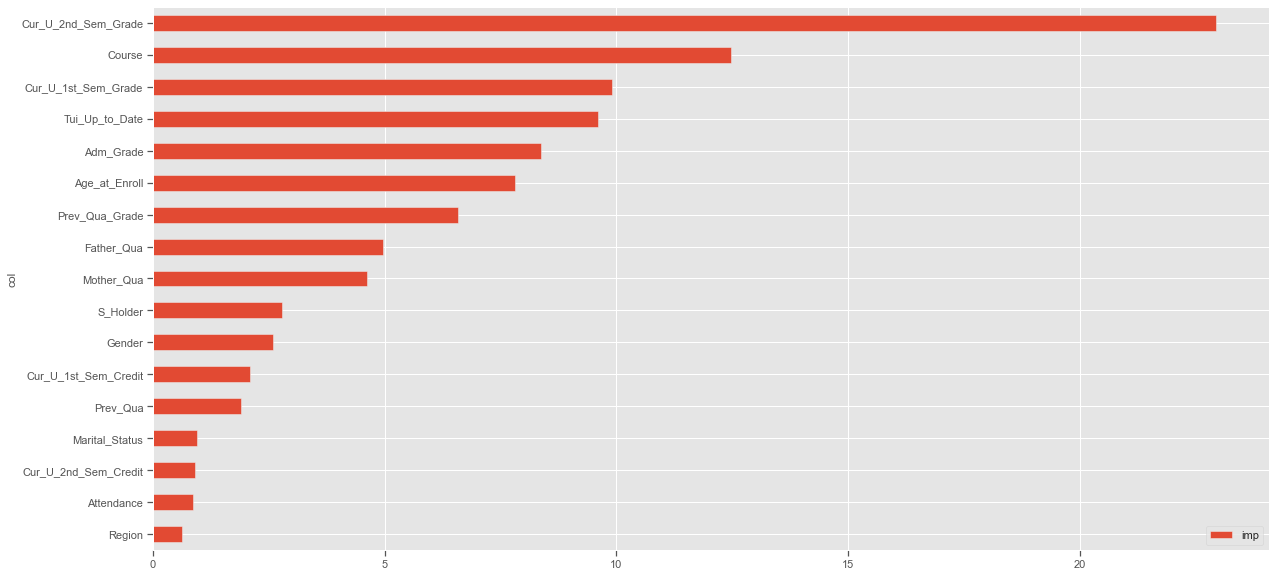

In [153]:
# Plot the feature importance scores
feature_importance(catboost_model, X_train)

### *Inference*

from the Feature importance plot, we can see the top features that strongly influenced the model's prediction. 

## Evaluating the Model Performance

Understanding how well a machine learning model will perform is the main purpose behind working with evaluation metrics. Metrics like accuracy, precision, recall will be used to evaluate classification models for our balanced datasets and help it perform better in evaluating the model performance.

In [154]:
 metrics = ['Precision', 'Recall', 'F1']

eval_metrics = catboost_model.eval_metrics(train_pool,
                                           metrics=metrics,
                                           plot=True)

for metric in metrics:
    print(str(metric)+": {}".format(np.mean(eval_metrics[metric])))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Precision: 0.8880987648749173
Recall: 0.967442892358258
F1: 0.9260475902639406


### *Inference*

Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. The question that this metric answer is of all Student that that labeled as Graduated, how many actually Graduated? High precision relates to the low false positive rate. We have got 0.888 precision which is good enough.

Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes. The question recall answers is: Of all the Student that truly are Graduate, how many did we label? We have got recall of 0.967 which is good for this model as it’s above 0.5.

F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account, F1 is usually more useful than accuracy, especially if you have an uneven class distribution. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall. In our case, F1 score is 0.926.

### Saving The Model Using Joblib

Training a machine learning model can take so much time when the  training dataset is very large. This is the reason it is good to train a model and save it to a file so that later on while making predictions you can just load that model from a file and you don't need to train it every time. Joblib seems to fit in that role, Joblib is more efficient with big numpy arrays hence it is preferred when you have many numpy objects involved in your training step.

In [155]:
# importing required libary

import joblib

In [156]:
# saving the catboost model to a file
joblib.dump(catboost_model, "model_joblib.pkl")

['model_joblib.pkl']

In [157]:
# loading the model into a model object mj
mj = joblib.load("model_joblib.pkl")

In [159]:
# using the model object mj to make prediction

mj.predict([[2, 9147, 1, 3, 130.0, 1, 19, 1, 130.0, 1, 0, 0, 35, 0, 11.666667, 0, 11.333333]])

array([1], dtype=int64)

### *Inference*

where 0 stand for Students who will droupout and 1 stands for students who will graduate. we see from the prediction that it gave 1, which predicts student who will graduate based on the information supplied. 